In [1]:
#importing all the basic library for manipulating and visualizing the dataframe
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#we can read our data directly by using excel extension
df=pd.read_excel('Customer.xlsx')
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

# OR

In [3]:
#Since there are some special character in this file,Hence will use the below code to read the file with csv format
df=pd.read_csv('Customer.csv',encoding='latin1')
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
..                    ...                 ...   
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
0                                   Delhi   
1                                   Delhi   
2                           Greater Noida   
3                                 Karnal    
4                              Bangalore    
..                                    ...   
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
0                                               110009       
1                                               110030       
2                                               201308       
3                                               132001       
4                                               530068       
..                                                 ...       
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
0                                Above 4 years   
1                                Above 4 years   
2                                    3-4 years   
3                                    3-4 years   
4                                    2-3 years   
..                                         ...   
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
0                                          31-40 times                      
1                                   41 times and above                      
2                                   41 times and above                      
3                                   Less than 10 times                      
4                                          11-20 times                      
..                                                 ...                      
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
0                                              Dial-up         
1                                                Wi-Fi         
2                                      Mobile Internet         
3                                      Mobile Internet         
4                                                Wi-Fi         
..                                                 ...         
264                                    Mobile Internet         
265                                    Mobile Internet         
266                        

### EDA(Exploratory Data Analysis)

#### This dataframe contains a loads of feautres and which is 71 rows and that's really a big number while analysing any dataframe and also it indicates that our dataframe is too complex to predict what are all the features out of it, those are really important, while making any decision towards customer retention and even adding more customers under its big umbrella.
#### Let's see what are all the factors that gonna be more useful in making any e-commerce companies decision making power in this competitive market that much accurate and worthy,so that customers are going to be more loyal and do more frequent shoppings.

In [4]:
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(269, 71)
269
71


This shows that this datframe contains 269 rows and 71 columns

In [5]:
#it's a 2 dimensional dataframe
df.ndim

2

In [6]:
df.size

19099

There are total Nineteen thousand ninty hundred data's are avialble under all columns alltogether

In [7]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

#### Above represents the name of all the attributes or factors that all are responsible for e-commerce company while making decision about customer retention,adding more customers,How to increse net profit or generate more revenue and other many more decision making too.

In [8]:
#indicates indexation which is from 0-269.
df.index

RangeIndex(start=0, stop=269, step=1)

In [9]:
#it shows top 5 rows of the dataframe
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

   ... Longer time to get logged in (promotion, sales period)  \
0  ...                                          Amazon.in       
1  ...                            Amazon.in, Flipkart.com       
2  ...                                         Myntra.com       
3  ...                                       Snapdeal.com       
4 

In [10]:
#it shows bottom 5 rows of the dataframe
df.tail()

1Gender of respondent 2 How old are you?   \
264                Female         21-30 years   
265                Female         31-40 years   
266                Female         41-50 yaers   
267                Female  Less than 20 years   
268                Female         41-50 yaers   

    3 Which city do you shop online from?  \
264                                 Solan   
265                             Ghaziabad   
266                            Bangalore    
267                                 Solan   
268                             Ghaziabad   

     4 What is the Pin Code of where you shop online from?  \
264                                             173212       
265                                             201008       
266                                             560010       
267                                             173229       
268                                             201009       

    5 Since How Long You are Shopping Online ?  \
264                                  1-2 years   
265                                  1-2 years   
266                                  2-3 years   
267                                  2-3 years   
268                                  2-3 years   

    6 How many times you have made an online purchase in the past 1 year?  \
264                                 Less than 10 times                      
265                                        31-40 times                      
266                                 Less than 10 times                      
267                                 Less than 10 times                      
268                                        31-40 times                      

    7 How do you access the internet while shopping on-line?  \
264                                    Mobile Internet         
265                                    Mobile Internet         
266                                    Mobile internet         
267                                              Wi-Fi         
268                                    Mobile Internet         

    8 Which device do you use to access the online shopping?  \
264                                         Smartphone         
265                                         Smartphone         
266                                             Laptop         
267                                         Smartphone         
268                                         Smartphone         

    9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
264                                         5.5 inches                                                     
265                                             Others                                                     
266                                             Others                                                     
267                                         5.5 inches                                                     
268                                         5.5 inches                                                     

    10 What is the operating system (OS) of your device?\t\t\t\t                                            \
264                                            Android                                                       
265                                            Android                                                       
266                              Window/windows Mobile                                                       
267                                            Android                                                       
268                                            Android                                                       

     ... Longer time to get logged in (promotion, sales period)  \
264  ...                                          Amazon.in       
265  ...                                       Flipkart.com       
266  ...            

In [11]:
#it shows any one random row of the dataframe
df.sample()

1Gender of respondent 2 How old are you?   \
8                Female  Less than 20 years   

  3 Which city do you shop online from?  \
8                                 Solan   

   4 What is the Pin Code of where you shop online from?  \
8                                             173229       

  5 Since How Long You are Shopping Online ?  \
8                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
8                                 Less than 10 times                      

  7 How do you access the internet while shopping on-line?  \
8                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
8                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
8                                         5.5 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
8                                            Android                                                       

   ... Longer time to get logged in (promotion, sales period)  \
8  ...                                          Amazon.in       

  Longer time in displaying graphics and photos (promotion, sales period)  \
8                Amazon.in, Myntra.com, Snapdeal.com                        

  Late declaration of price (promotion, sales period)  \
8                                          Amazon.in    

  Longer page loading time (promotion, sales period)  \
8                            Amazon.in, Snapdeal.com   

  Limited mode of payment on most products (promotion, sales period)  \
8                                          Amazon.in                   

  Longer delivery period Change in website/Application design  \
8              Amazon.in                            Amazon.in   

  Frequent disruption when moving from one page to another  \
8                           Myntra.com, Snapdeal.com         

  Website is as efficient as before  \
8          Myntra.com, Snapdeal.com   

  Which of the Indian online retailer would you recommend to a friend?  
8                                          Amazon.in                    

[1 rows x 71 columns]

In [12]:
#This will show several aspects as data-types,total count,Null presence and total memory usage of all the attributes/factors in a dataframe. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

#### There are 1 Integer column and rest 70 are having the categorical object data-type,will chcek the unique values presence in each category going forward soon in this notebook

In [13]:
#This will check-out the null value presence in each columns
df.isnull().sum()

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

#### As we can see in each columns there are no null value present,i.e. no rows are having missing values

In [14]:
df.isnull().sum().sum()

0

##### The sum of all the missing value in each columns alltogether is zero

### Checking Uniqueness of each Factor

In [55]:
df.nunique()

1Gender of respondent                                                    2
2 How old are you?                                                       5
3 Which city do you shop online from?                                   11
4 What is the Pin Code of where you shop online from?                   39
5 Since How Long You are Shopping Online ?                               5
                                                                        ..
Longer delivery period                                                   6
Change in website/Application design                                     7
Frequent disruption when moving from one page to another                 8
Website is as efficient as before                                        8
Which of the Indian online retailer would you recommend to a friend?     8
Length: 71, dtype: int64

#### As we can see in above output there are almost more than two categories present in each attributes which shows that e-commerce companies are giving a lots of inputs to their customers to get geniune feedbacks from the customers so that they can prepare the best out of it.

In [15]:
#now will be checking what are the unique values in each attributes-
for i in df.columns:
    print(f'The Unique Values for attribute- "{i}" is-\n\n {df[i].unique()}')
    print('\n')

The Unique Values for attribute- "1Gender of respondent" is-

 ['Male' 'Female']


The Unique Values for attribute- "2 How old are you? " is-

 ['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']


The Unique Values for attribute- "3 Which city do you shop online from?" is-

 ['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']


The Unique Values for attribute- "4 What is the Pin Code of where you shop online from?" is-

 [110009 110030 201308 132001 530068 110011 110018 173229 110039 244001
 122018 201310 560037 203207 250001 201005 110044 201306 560010 201305
 110042 132036 560018 110008 560002 201303 201312 203202 560001 201304
 560003 110014 560013 173212 122009 201009 201008 201001 203001]


The Unique Values for attribute- "5 Since How Long You are Shopping Online ?" is-

 ['Above 4 years' '3-4 years' '2-3 years' 'Less than 1 year' '1-2 years']


The Unique Values for attrib

### Count of Values In each Attributes

In [3]:
df['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

#### As we can see that There are four type of categorisation is given but out of them two are same in meaning,i.e. Mobile internet and Mobile Internet both are same in meaning hence will try to replace and convert it into single category  

In [4]:
#Replacing 'Mobile internet' with 'Mobile Internet' and making it single category
df['7 How do you access the internet while shopping on-line?']=df['7 How do you access the internet while shopping on-line?'].replace({'Mobile internet':'Mobile Internet'})

In [5]:
#Now will get the required category
df['7 How do you access the internet while shopping on-line?'].value_counts()

Mobile Internet    189
Wi-Fi               76
Dial-up              4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64

In [65]:
#finding out counts for each attributes
for i in df.columns:
    print(f'Total Value counts for attribute- "{i}" is-\n\n {df[i].value_counts()}')
    print('\n')

Total Value counts for attribute- "1Gender of respondent" is-

 Female    181
Male       88
Name: 1Gender of respondent, dtype: int64


Total Value counts for attribute- "2 How old are you? " is-

 31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: 2 How old are you? , dtype: int64


Total Value counts for attribute- "3 Which city do you shop online from?" is-

 Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Solan            18
Ghaziabad        18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


Total Value counts for attribute- "4 What is the Pin Code of where you shop online from?" is-

 201308    38
132001    19
201310    18
110044    16
250001     9
173229     9
173212     9
560010     8
132036     8
122018     8
560037     8
110008     7
110011     7
201306    

### Data Visualization

#### Countplot Diagram

The Countplot for attribute- "1Gender of respondent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


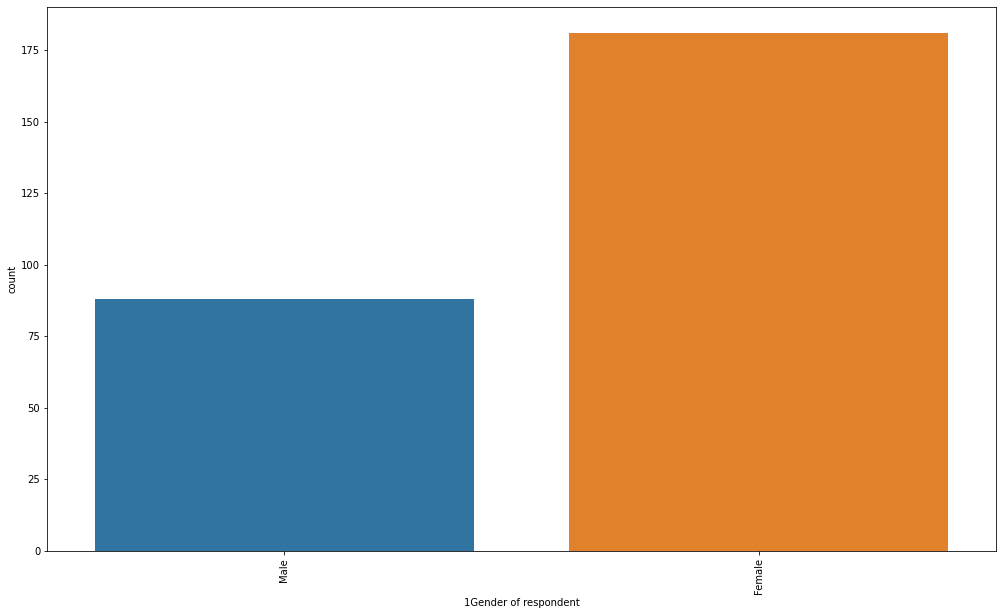



The Countplot for attribute- "2 How old are you? " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


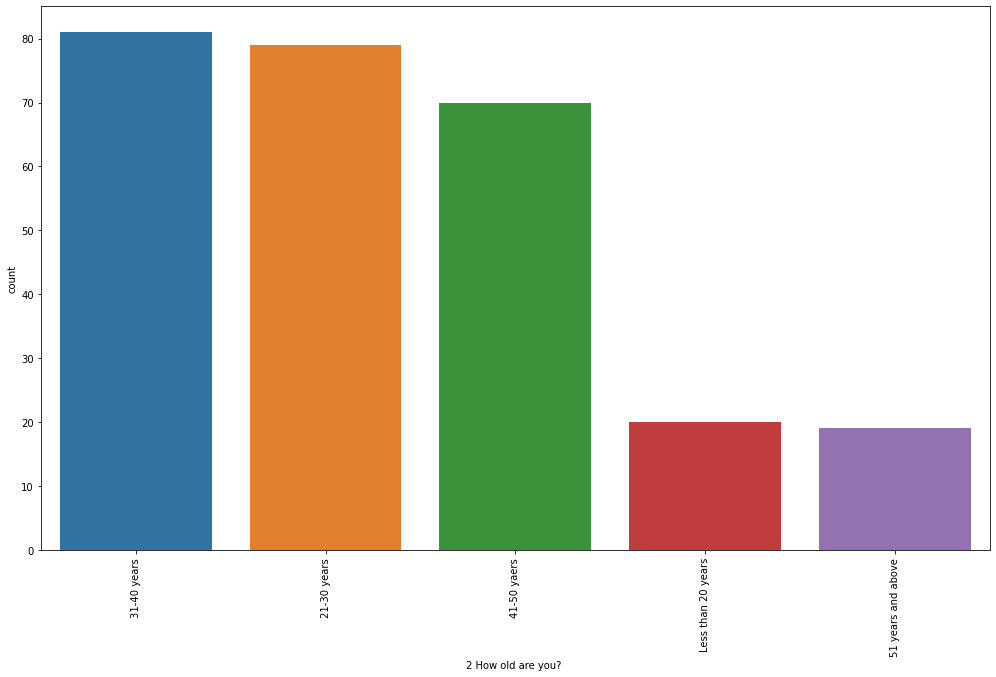



The Countplot for attribute- "3 Which city do you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


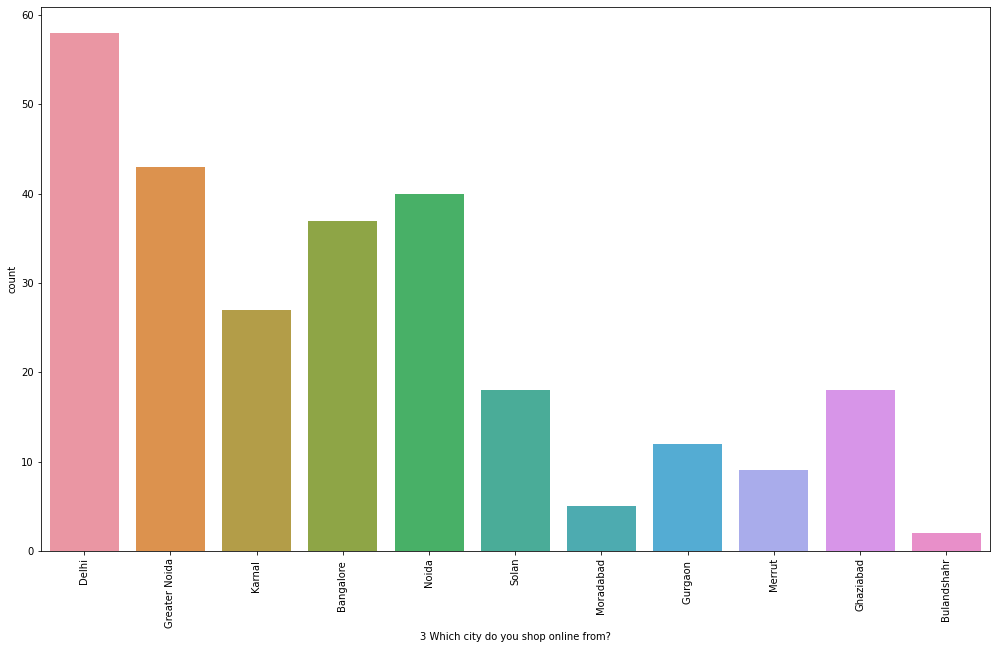



The Countplot for attribute- "4 What is the Pin Code of where you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


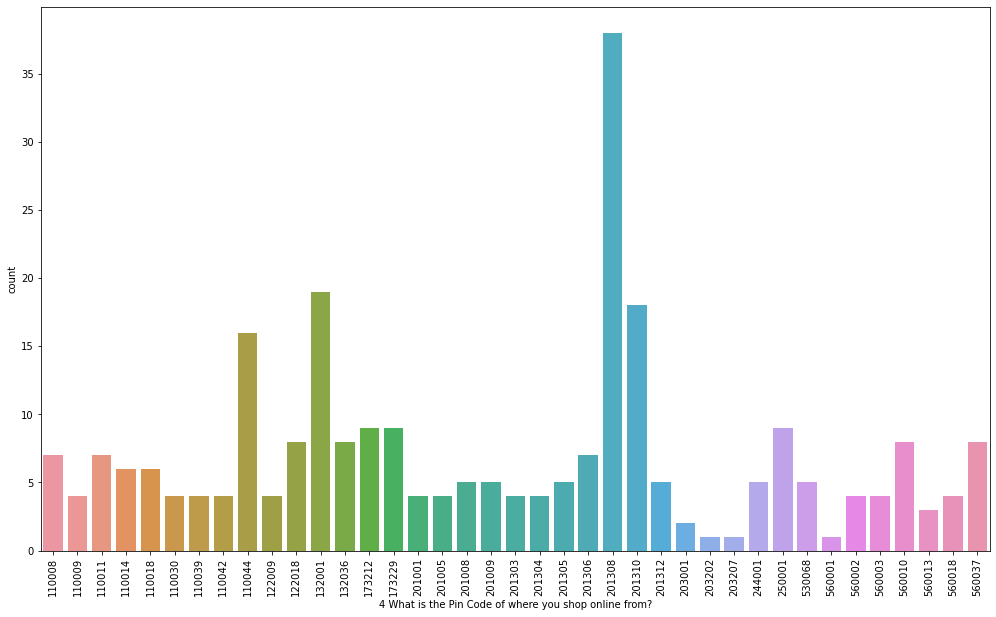



The Countplot for attribute- "5 Since How Long You are Shopping Online ?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


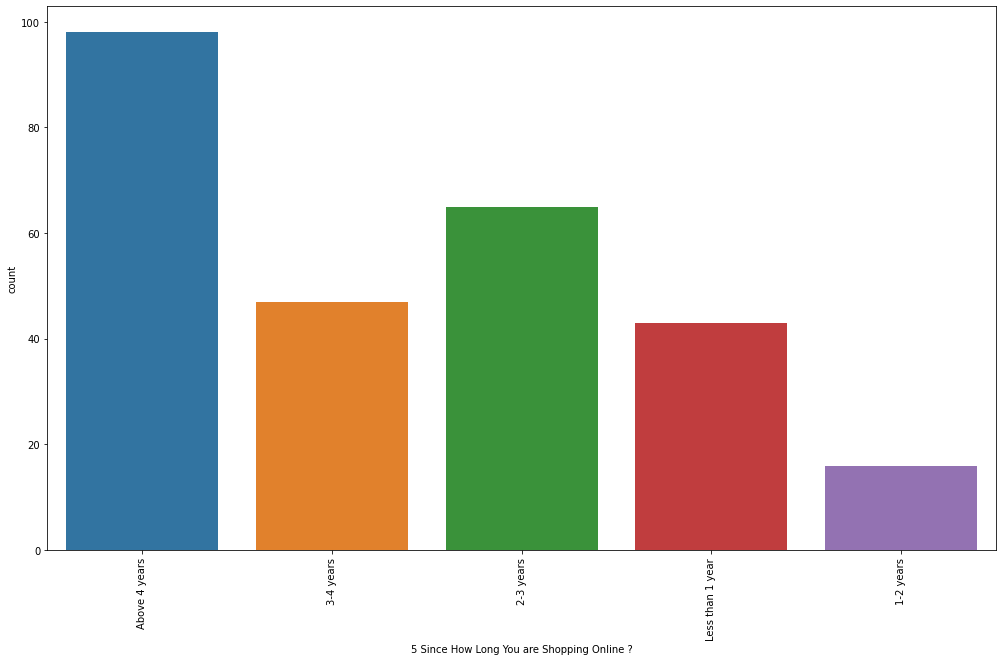



The Countplot for attribute- "6 How many times you have made an online purchase in the past 1 year?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


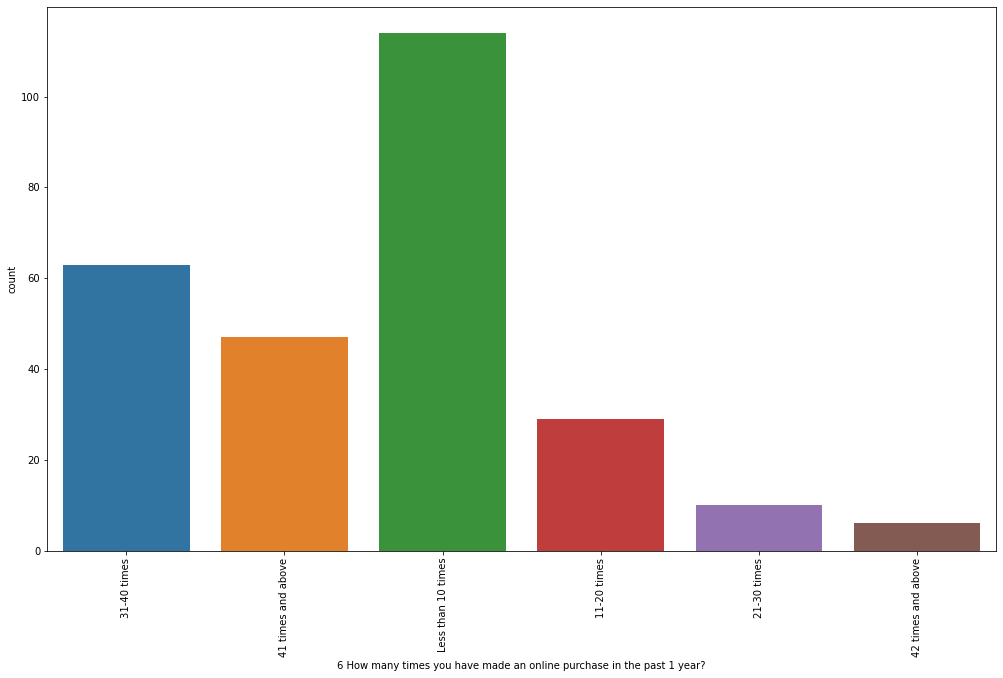



The Countplot for attribute- "7 How do you access the internet while shopping on-line?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


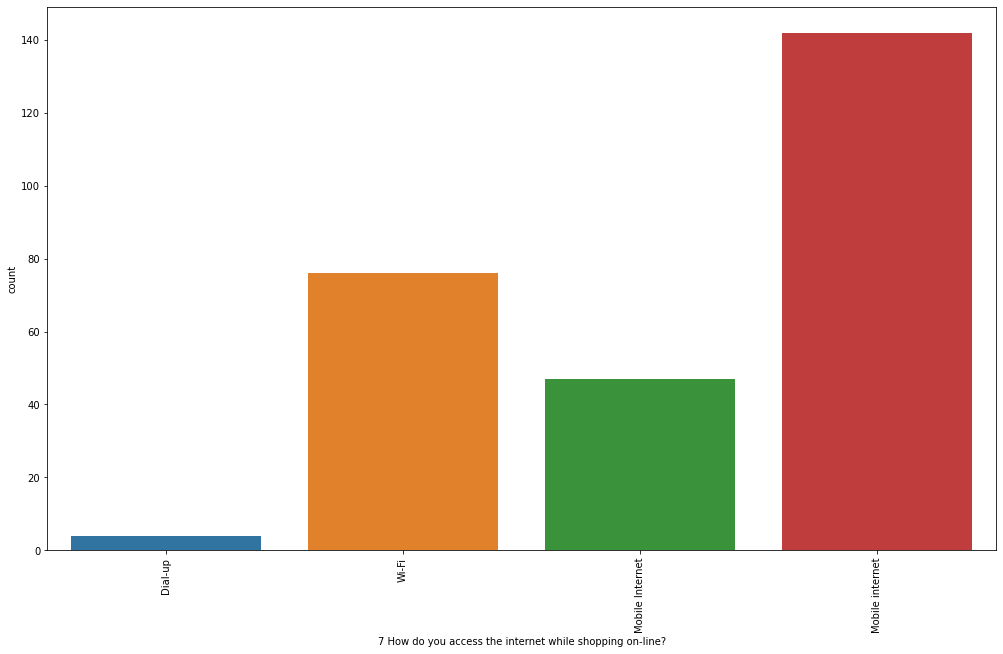



The Countplot for attribute- "8 Which device do you use to access the online shopping?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


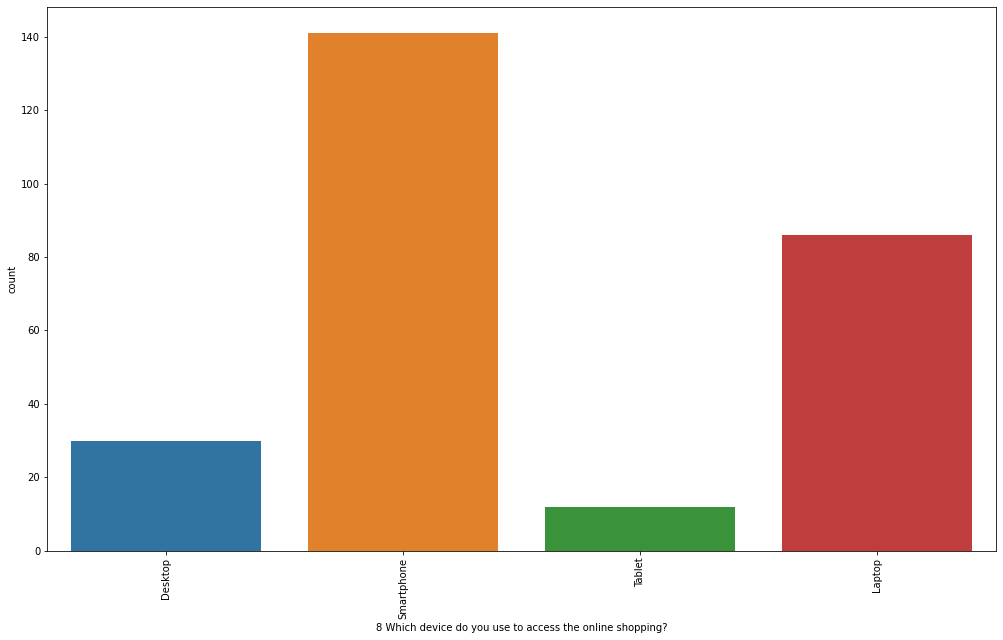



The Countplot for attribute- "9 What is the screen size of your mobile device?						                                        " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


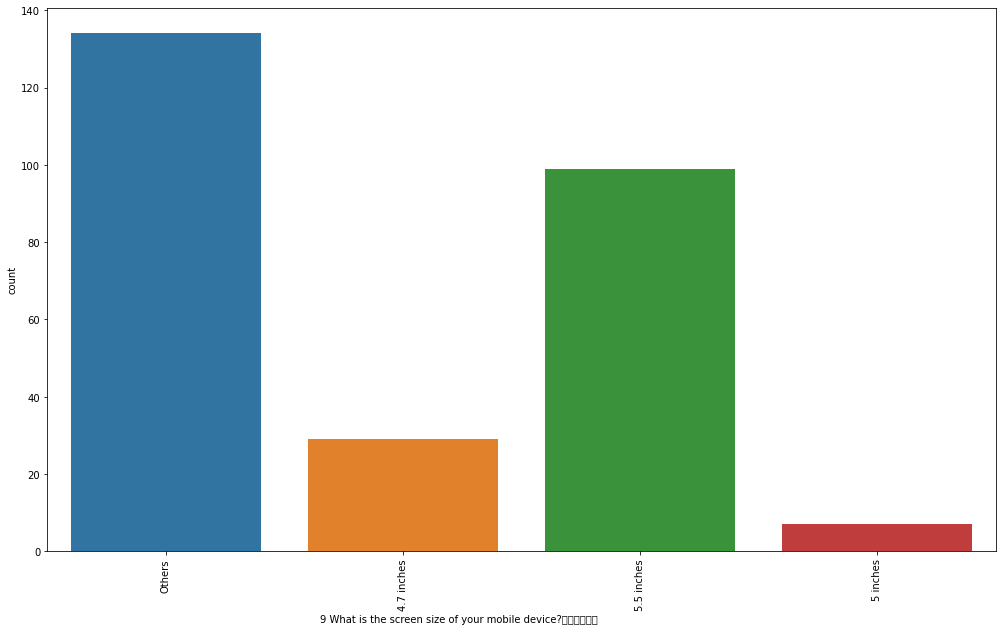



The Countplot for attribute- "10 What is the operating system (OS) of your device?				                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


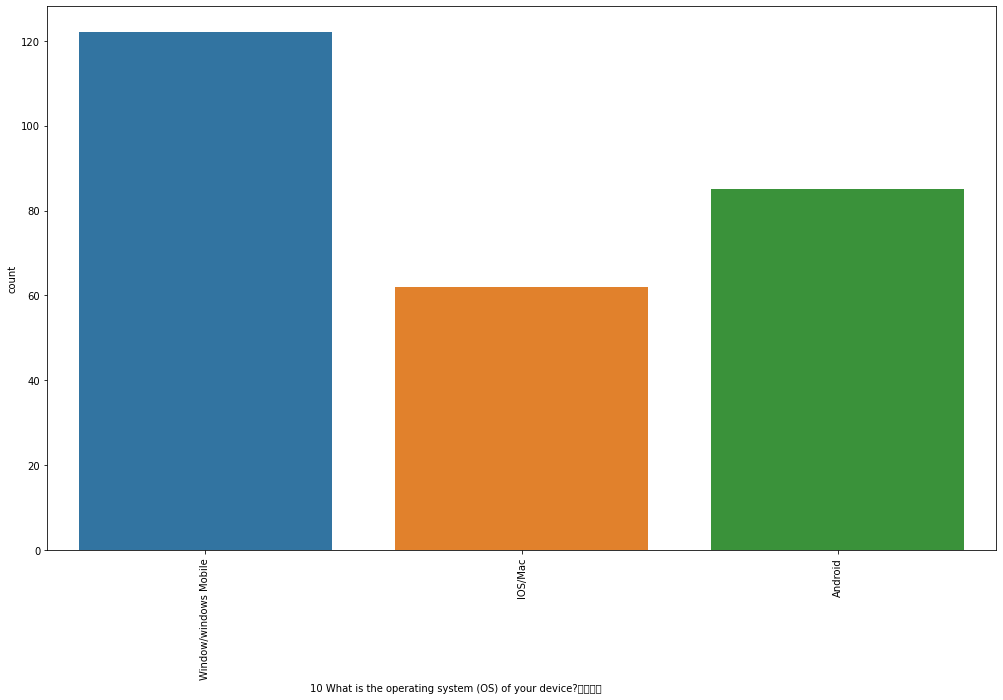



The Countplot for attribute- "11 What browser do you run on your device to access the website?			                                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


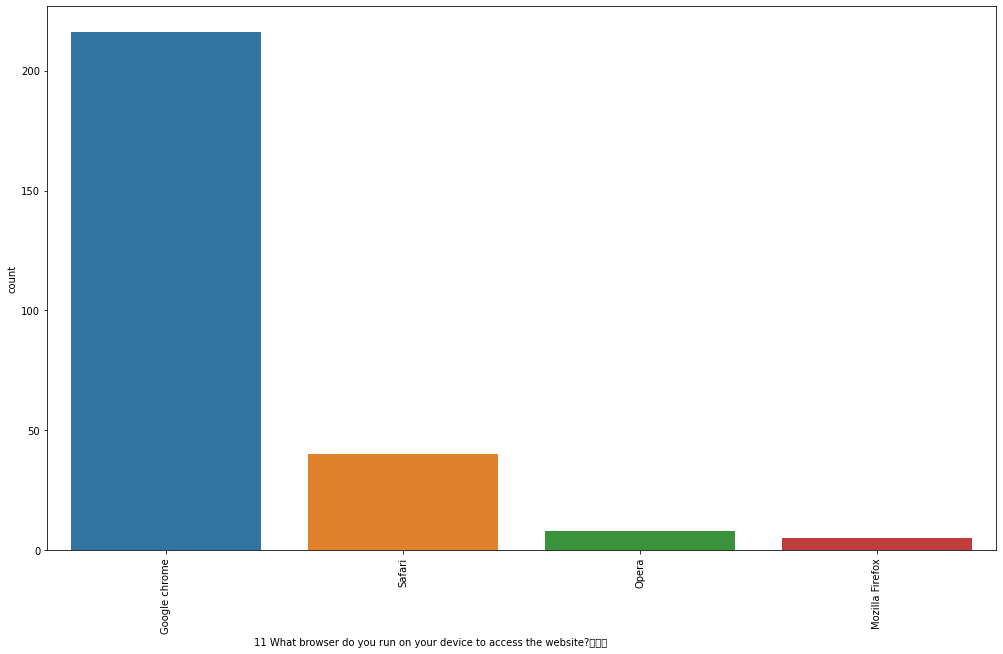



The Countplot for attribute- "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


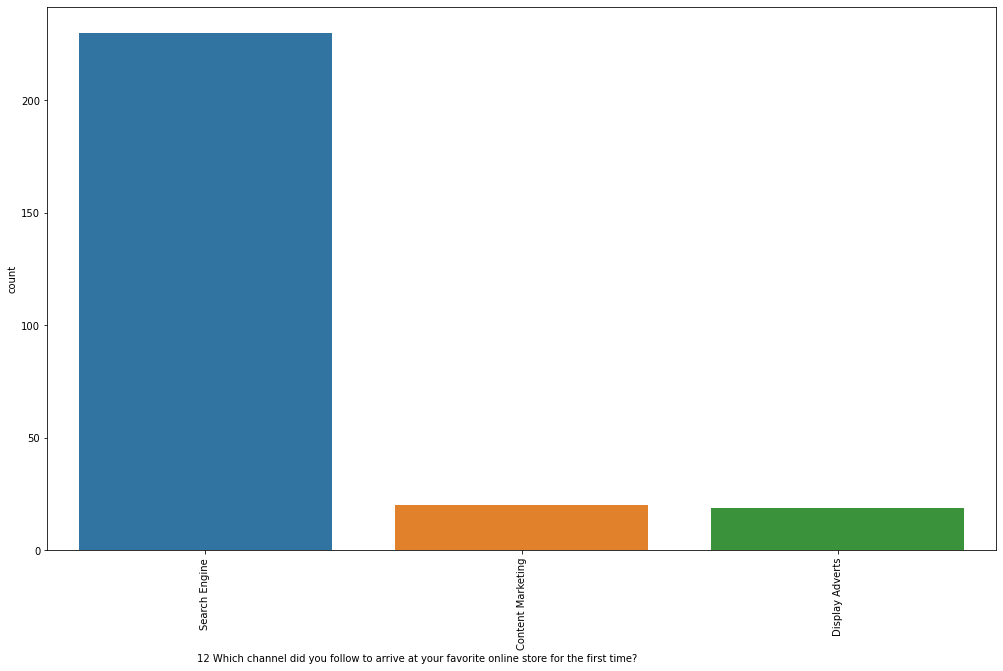



The Countplot for attribute- "13 After first visit, how do you reach the online retail store?				                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


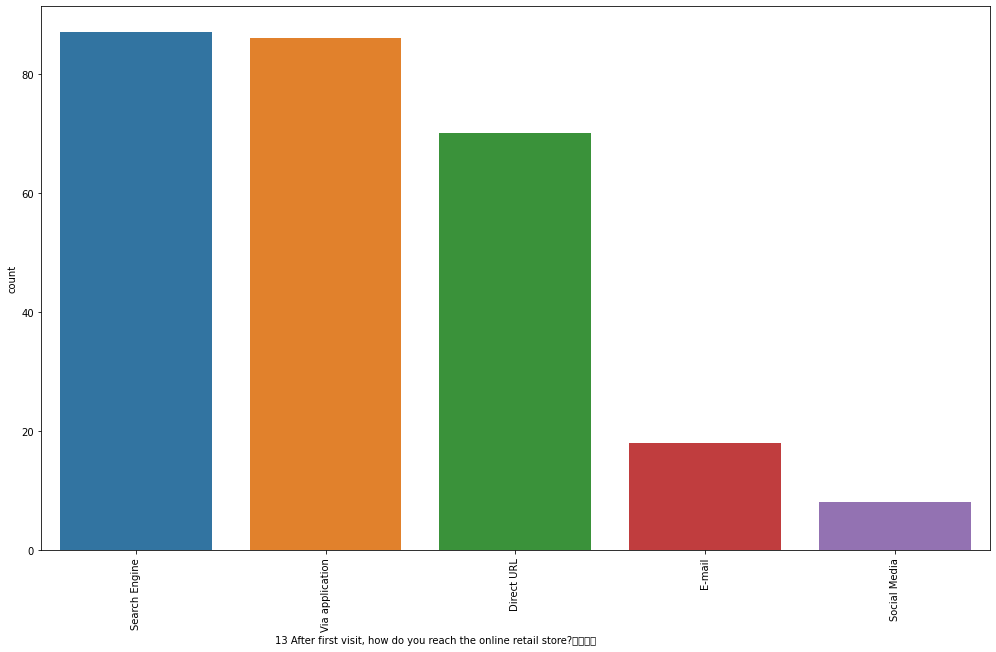



The Countplot for attribute- "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


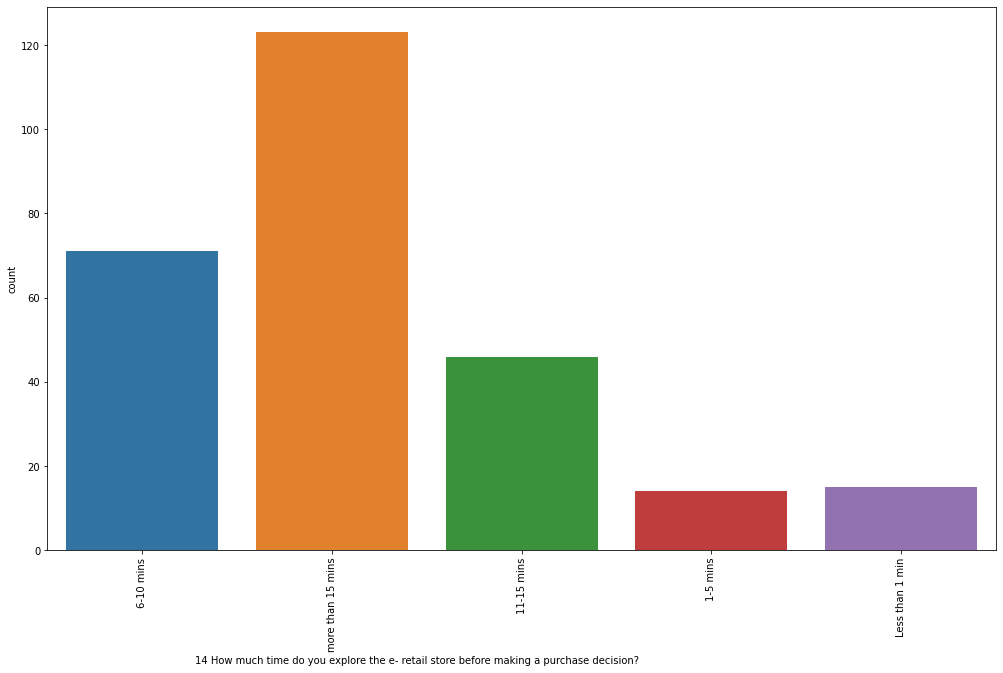



The Countplot for attribute- "15 What is your preferred payment Option?					                                                                                                                               " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


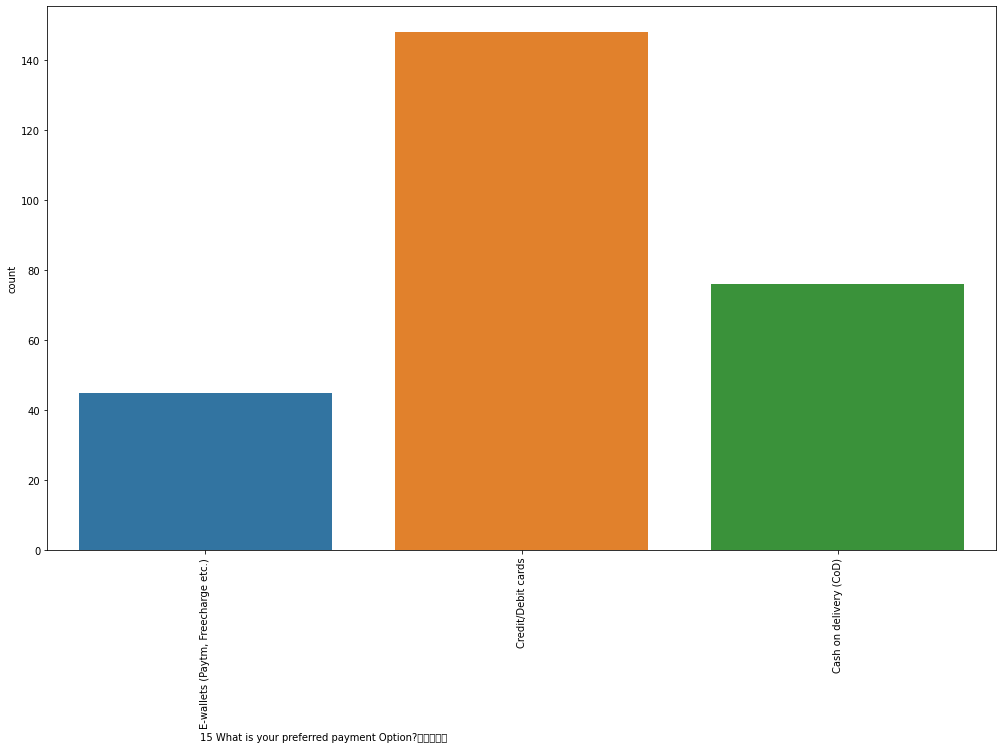



The Countplot for attribute- "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


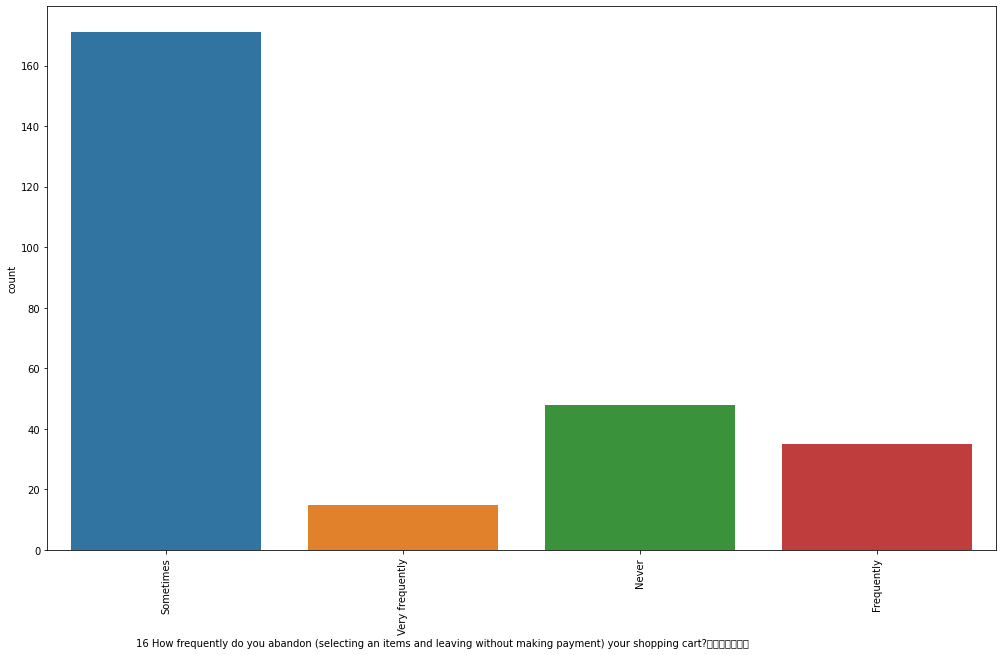



The Countplot for attribute- "17 Why did you abandon the Bag, Shopping Cart?					                                                                                                                                                       " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


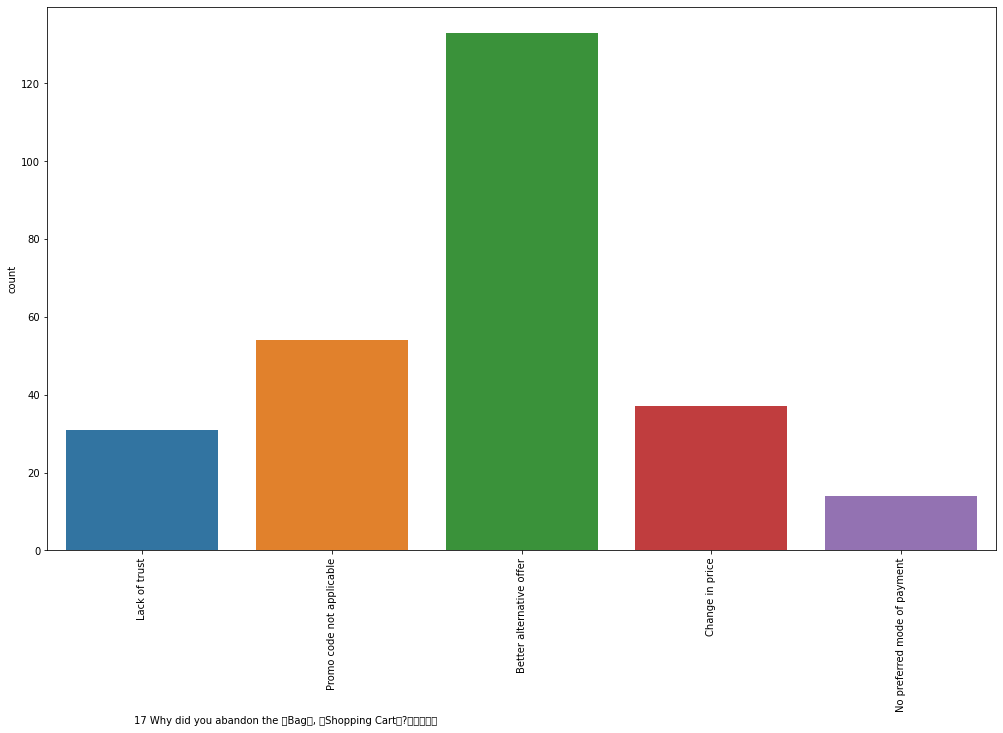



The Countplot for attribute- "18 The content on the website must be easy to read and understand" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


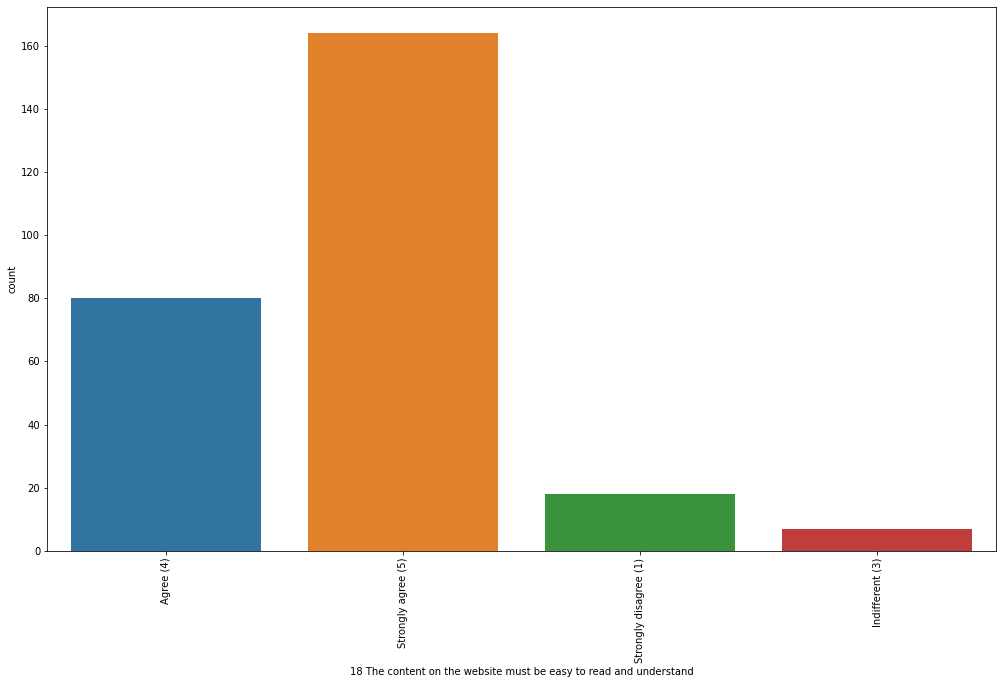



The Countplot for attribute- "19 Information on similar product to the one highlighted  is important for product comparison" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


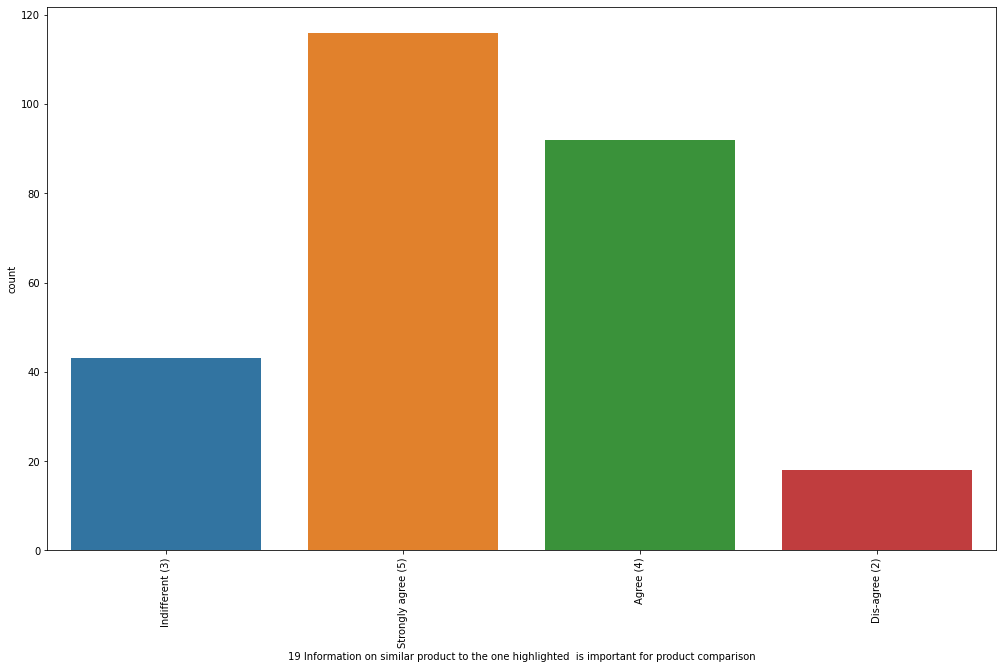



The Countplot for attribute- "20 Complete information on listed seller and product being offered is important for purchase decision." is-

 AxesSubplot(0.125,0.125;0.775x0.755)


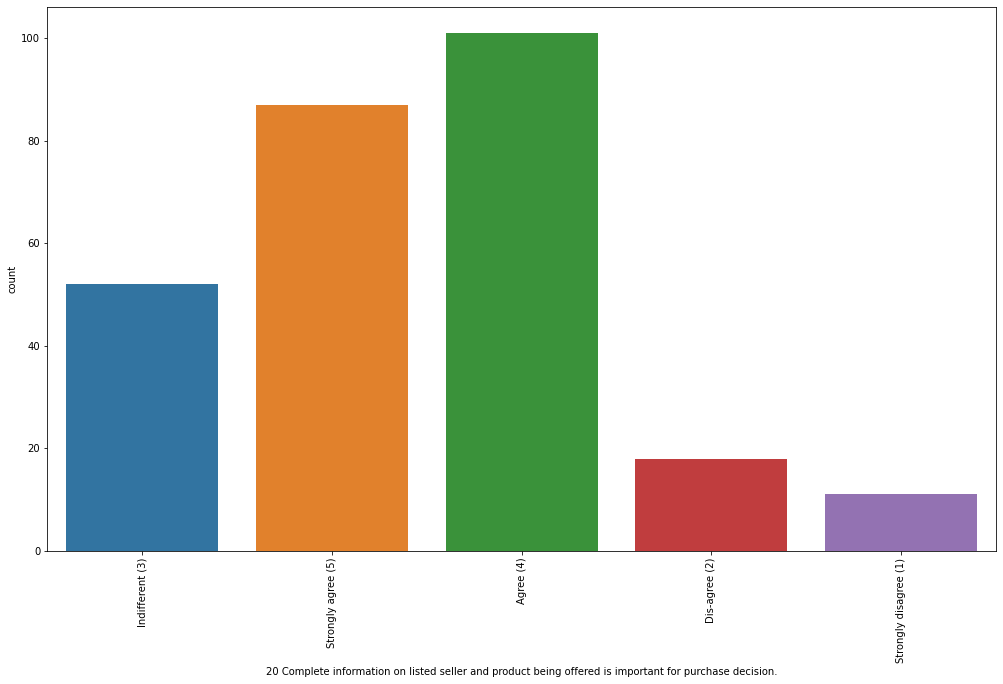



The Countplot for attribute- "21 All relevant information on listed products must be stated clearly" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


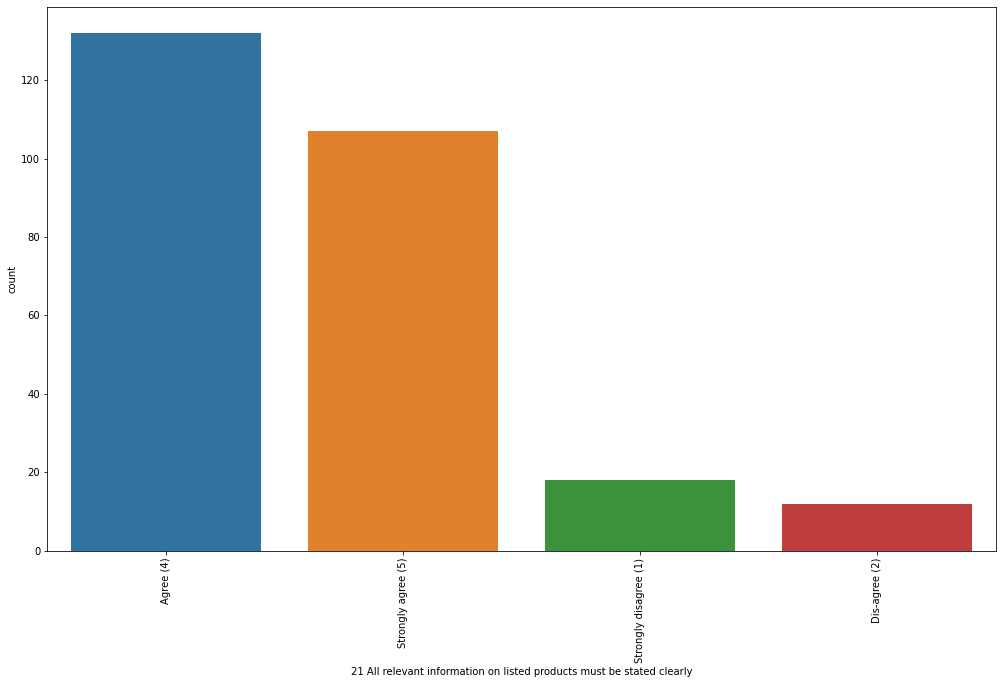



The Countplot for attribute- "22 Ease of navigation in website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


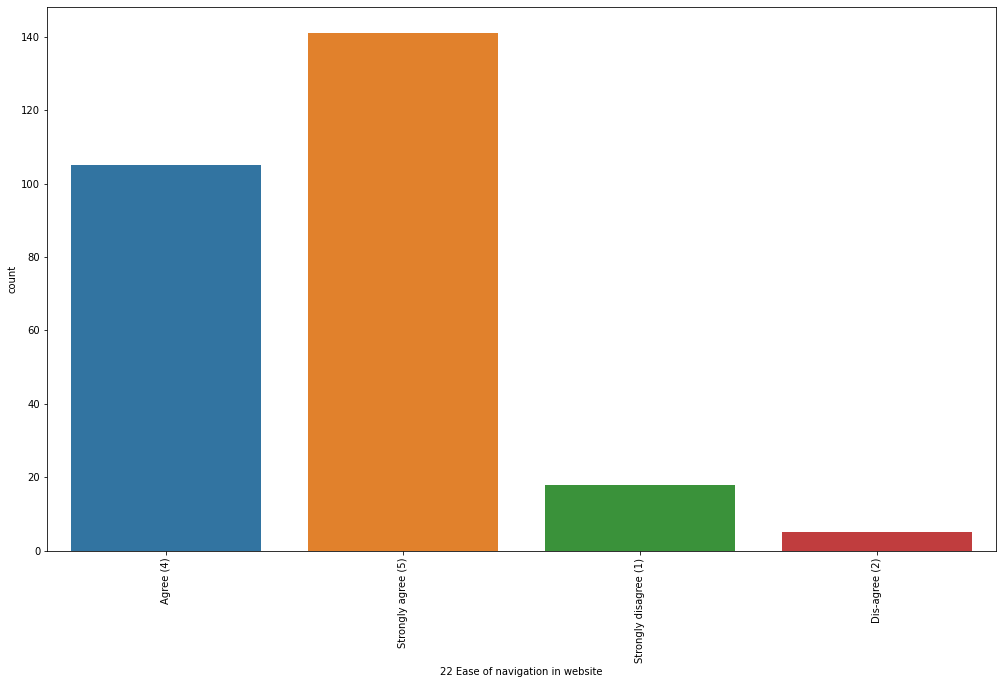



The Countplot for attribute- "23 Loading and processing speed" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


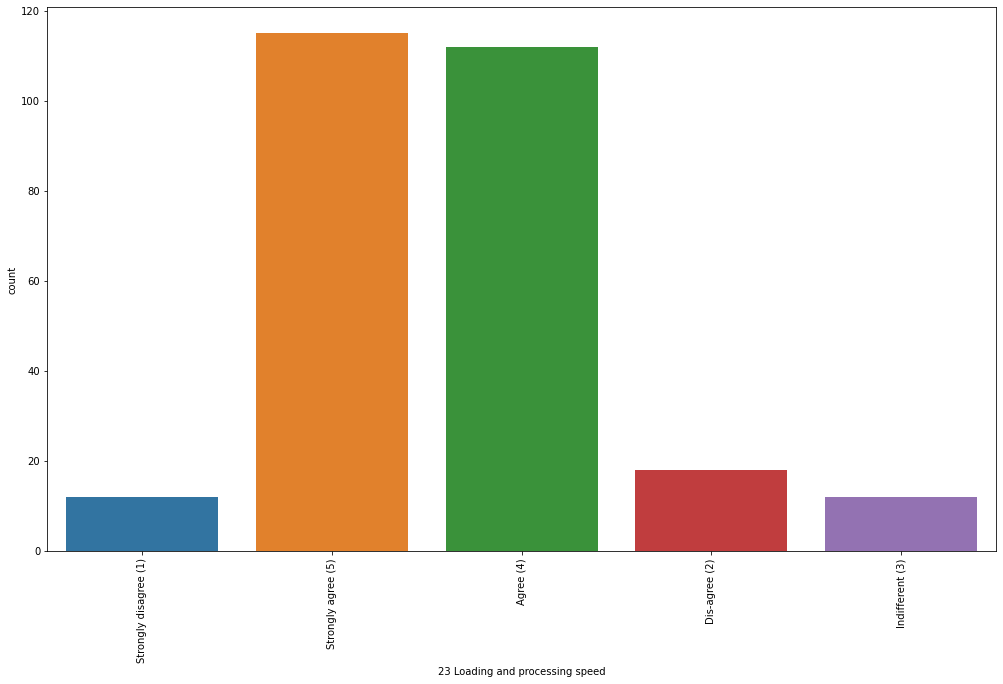



The Countplot for attribute- "24 User friendly Interface of the website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


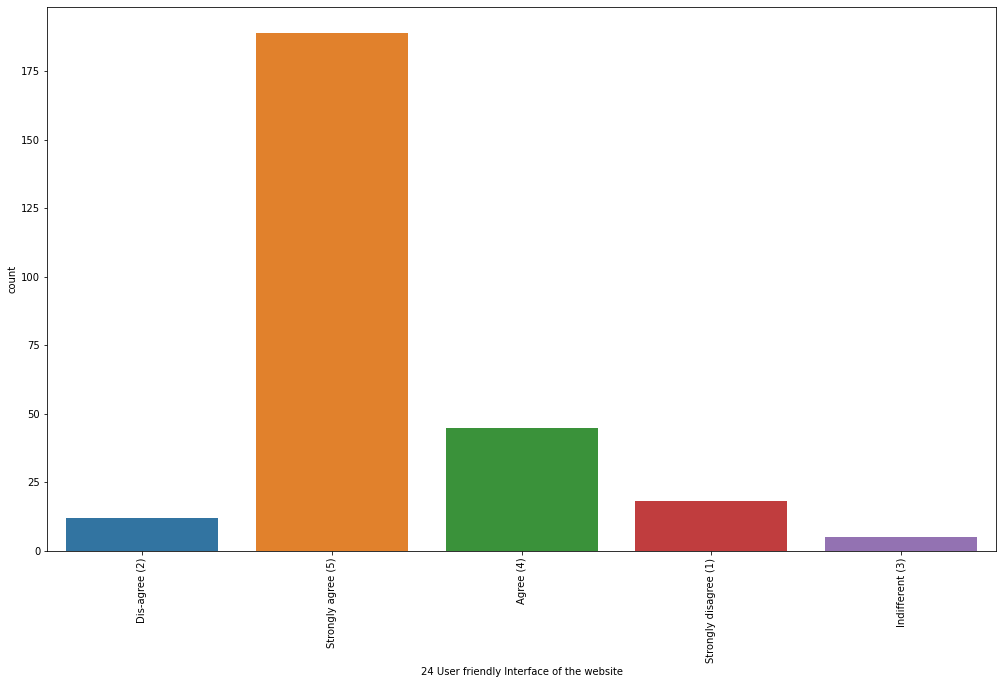



The Countplot for attribute- "25 Convenient Payment methods" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


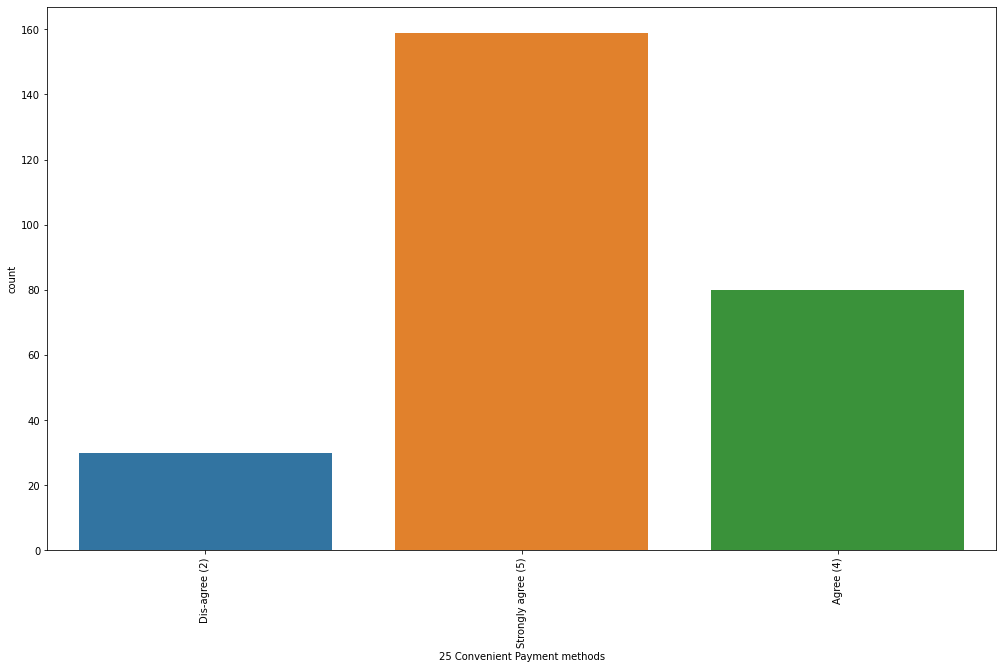



The Countplot for attribute- "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


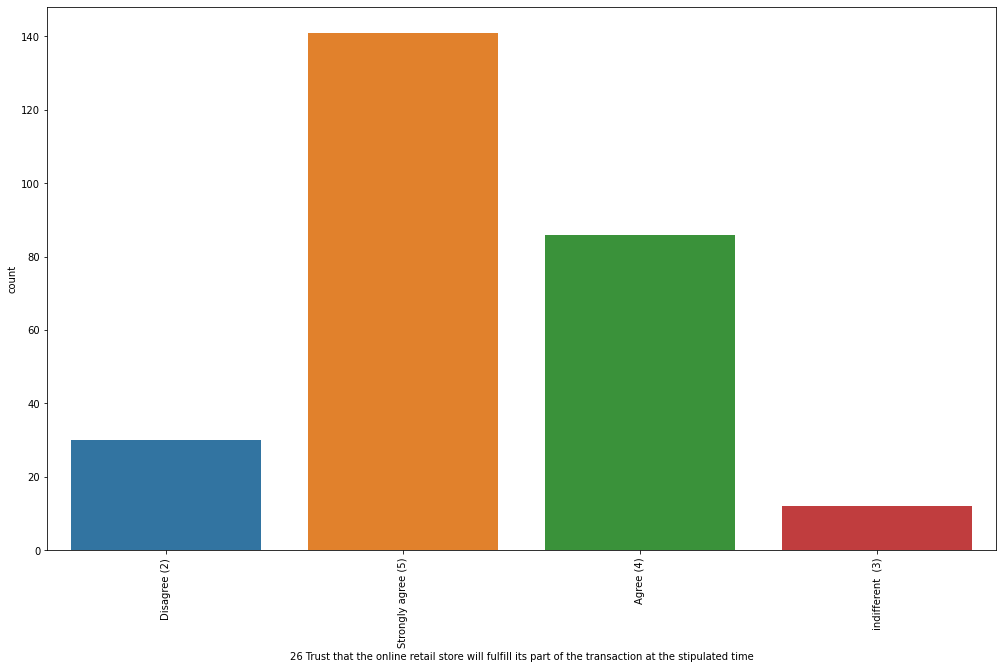



The Countplot for attribute- "27 Empathy (readiness to assist with queries) towards the customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


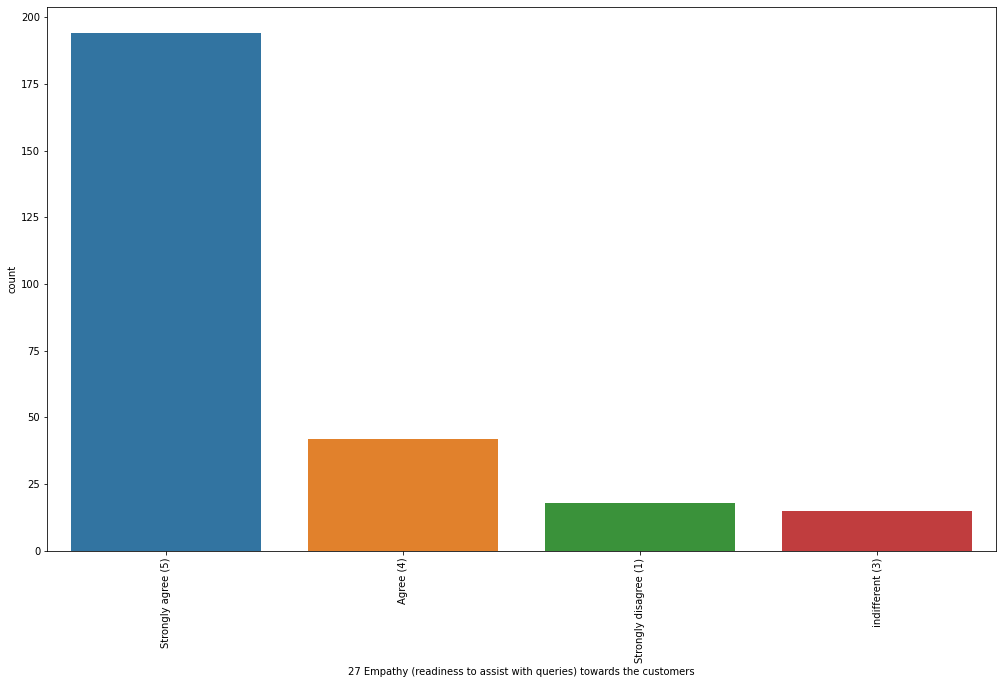



The Countplot for attribute- "28 Being able to guarantee the privacy of the customer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


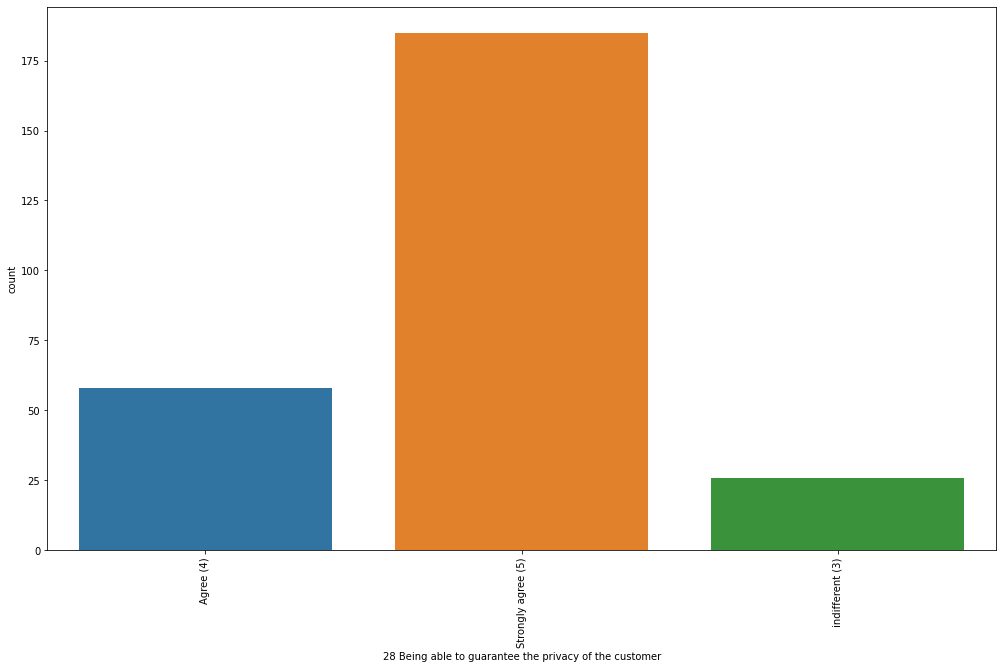



The Countplot for attribute- "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


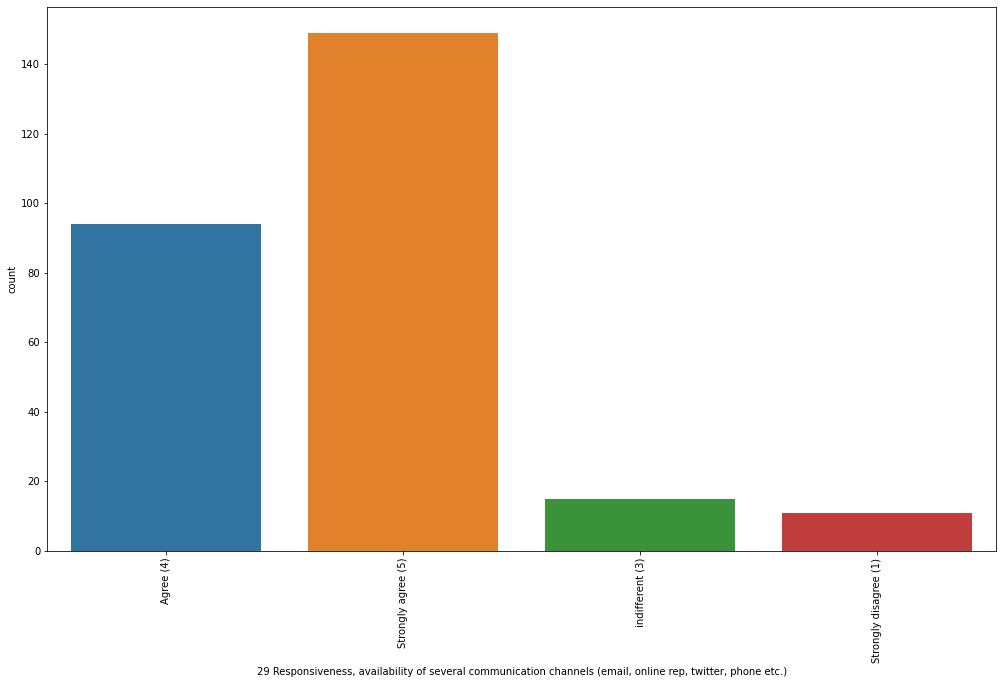



The Countplot for attribute- "30 Online shopping gives monetary benefit and discounts" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


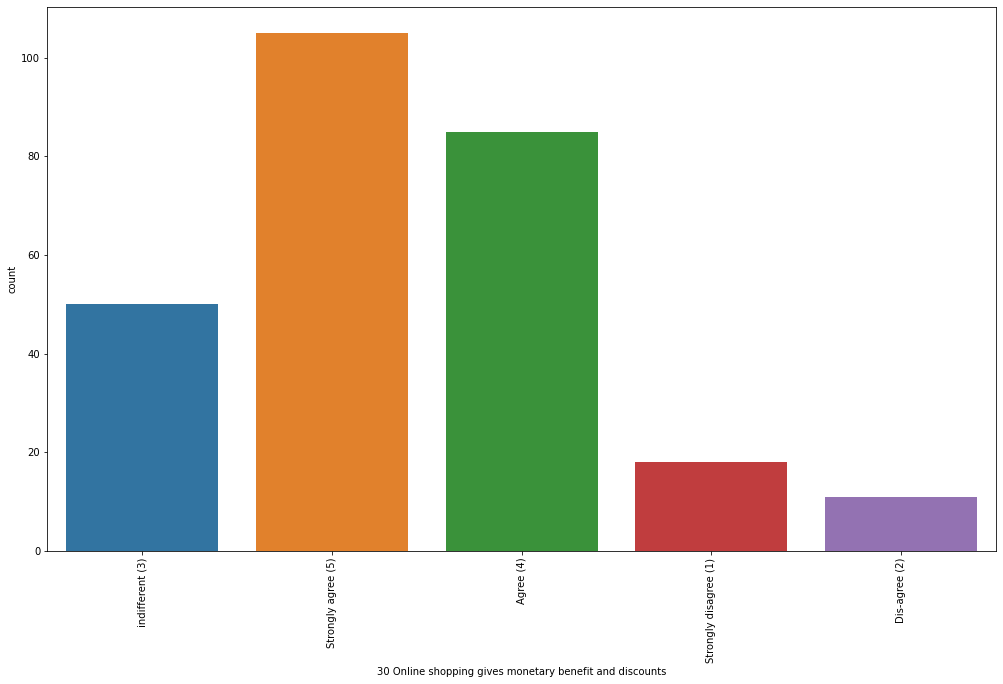



The Countplot for attribute- "31 Enjoyment is derived from shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


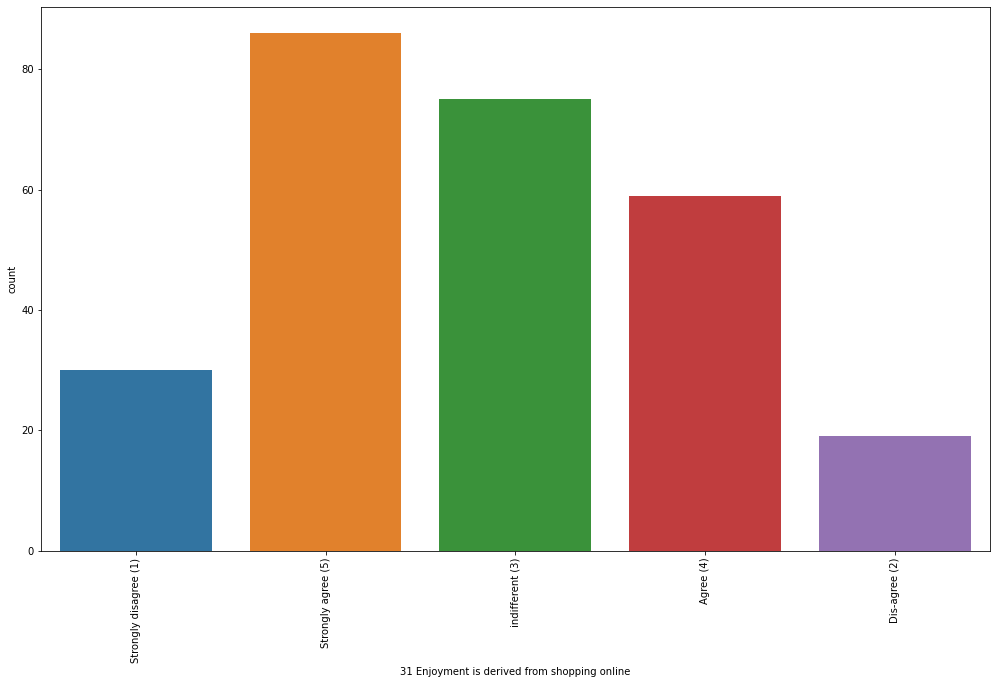



The Countplot for attribute- "32 Shopping online is convenient and flexible" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


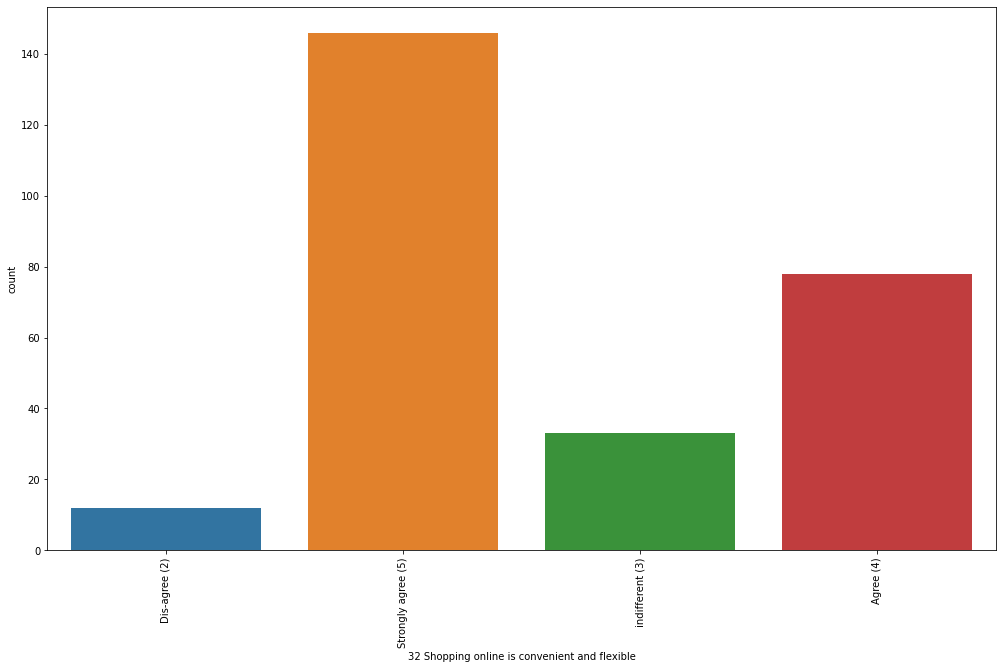



The Countplot for attribute- "33 Return and replacement policy of the e-tailer is important for purchase decision" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


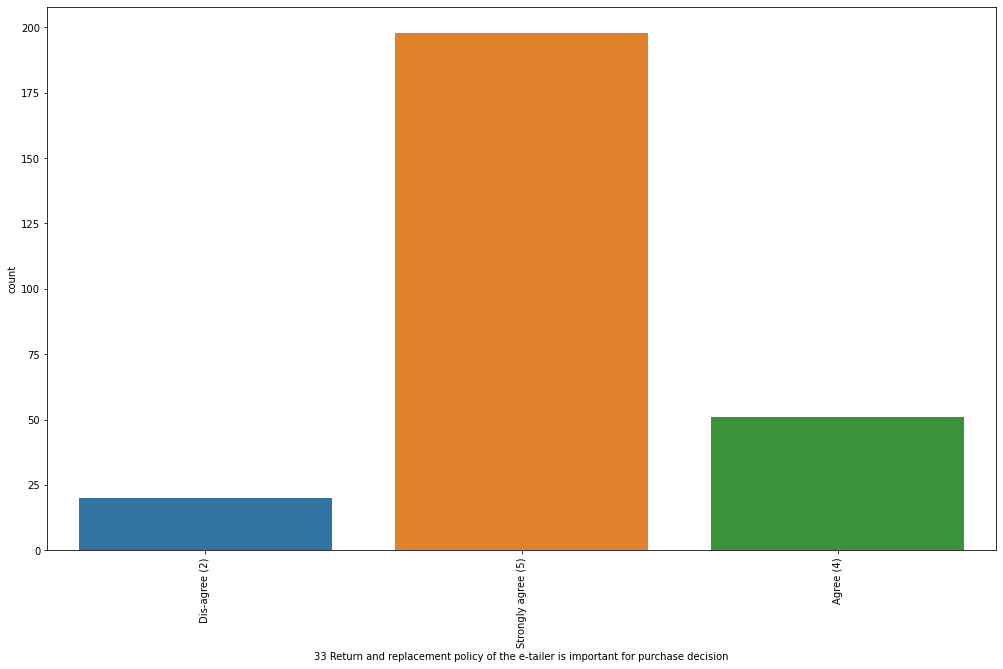



The Countplot for attribute- "34 Gaining access to loyalty programs is a benefit of shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


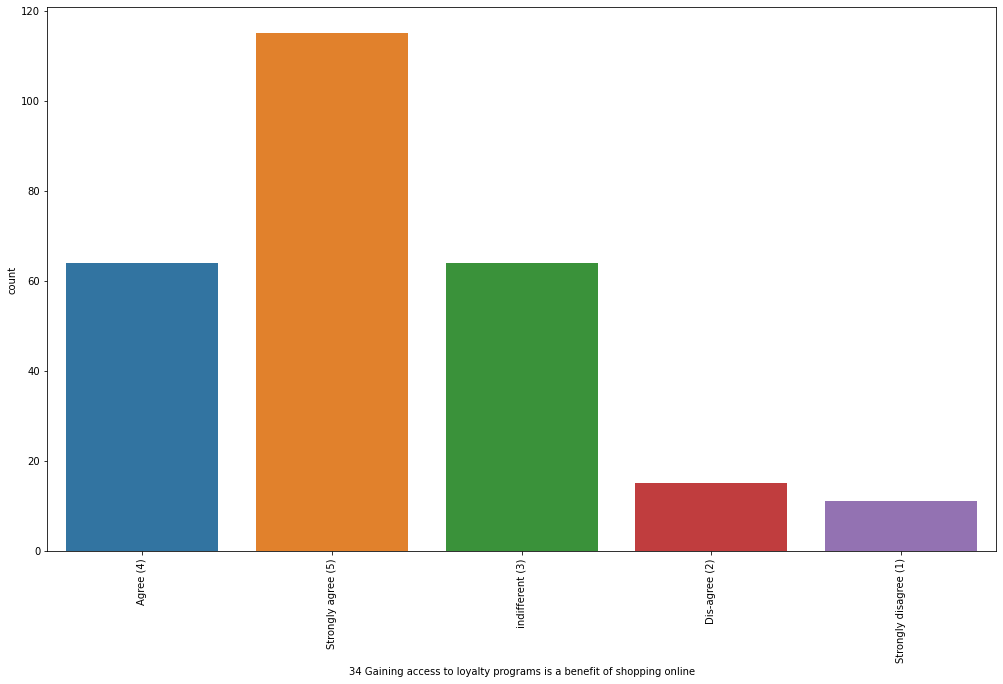



The Countplot for attribute- "35 Displaying quality Information on the website improves satisfaction of customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


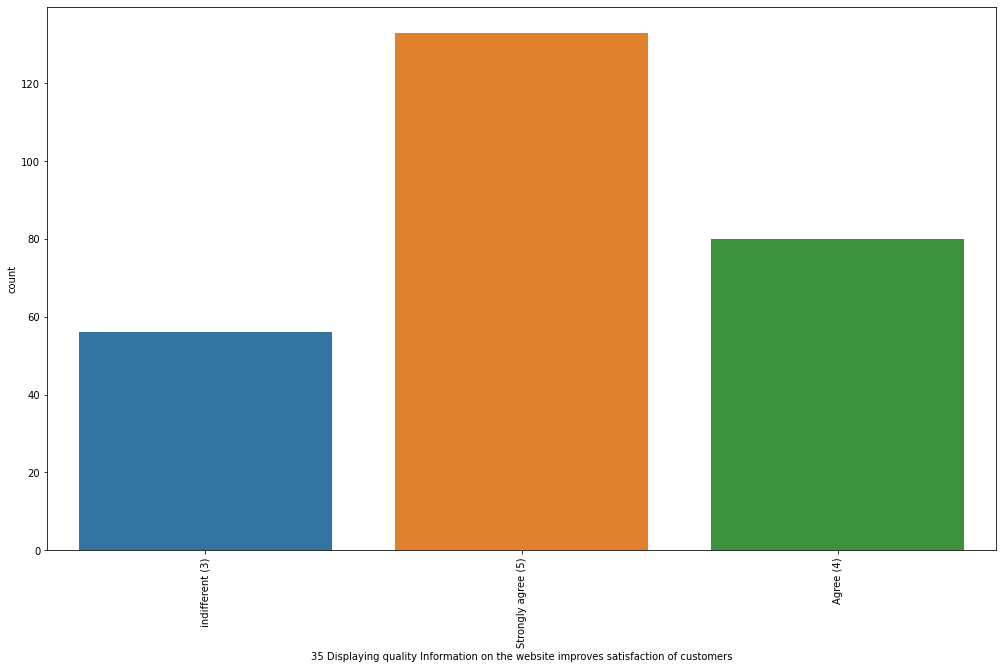



The Countplot for attribute- "36 User derive satisfaction while shopping on a good quality website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


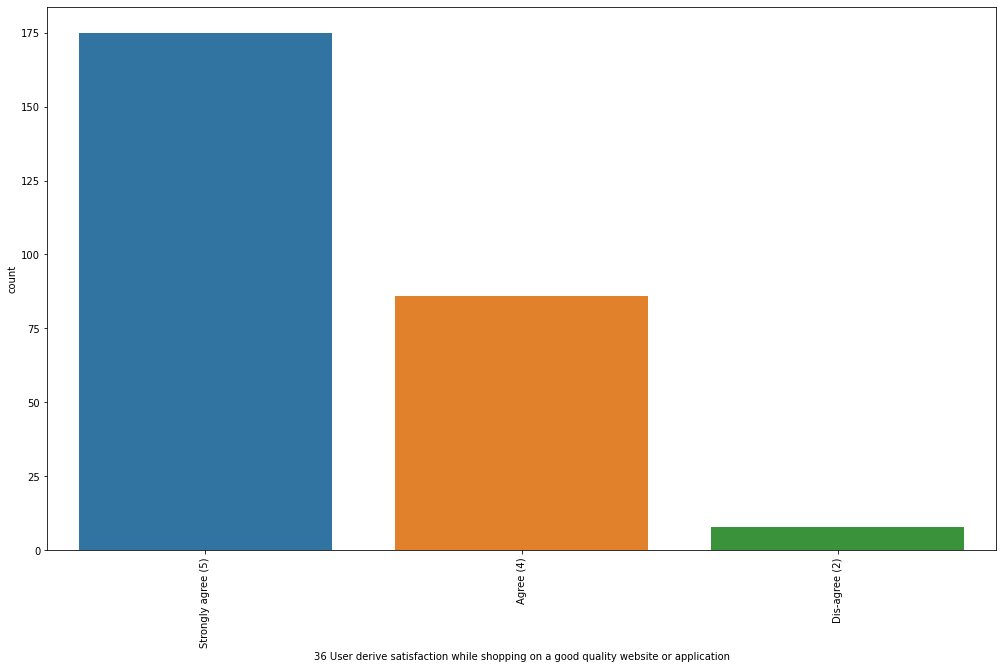



The Countplot for attribute- "37 Net Benefit derived from shopping online can lead to users satisfaction" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


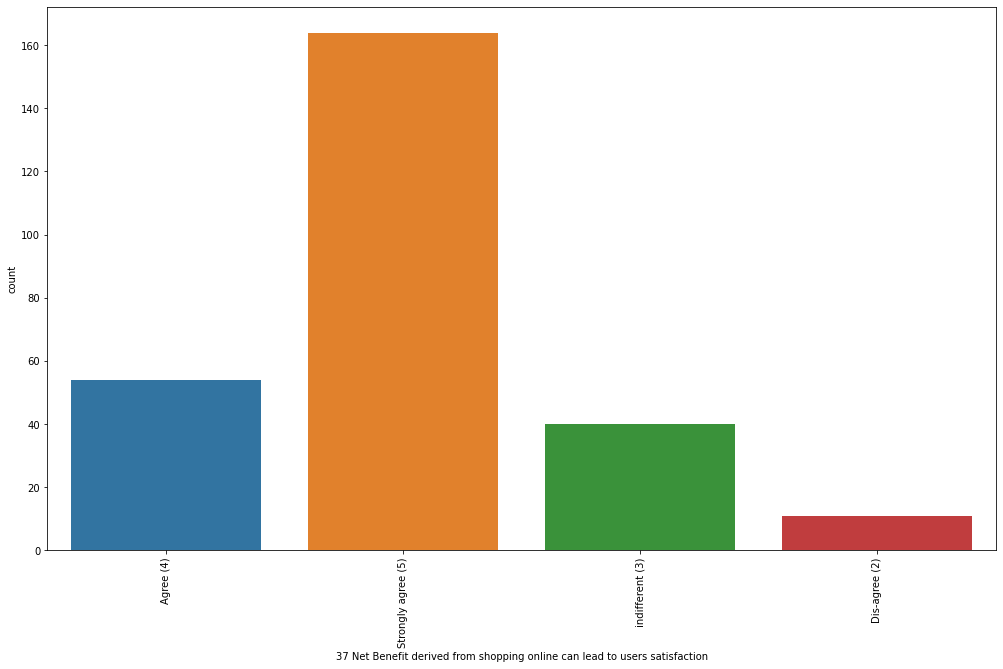



The Countplot for attribute- "38 User satisfaction cannot exist without trust" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


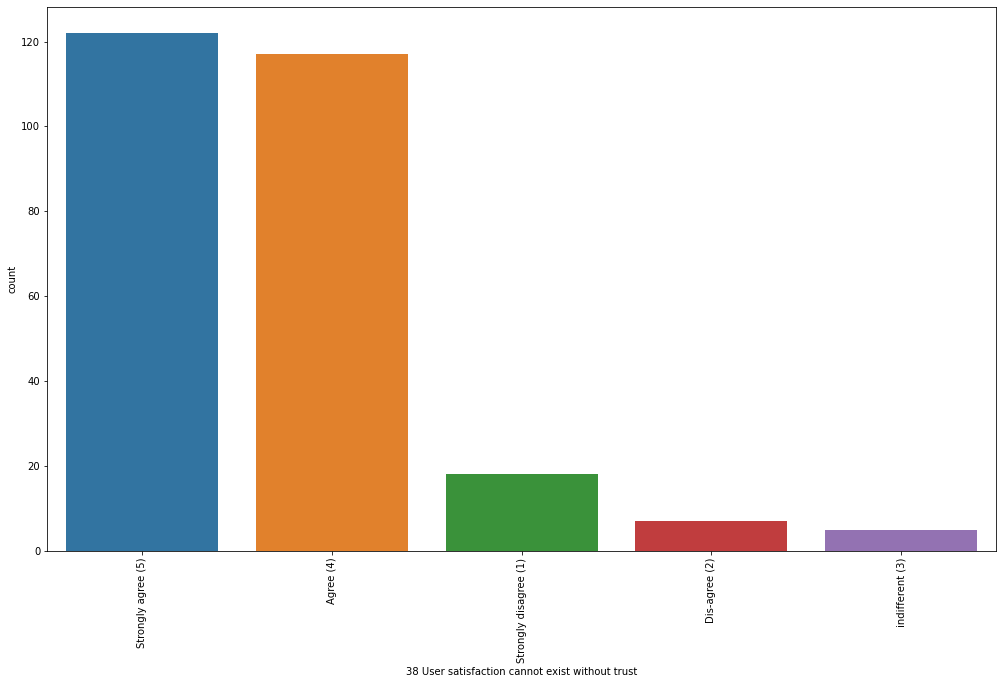



The Countplot for attribute- "39 Offering a wide variety of listed product in several category" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


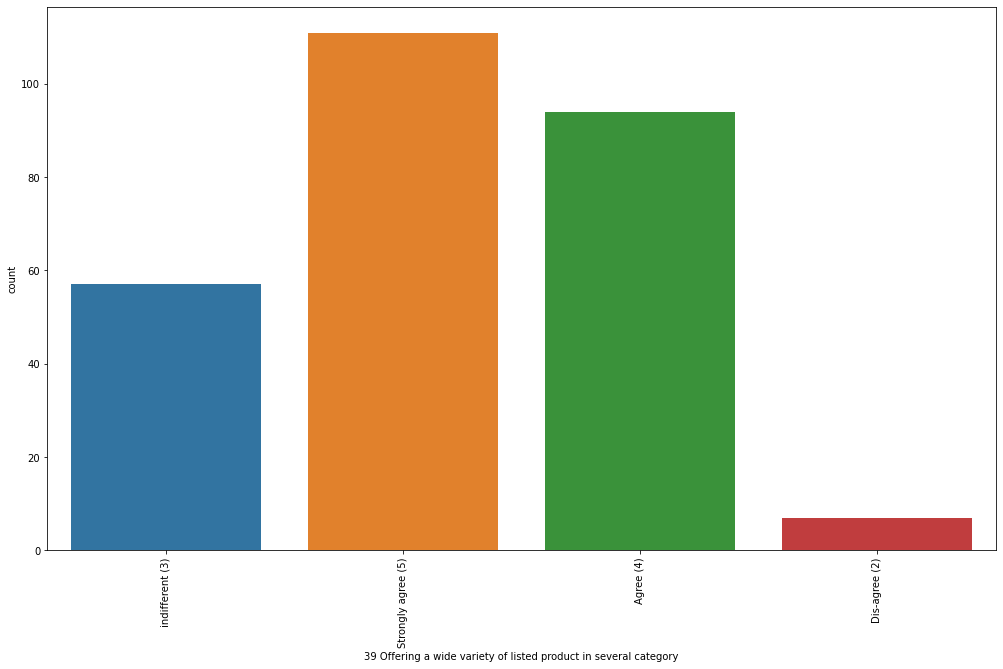



The Countplot for attribute- "40 Provision of complete and relevant product information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


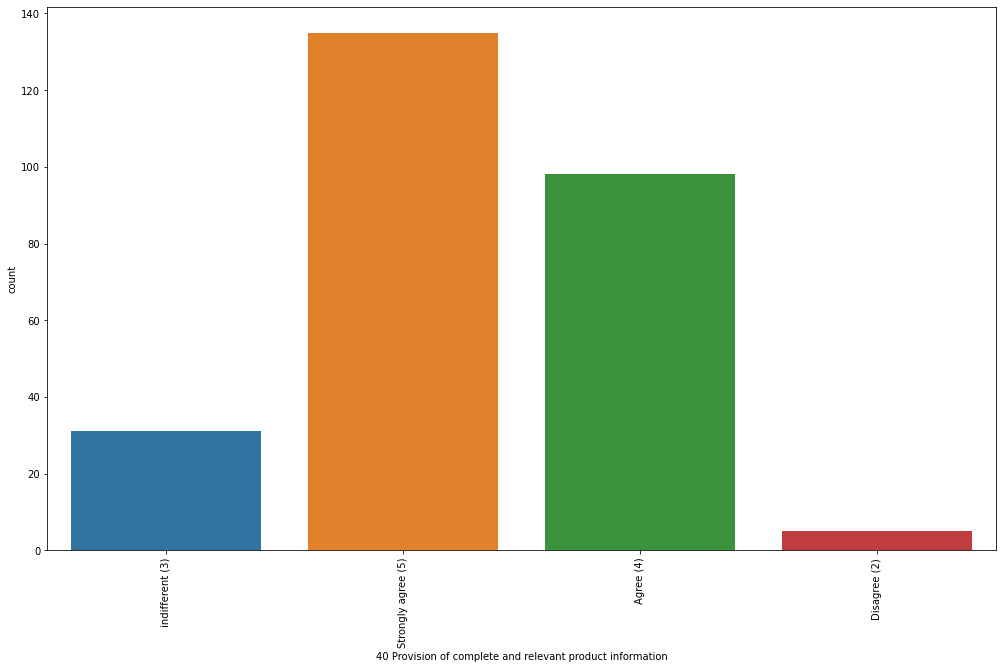



The Countplot for attribute- "41 Monetary savings" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


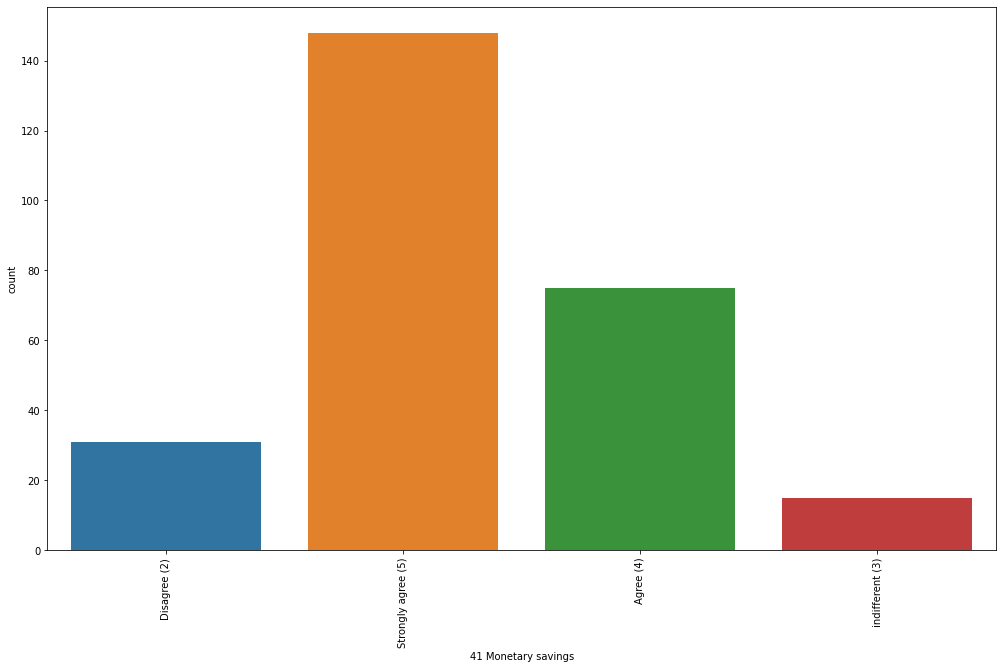



The Countplot for attribute- "42 The Convenience of patronizing the online retailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


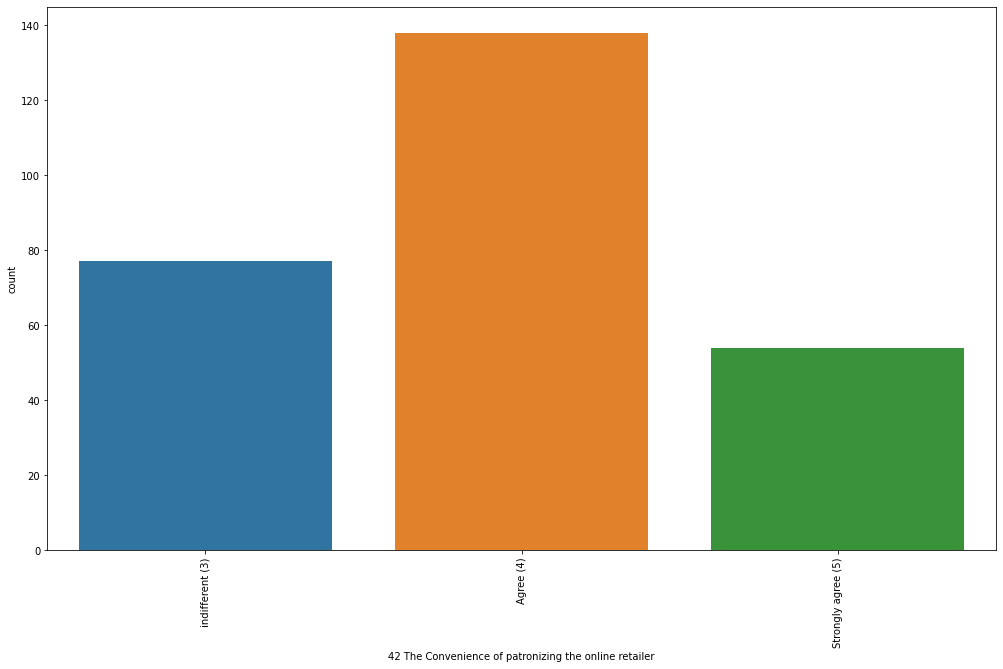



The Countplot for attribute- "43 Shopping on the website gives you the sense of adventure" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


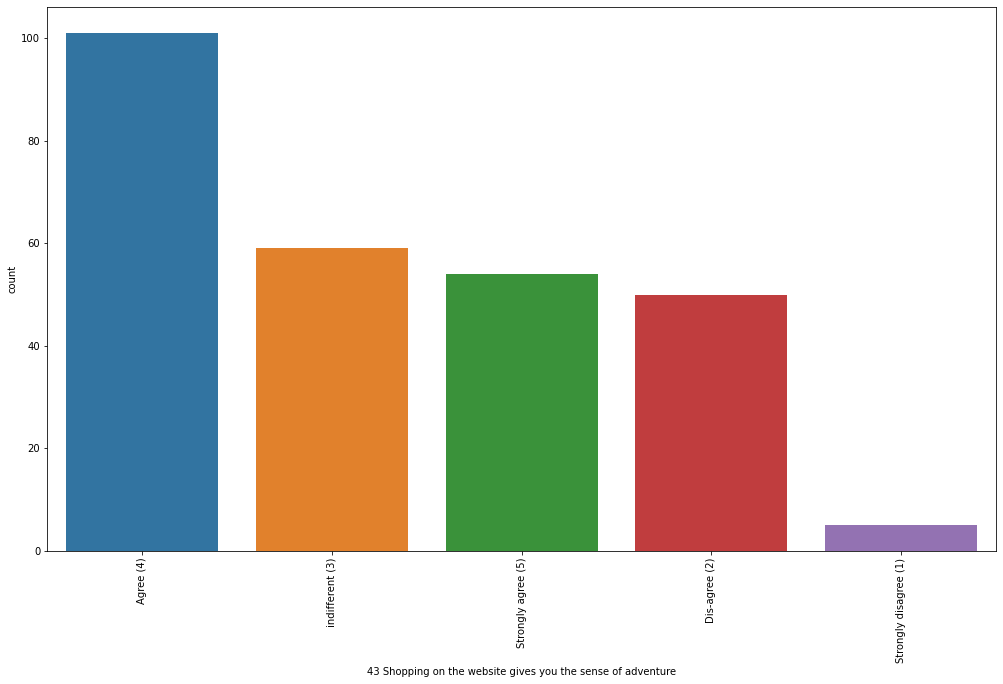



The Countplot for attribute- "44 Shopping on your preferred e-tailer enhances your social status" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


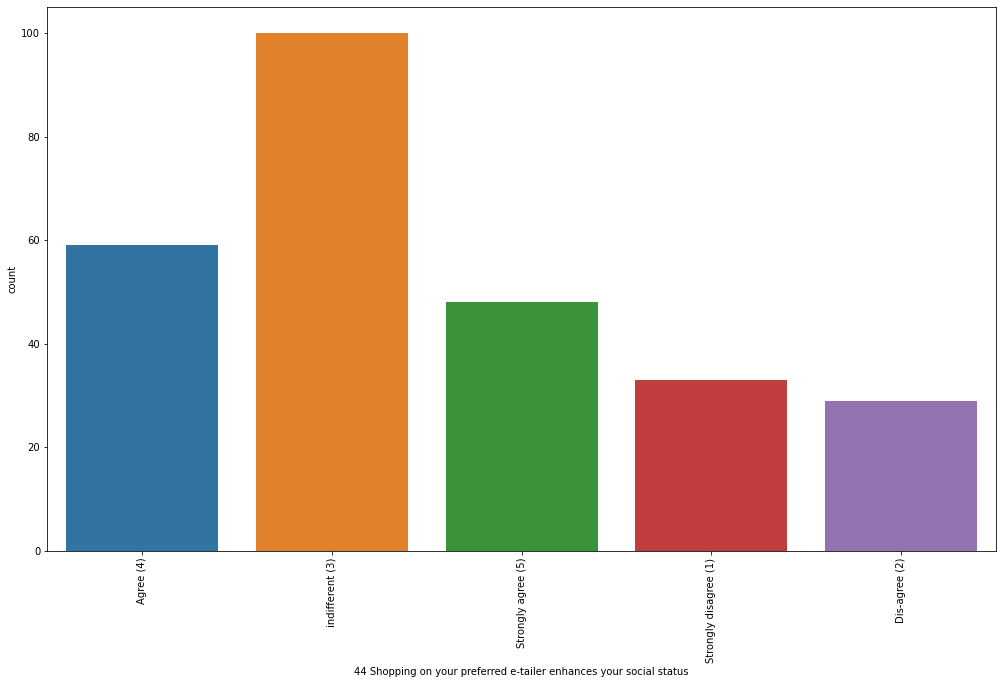



The Countplot for attribute- "45 You feel gratification shopping on your favorite e-tailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


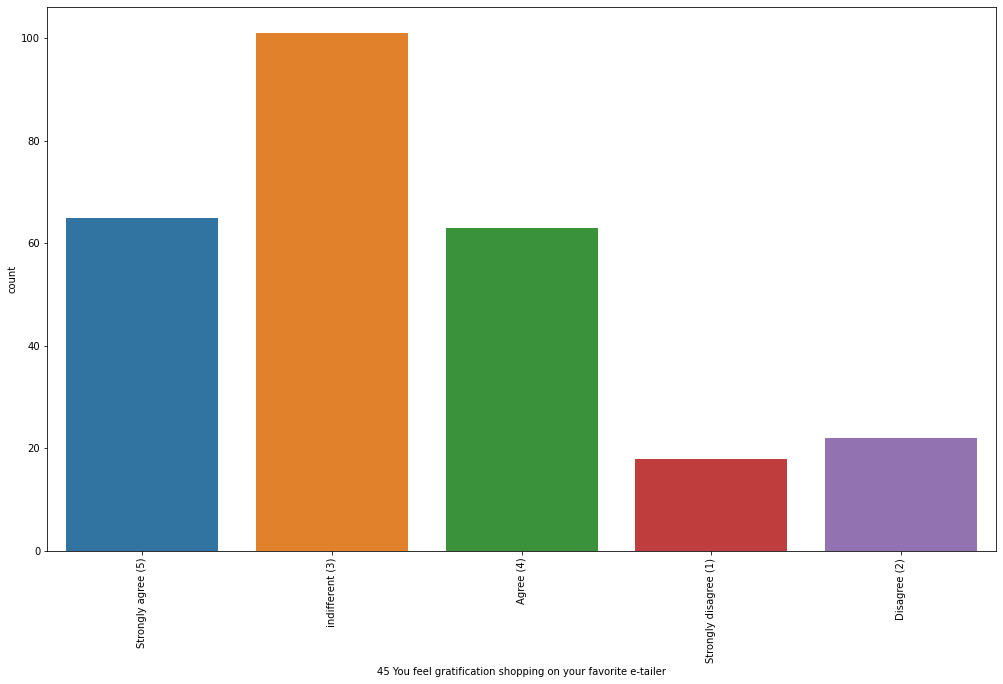



The Countplot for attribute- "46 Shopping on the website helps you fulfill certain roles" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


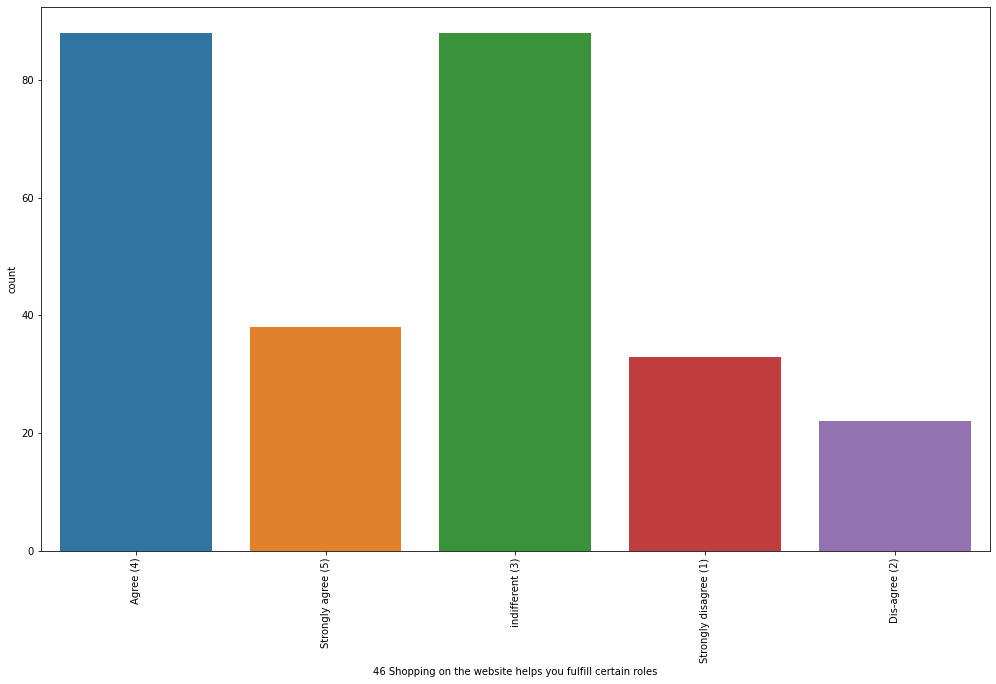



The Countplot for attribute- "47 Getting value for money spent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


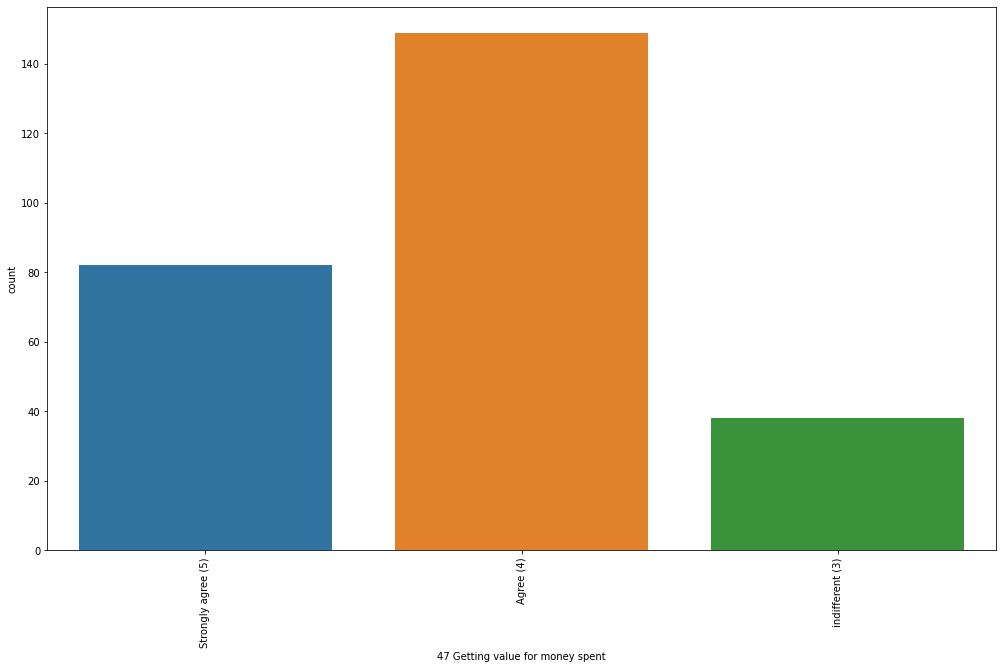



The Countplot for attribute- "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


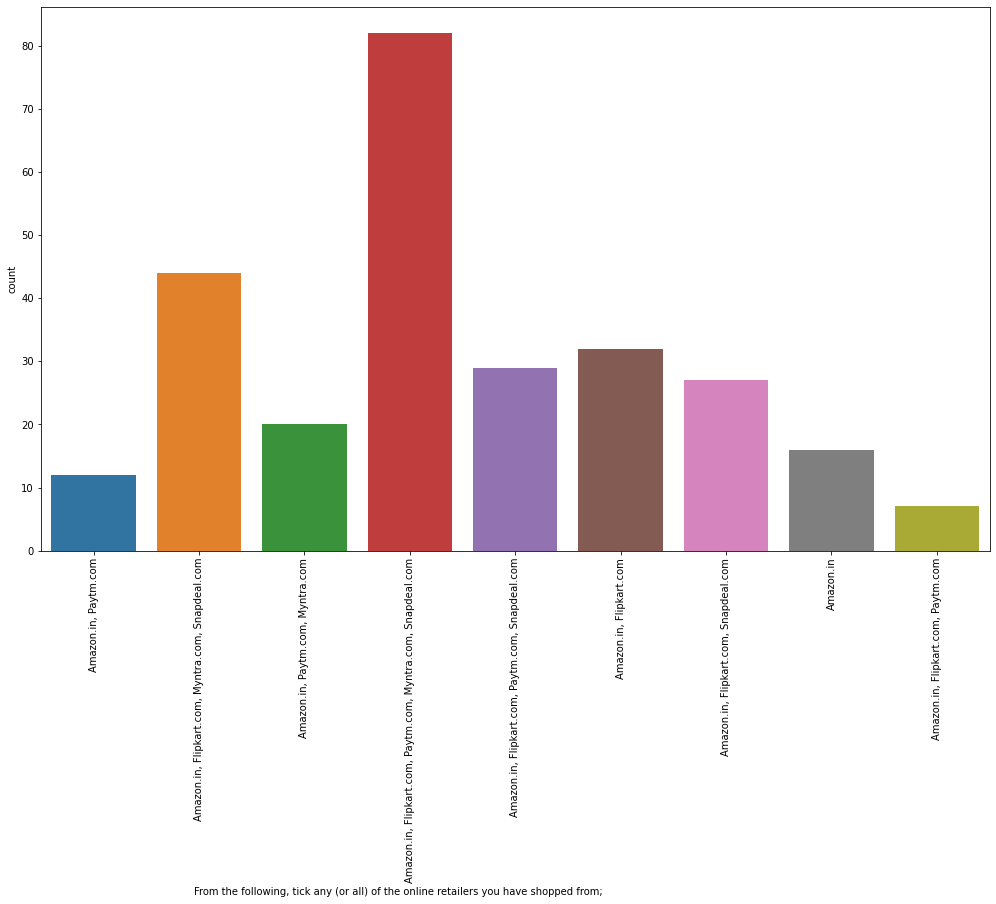



The Countplot for attribute- "Easy to use website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


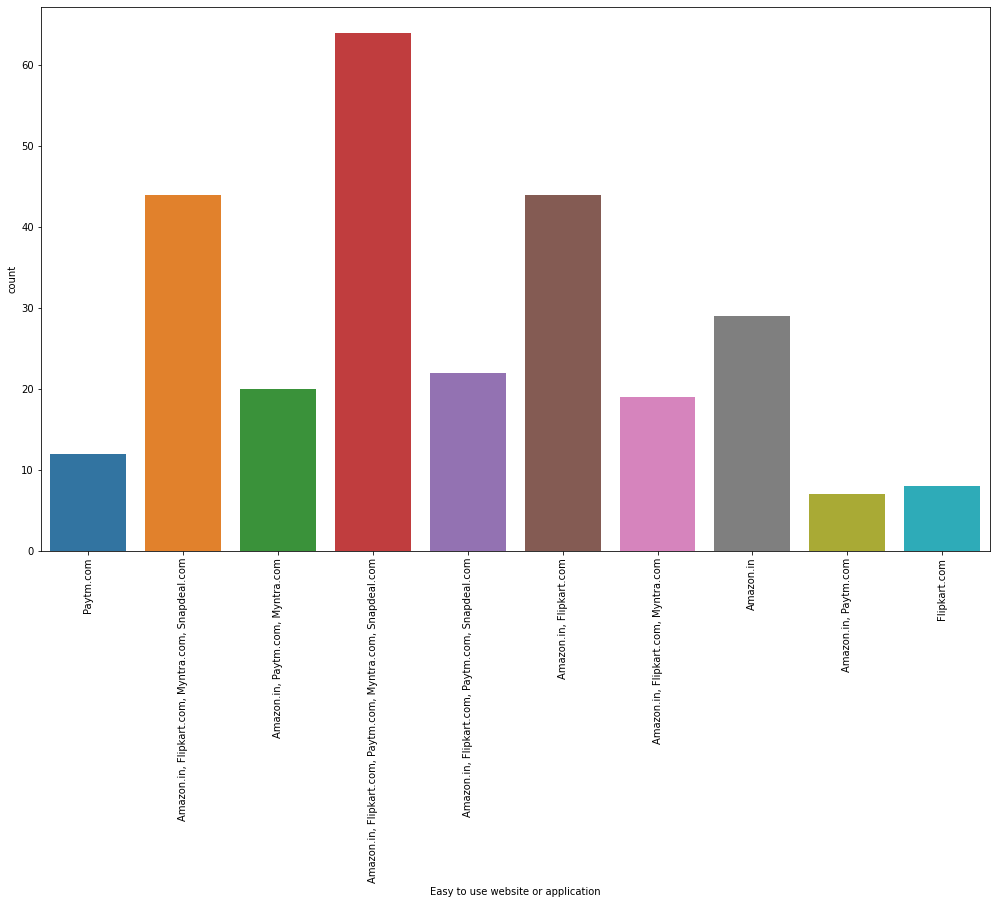



The Countplot for attribute- "Visual appealing web-page layout" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


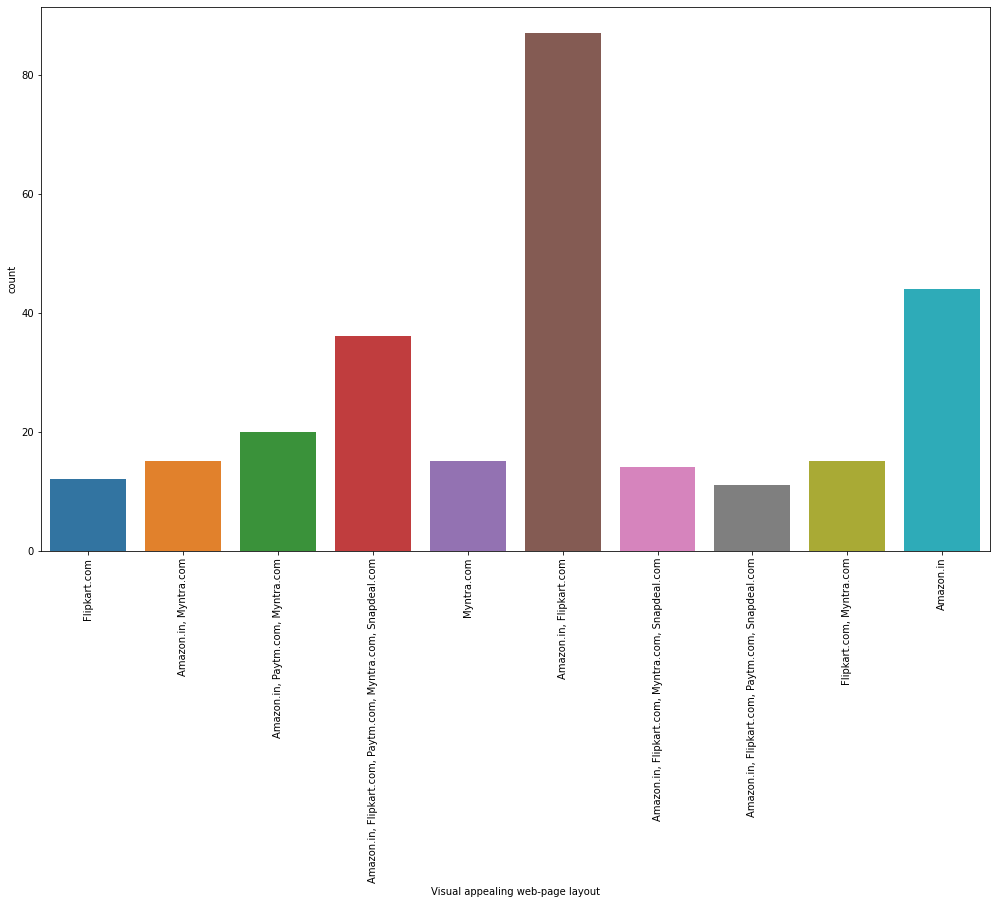



The Countplot for attribute- "Wild variety of product on offer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


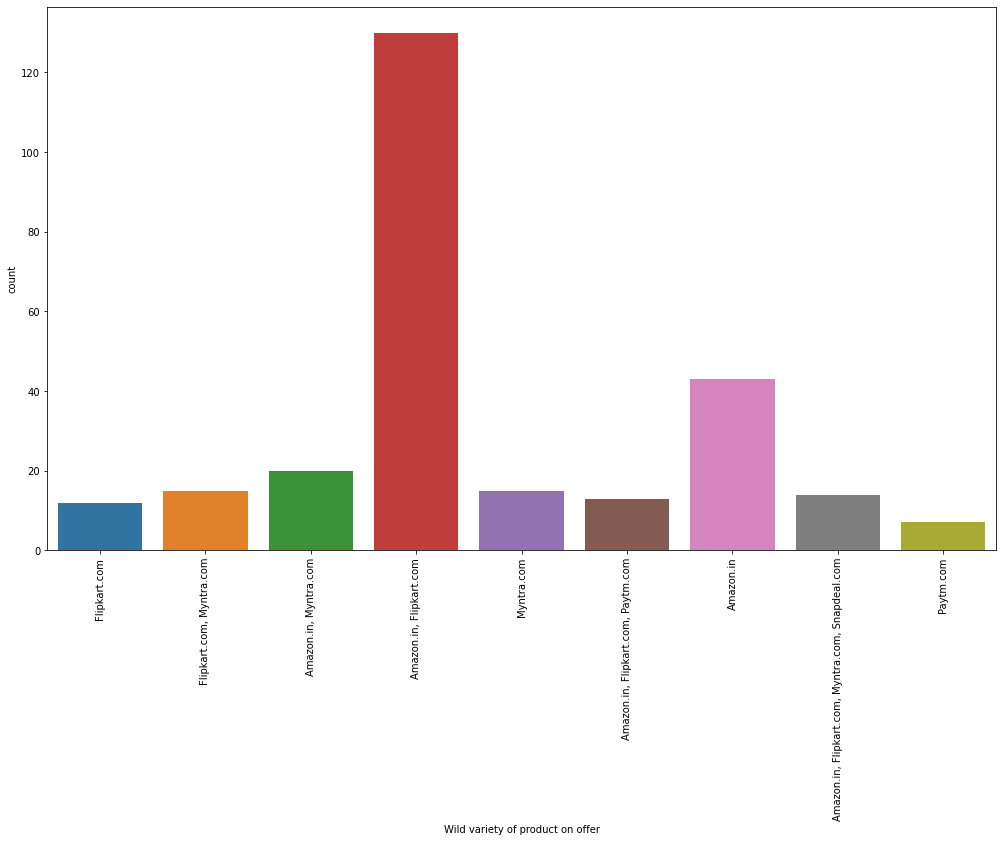



The Countplot for attribute- "Complete, relevant description information of products" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


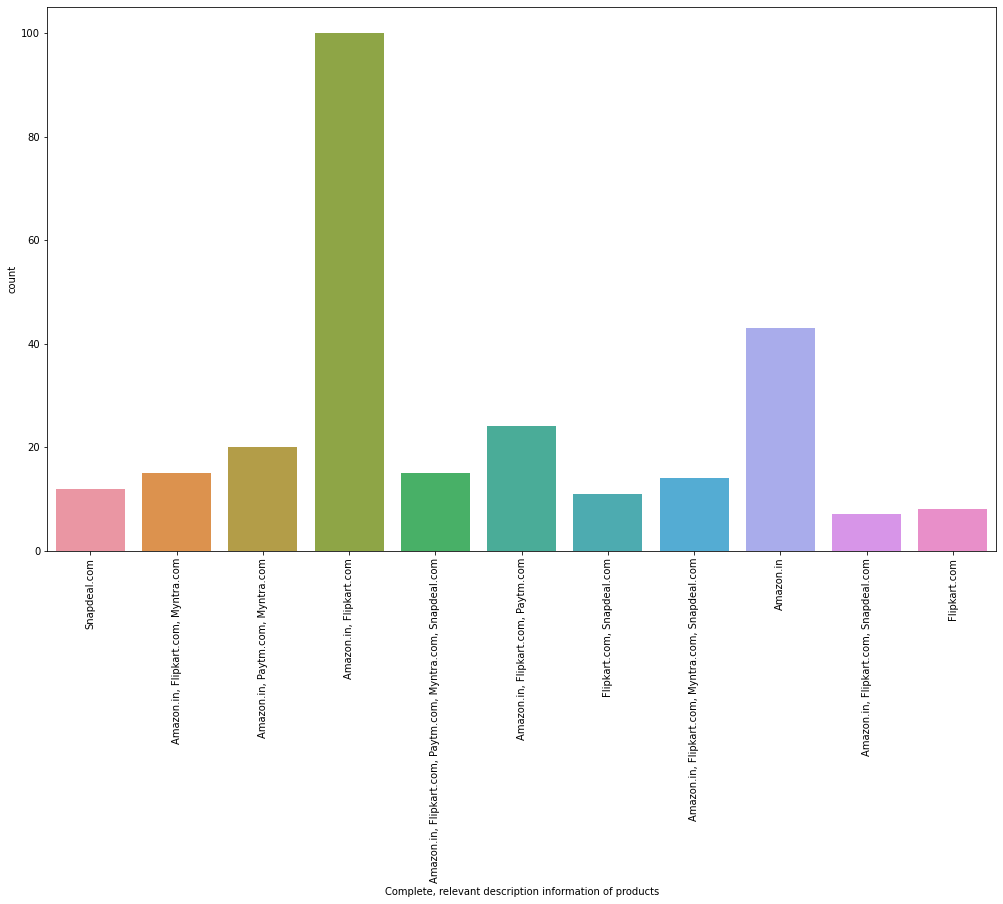



The Countplot for attribute- "Fast loading website speed of website and application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


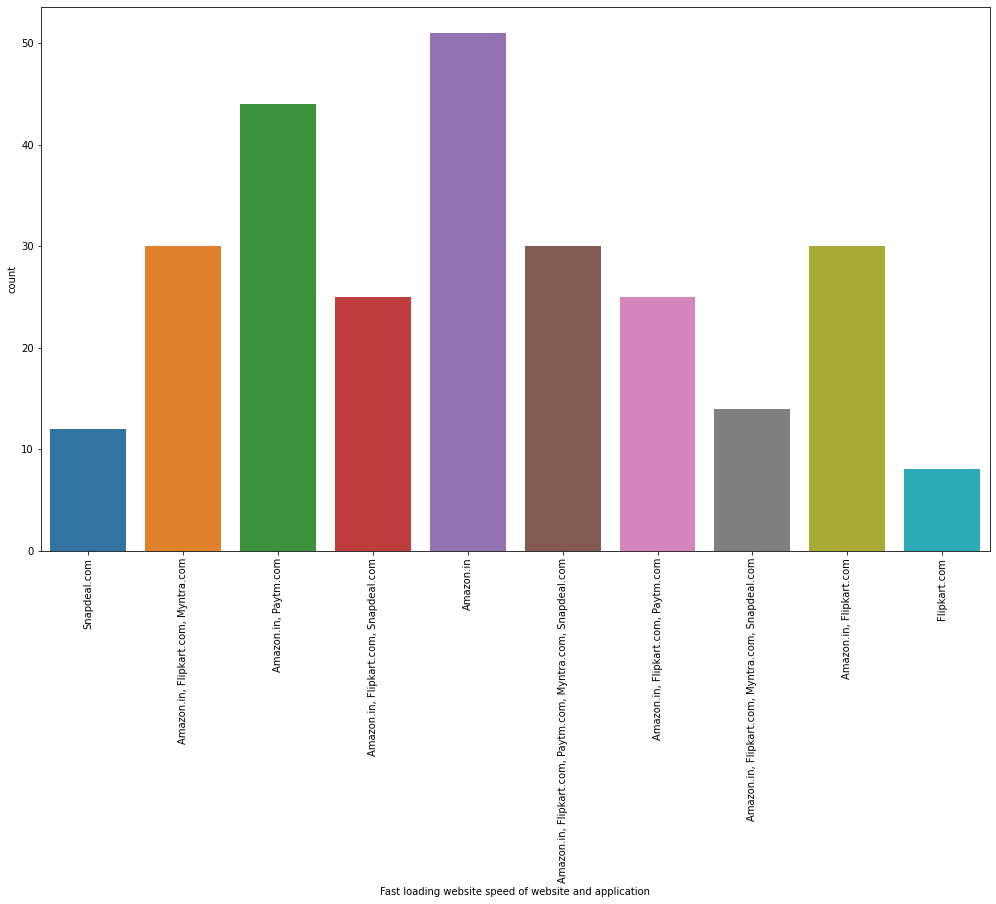



The Countplot for attribute- "Reliability of the website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


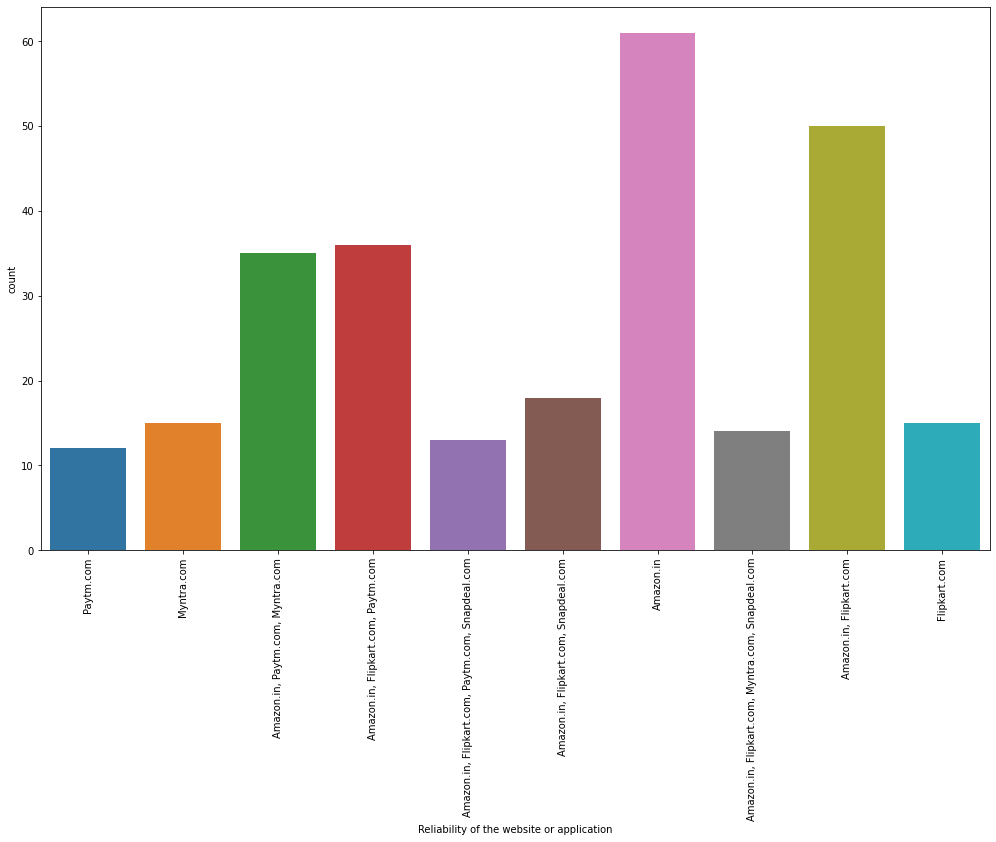



The Countplot for attribute- "Quickness to complete purchase" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


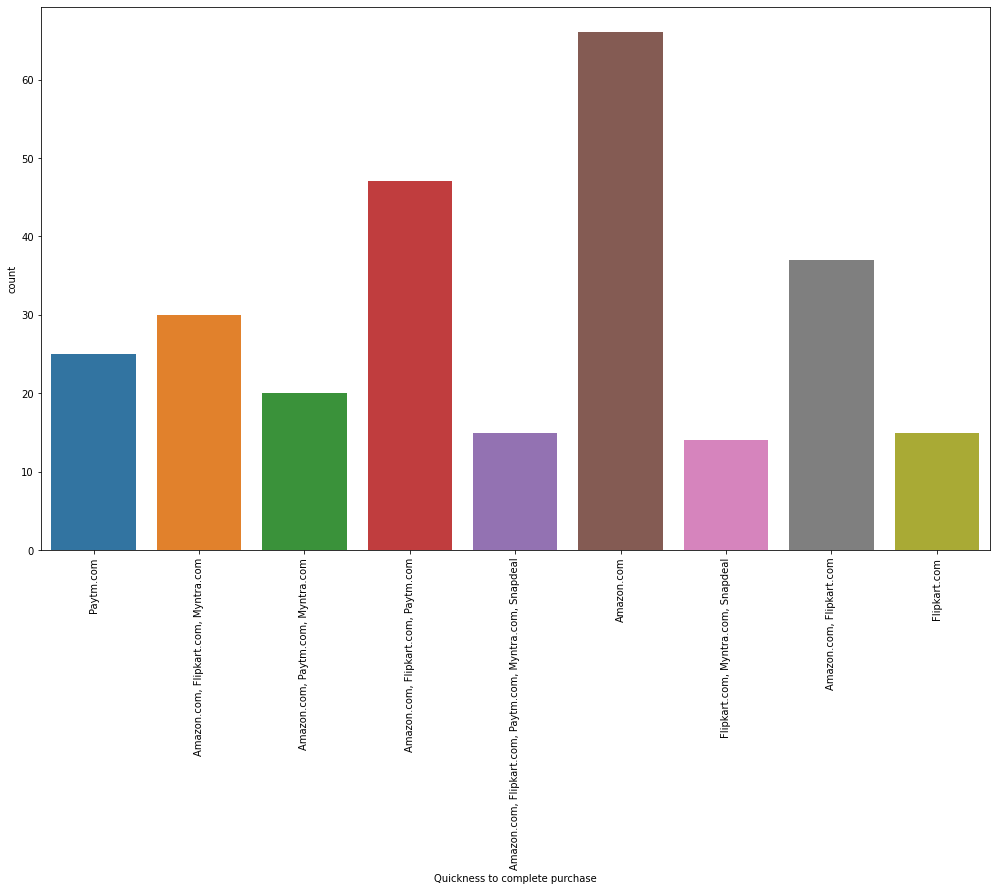



The Countplot for attribute- "Availability of several payment options" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


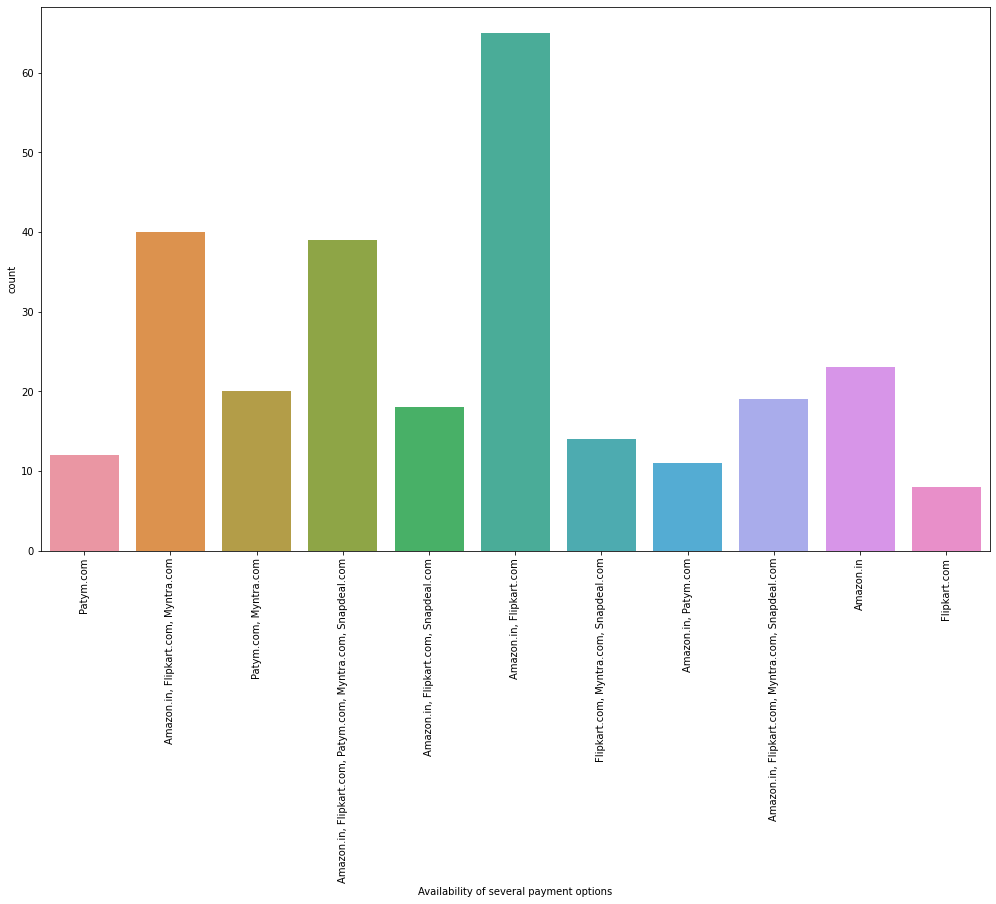



The Countplot for attribute- "Speedy order delivery " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


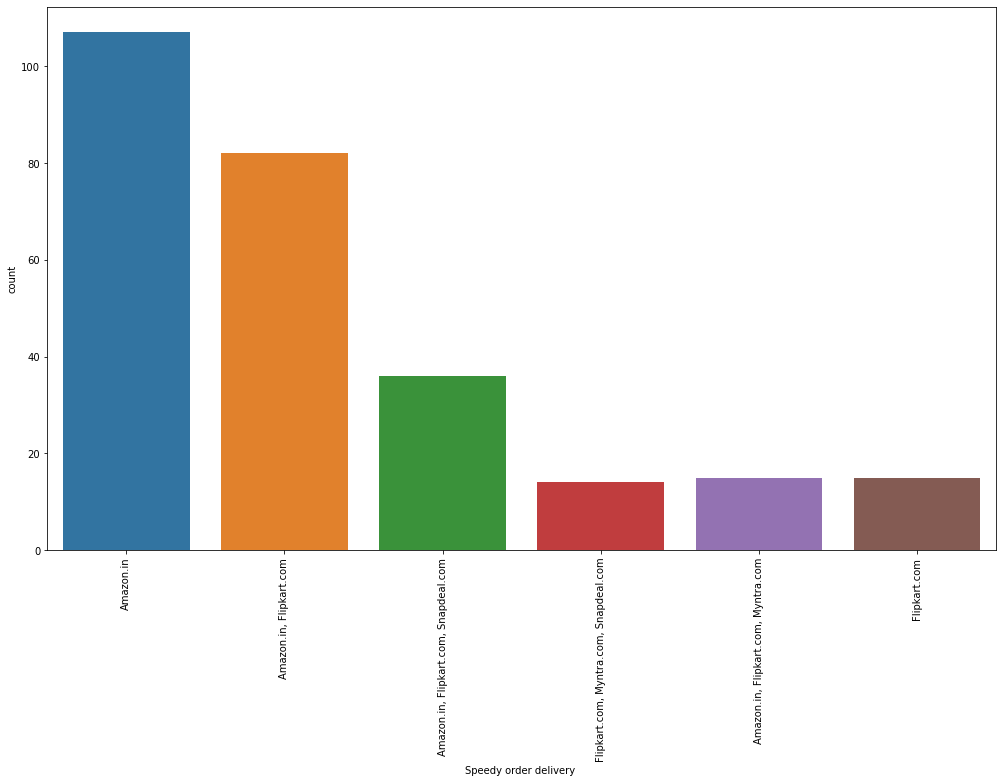



The Countplot for attribute- "Privacy of customers information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


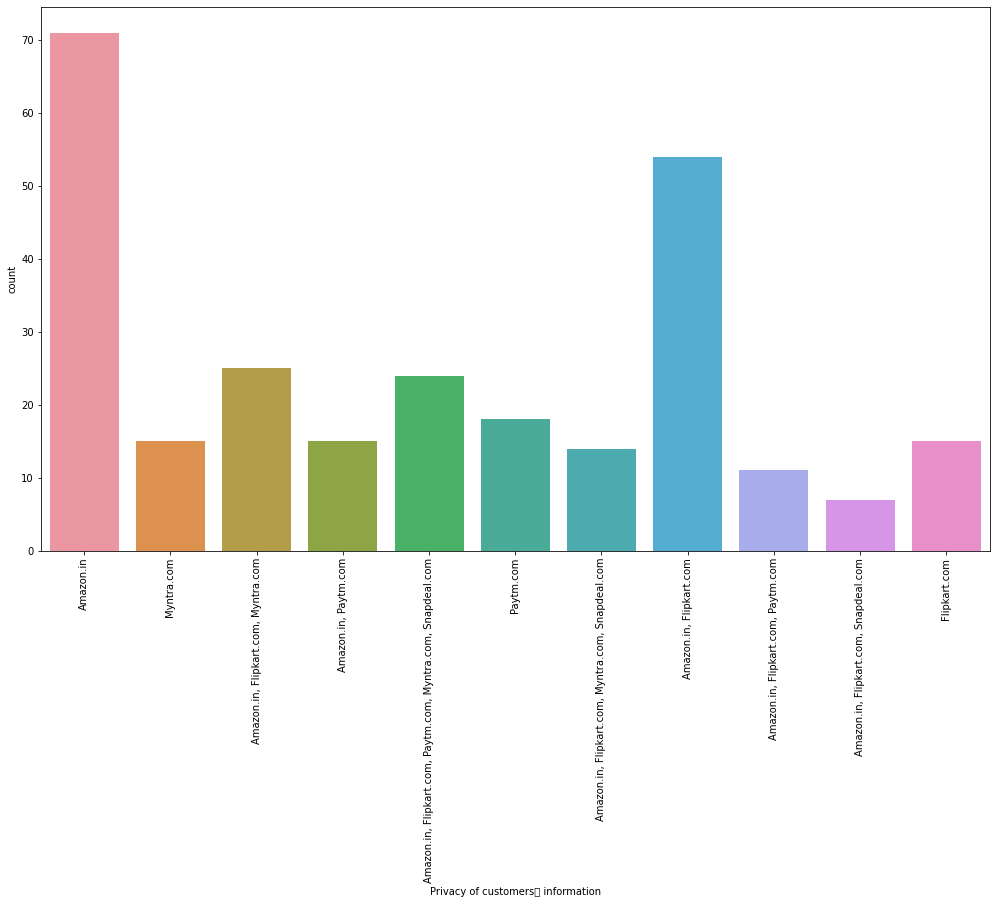



The Countplot for attribute- "Security of customer financial information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


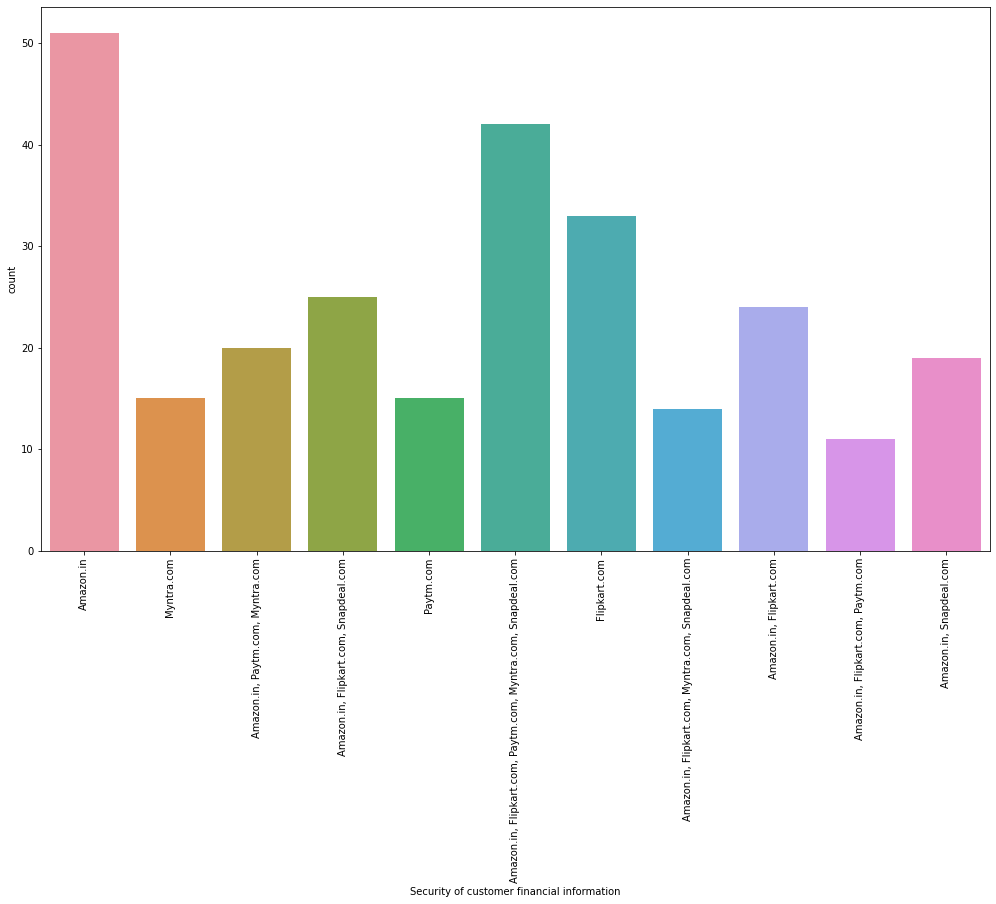



The Countplot for attribute- "Perceived Trustworthiness" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


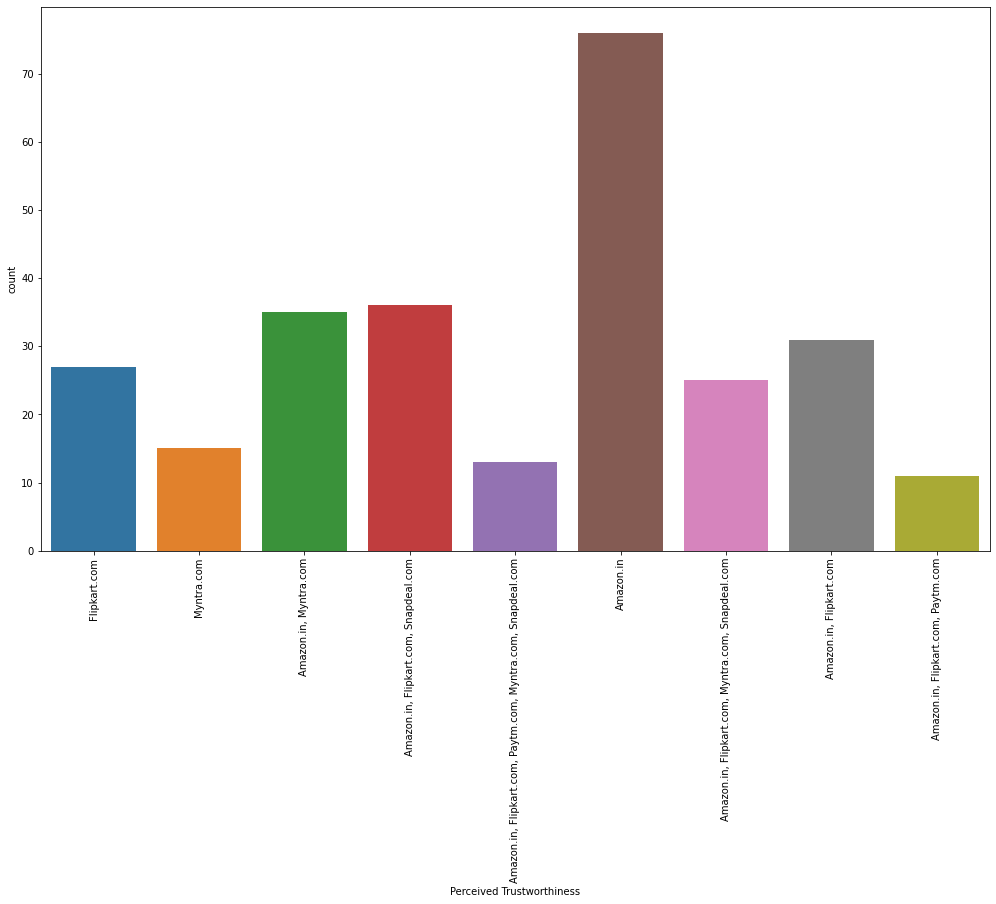



The Countplot for attribute- "Presence of online assistance through multi-channel" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


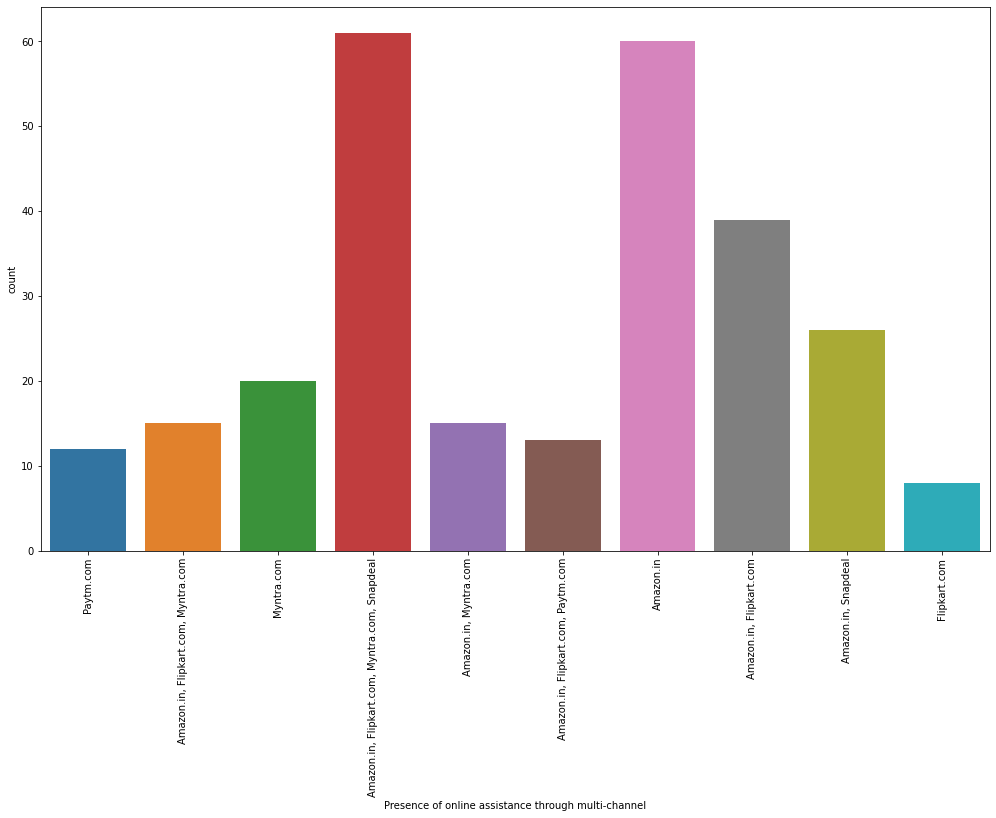



The Countplot for attribute- "Longer time to get logged in (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


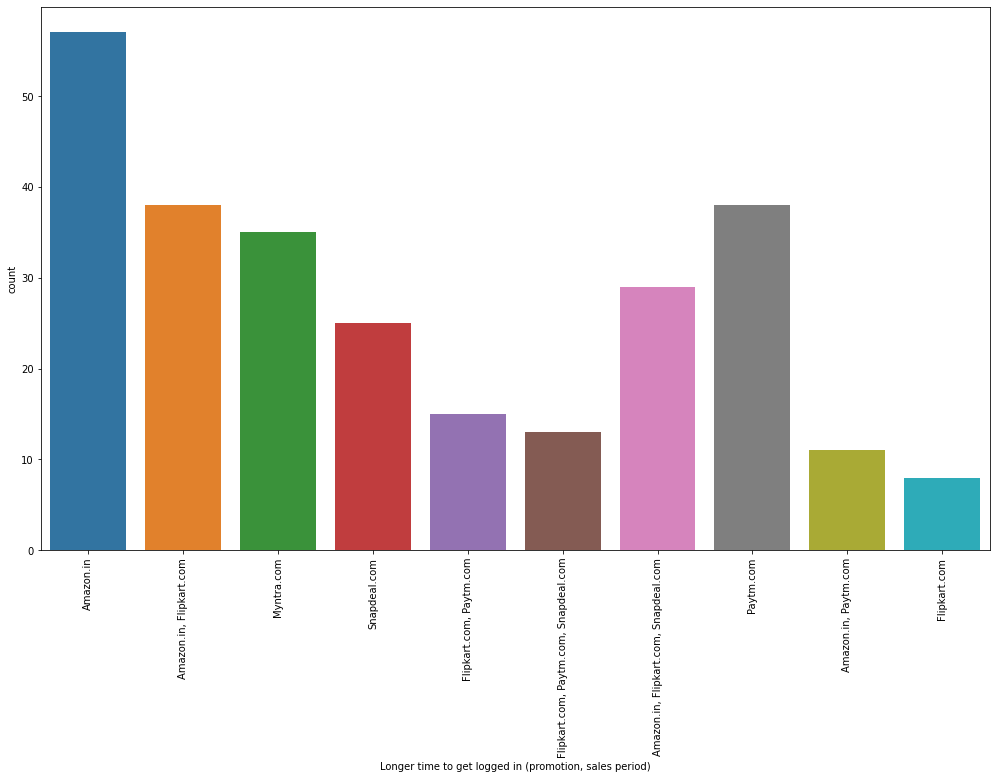



The Countplot for attribute- "Longer time in displaying graphics and photos (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


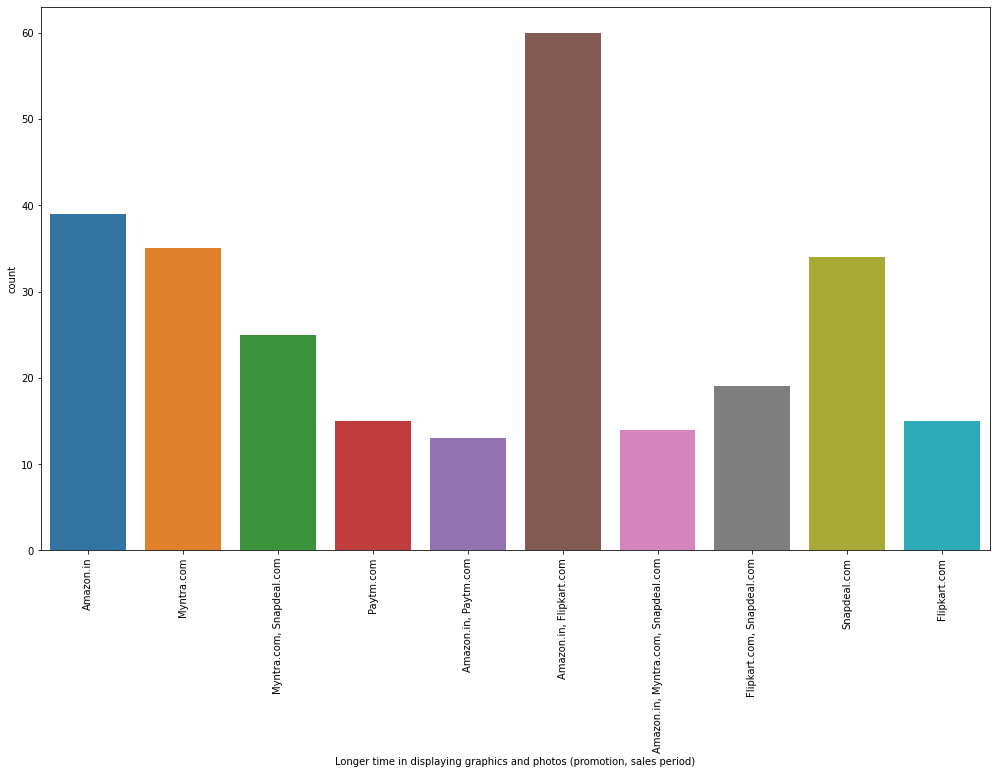



The Countplot for attribute- "Late declaration of price (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


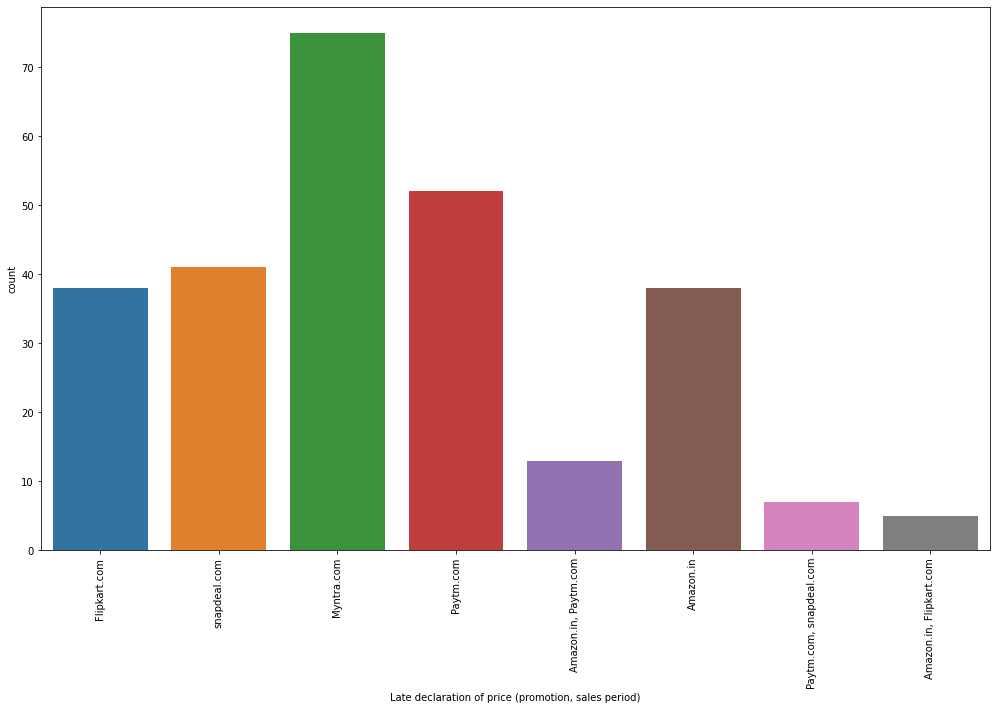



The Countplot for attribute- "Longer page loading time (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


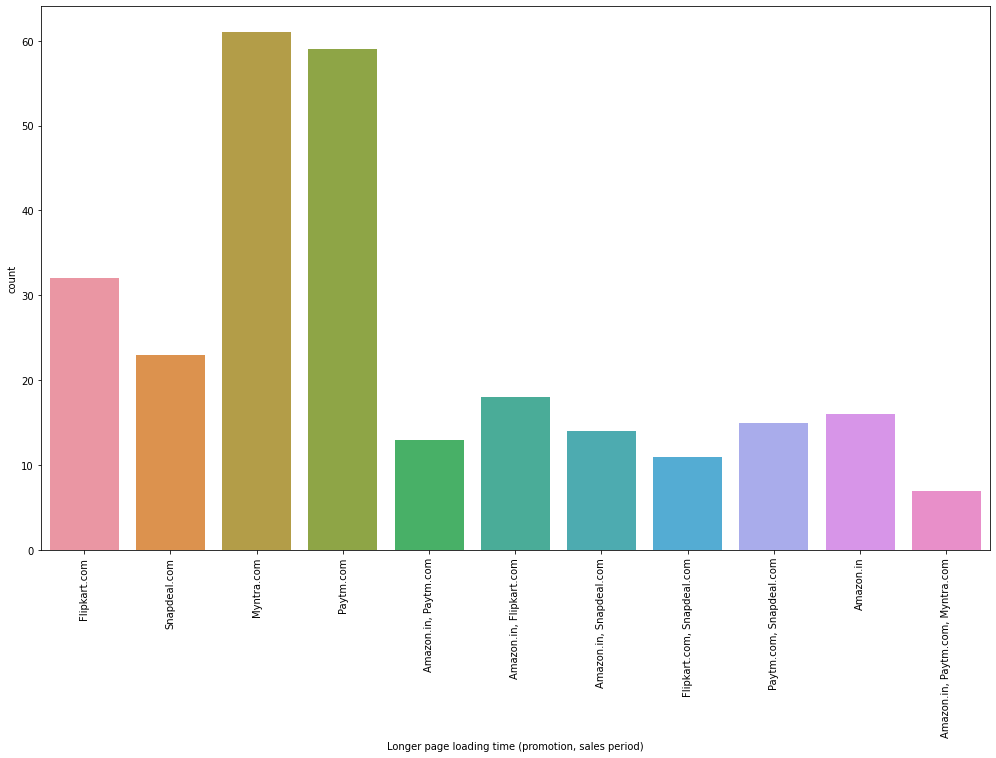



The Countplot for attribute- "Limited mode of payment on most products (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


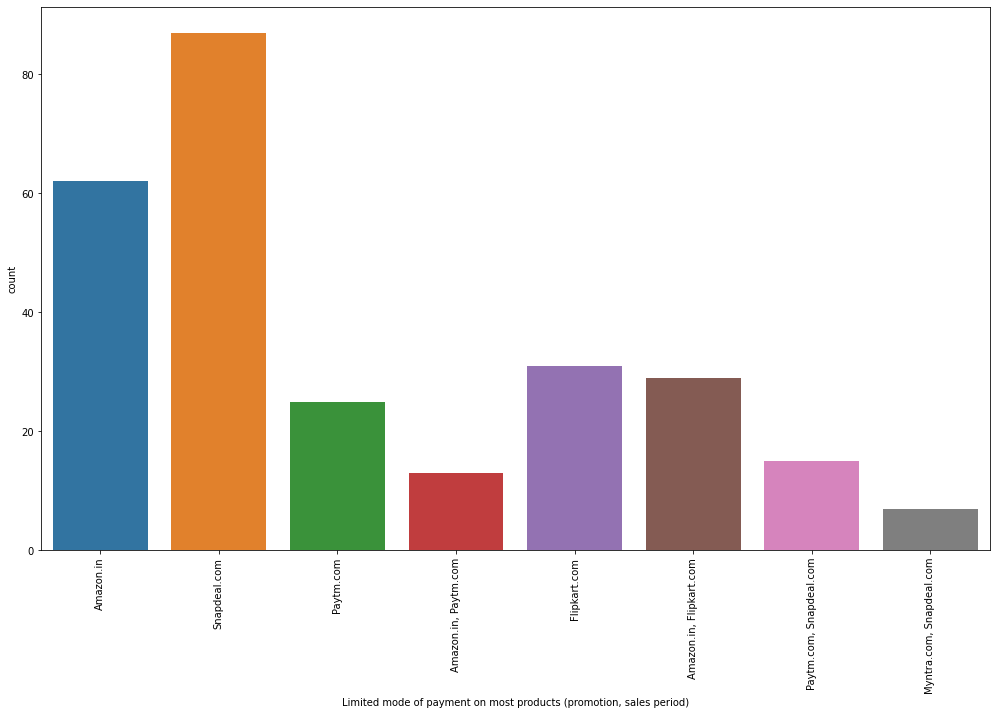



The Countplot for attribute- "Longer delivery period" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


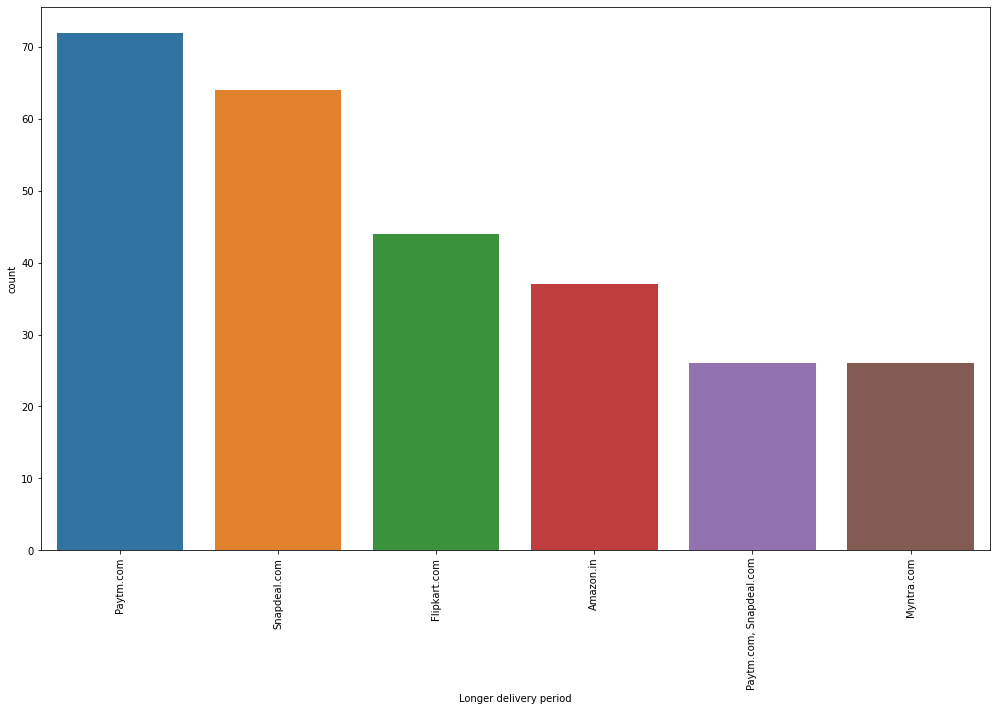



The Countplot for attribute- "Change in website/Application design" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


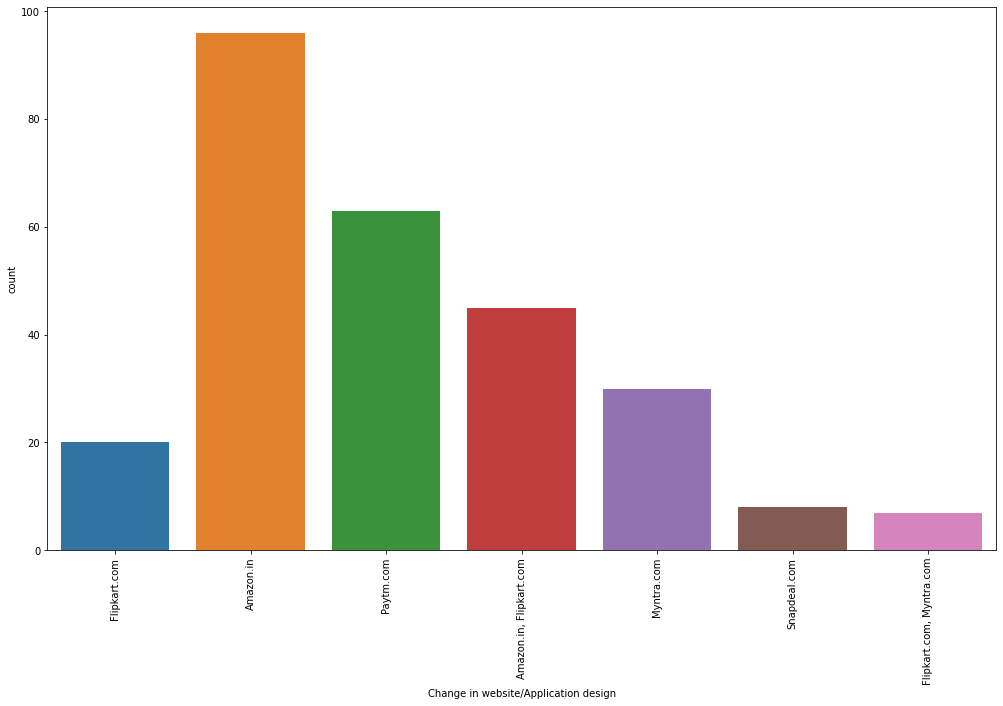



The Countplot for attribute- "Frequent disruption when moving from one page to another" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


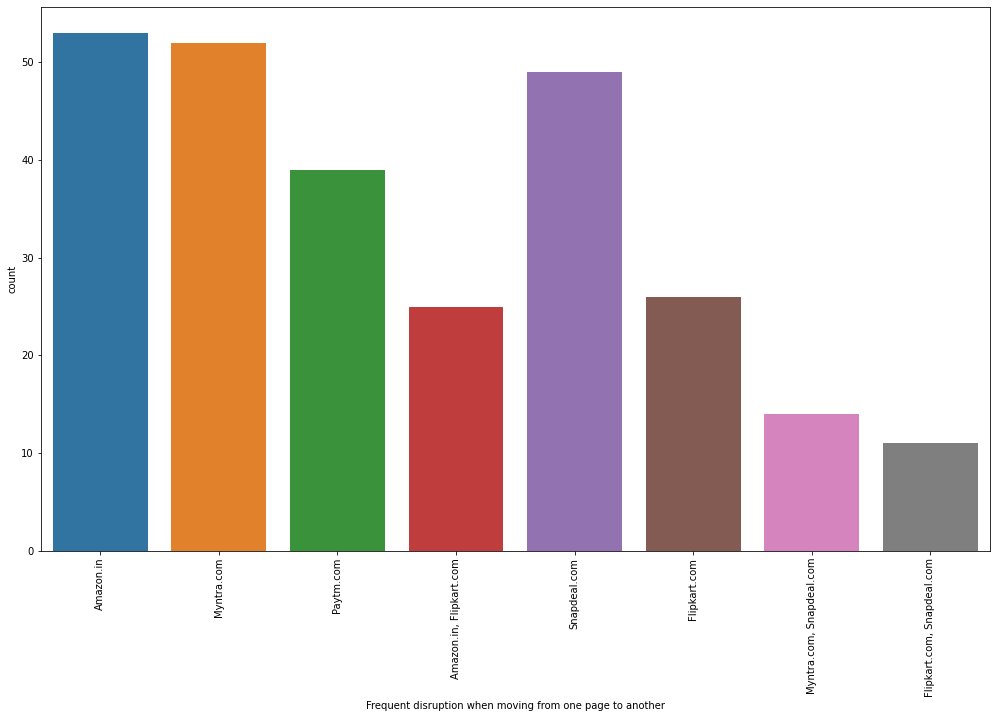



The Countplot for attribute- "Website is as efficient as before" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


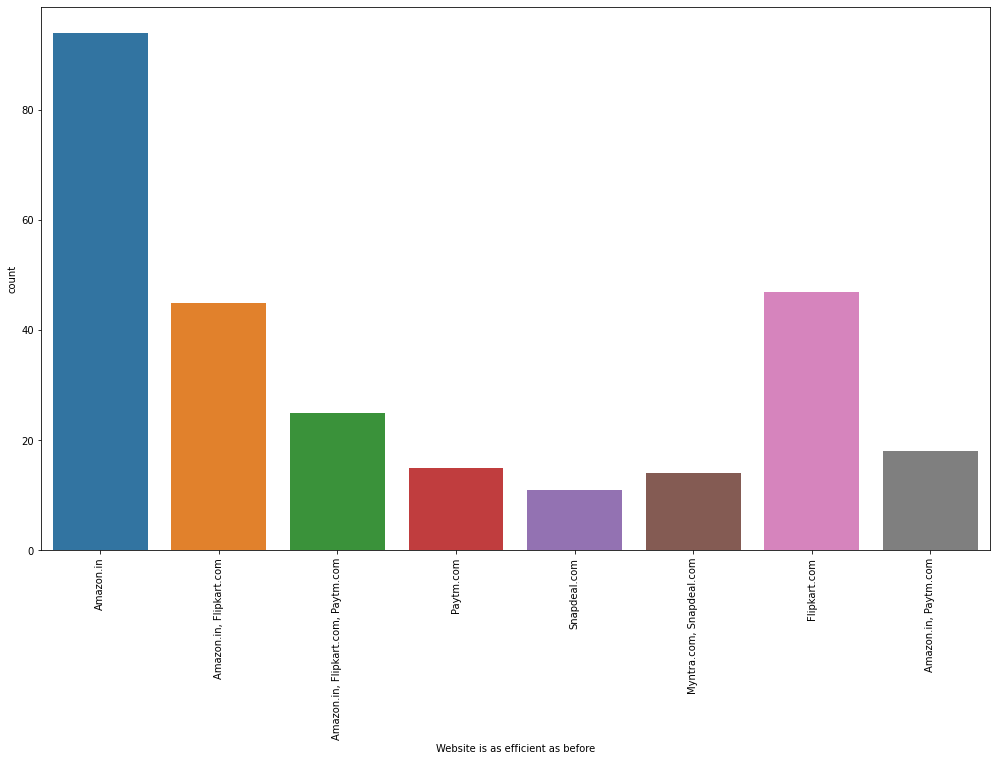



The Countplot for attribute- "Which of the Indian online retailer would you recommend to a friend?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


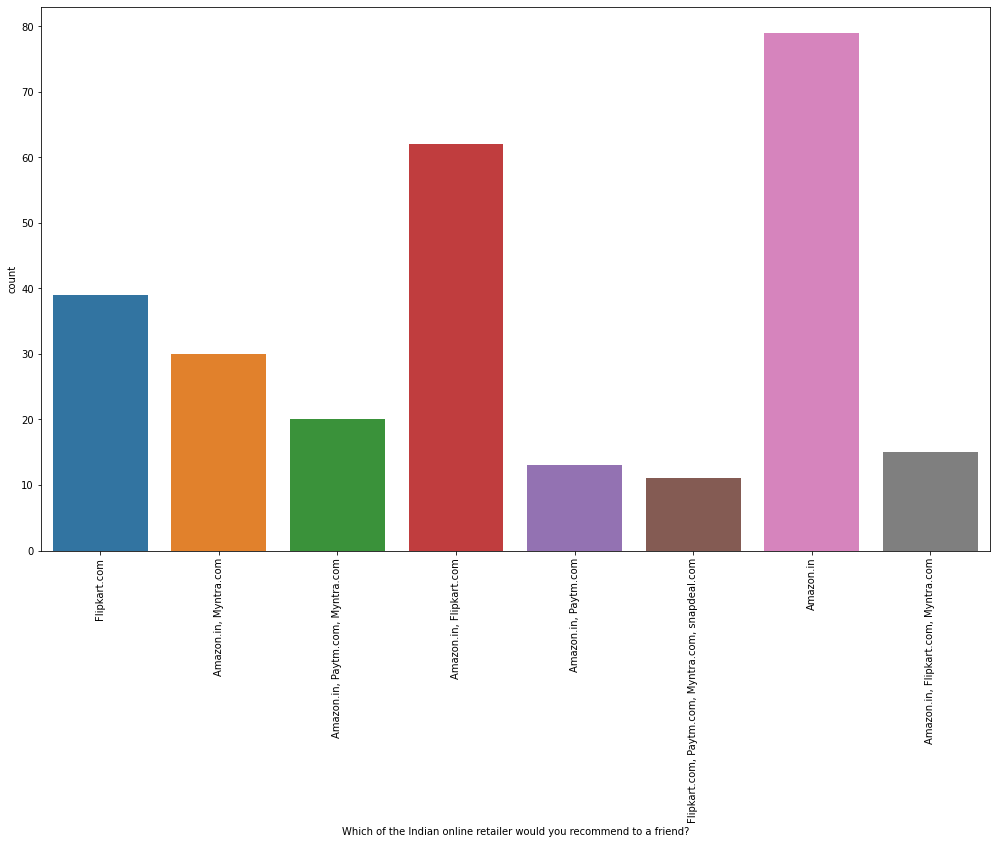

In [17]:
for i in df.columns:
    plt.figure(figsize=(17,10))
    print(f'The Countplot for attribute- "{i}" is-\n\n {sns.countplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

I've explained everything w.r.t.count for almost each attributes in the above part.So these graphs are self explanatory itself

#### Pie Chart

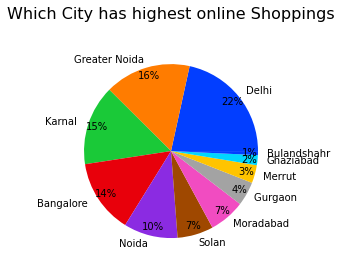

In [113]:
Customer_Count = [58,43,40,37,27,18,18,12,9,5,2]
City = ['Delhi','Greater Noida','Karnal ','Bangalore ','Noida','Solan','Moradabad','Gurgaon ','Merrut','Ghaziabad','Bulandshahr']
colors = sns.color_palette('bright')
plt.pie(total_sales,labels=location,colors=colors,autopct='%.0f%%',pctdistance=0.9)
plt.title('Which City has highest online Shoppings\n',fontsize=16)
plt.show()

Delhi has highest online shoppings

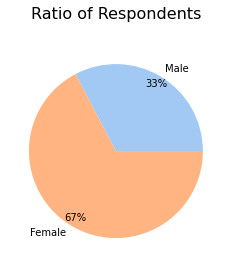

In [114]:
Count = [88,181]
Gender = ['Male','Female']
colors = sns.color_palette('pastel')
plt.pie(Count,labels=Gender,colors=colors,autopct='%.0f%%',pctdistance=0.9)
plt.title('Ratio of Respondents\n',fontsize=16)
plt.show()

Females are shooping more than males

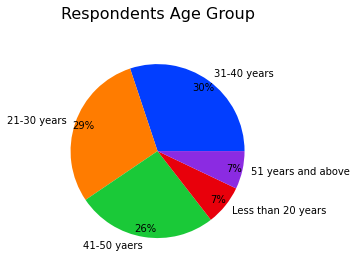

In [115]:
Count = [81,79,70,20,19]
Age = ['31-40 years','21-30 years','41-50 yaers','Less than 20 years','51 years and above']
colors = sns.color_palette('bright')
plt.pie(Count,labels=Age,colors=colors,autopct='%.0f%%',pctdistance=0.9)
plt.title('Respondents Age Group\n',fontsize=16)
plt.show()

21-30  is the age group for the most of the respondets,who are shopping online

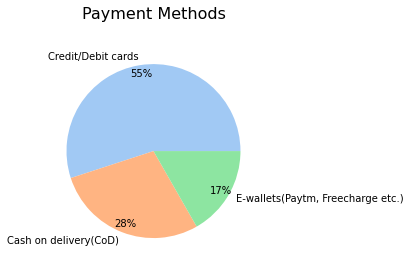

In [118]:
Response = [148,76,45]
Payment = ['Credit/Debit cards','Cash on delivery(CoD)','E-wallets(Paytm, Freecharge etc.)']
colors = sns.color_palette('pastel')
plt.pie(Response,labels=Payment,colors=colors,autopct='%.0f%%',pctdistance=0.9)
plt.title('Payment Methods\n',fontsize=16)
plt.show()

55% of the customers are using credit/debit card for the payments

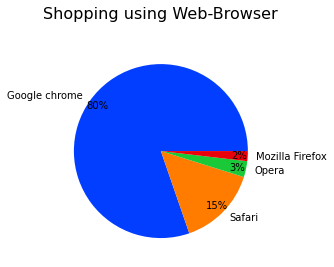

In [117]:
Response = [216,40,8,5]
Browser = ['Google chrome','Safari','Opera','Mozilla Firefox']
colors = sns.color_palette('bright')
plt.pie(Response,labels=Browser,colors=colors,autopct='%.0f%%',pctdistance=0.9)
plt.title('Shopping using Web-Browser\n',fontsize=16)
plt.show()

80% of the customers prefer using Google chrome while making online shoppings

##### Let's change all the categorical attributes into numeric one,so that we can analysis the data more clearly

### Encoder

#### Label Encoder

In [7]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:
for i in df.columns:
    df[i]=LabelEncoder().fit_transform(df[i].astype(str))

In [9]:
df.dtypes

1Gender of respondent                                                   int32
2 How old are you?                                                      int32
3 Which city do you shop online from?                                   int32
4 What is the Pin Code of where you shop online from?                   int32
5 Since How Long You are Shopping Online ?                              int32
                                                                        ...  
Longer delivery period                                                  int32
Change in website/Application design                                    int32
Frequent disruption when moving from one page to another                int32
Website is as efficient as before                                       int32
Which of the Indian online retailer would you recommend to a friend?    int32
Length: 71, dtype: object

##### As we can see that the all the attributes are now converted into the numeric data types,hence let's explore some more insights

In [10]:
#Dataframe has now only numeric data columns
df.head()

1Gender of respondent  2 How old are you?   \
0                      1                    1   
1                      0                    0   
2                      0                    0   
3                      1                    0   
4                      0                    0   

   3 Which city do you shop online from?  \
0                                      2   
1                                      2   
2                                      4   
3                                      6   
4                                      0   

   4 What is the Pin Code of where you shop online from?  \
0                                                  1       
1                                                  5       
2                                                 23       
3                                                 11       
4                                                 31       

   5 Since How Long You are Shopping Online ?  \
0                                           3   
1                                           3   
2                                           2   
3                                           2   
4                                           1   

   6 How many times you have made an online purchase in the past 1 year?  \
0                                                  2                       
1                                                  3                       
2                                                  3                       
3                                                  5                       
4                                                  0                       

   7 How do you access the internet while shopping on-line?  \
0                                                  0          
1                                                  2          
2                                                  1          
3                                                  1          
4                                                  2          

   8 Which device do you use to access the online shopping?  \
0                                                  0          
1                                                  2          
2                                                  2          
3                                                  2          
4                                                  2          

   9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                                  3                                                      
1                                                  0                                                      
2                                                  2                                                      
3                                                  2                                                      
4                                                  0                                                      

   10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                                                  2                                                        
1                                                  1                                                        
2                                                  0                                                        
3                                                  1                                                        
4                                                  1                                                        

   ...  Longer time to get logged in (promotion, sales period)  \
0  ...                                                  0        
1  ...                                                  1        
2  ...                                                  7        
3  ...    

### Descriptive Statistics

In [23]:
df.describe(include='all').T

count       mean  \
1Gender of respondent                               269.0   0.327138   
2 How old are you?                                  269.0   1.330855   
3 Which city do you shop online from?               269.0   4.494424   
4 What is the Pin Code of where you shop online...  269.0  18.163569   
5 Since How Long You are Shopping Online ?          269.0   2.323420   
...                                                   ...        ...   
Longer delivery period                              269.0   2.736059   
Change in website/Application design                269.0   2.189591   
Frequent disruption when moving from one page t...  269.0   3.587361   
Website is as efficient as before                   269.0   2.133829   
Which of the Indian online retailer would you r...  269.0   2.397770   

                                                          std  min   25%  \
1Gender of respondent                                0.470042  0.0   0.0   
2 How old are you?                                   1.183774  0.0   0.0   
3 Which city do you shop online from?                3.187687  0.0   2.0   
4 What is the Pin Code of where you shop online...  10.343865  0.0  10.0   
5 Since How Long You are Shopping Online ?           1.176357  0.0   1.0   
...                                                       ...  ...   ...   
Longer delivery period                               1.725857  0.0   1.0   
Change in website/Application design                 2.152169  0.0   0.0   
Frequent disruption when moving from one page t...   2.557690  0.0   1.0   
Website is as efficient as before                    2.171029  0.0   0.0   
Which of the Indian online retailer would you r...   2.362991  0.0   0.0   

                                                     50%   75%   max  
1Gender of respondent                                0.0   1.0   1.0  
2 How old are you?                                   1.0   2.0   4.0  
3 Which city do you shop online from?                4.0   7.0  10.0  
4 What is the Pin Code of where you shop online...  19.0  24.0  38.0  
5 Since How Long You are Shopping Online ?           3.0   3.0   4.0  
...                                                  ...   ...   ...  
Longer delivery period                               3.0   4.0   5.0  
Change in website/Application design                 1.0   5.0   6.0  
Frequent disruption when moving from one page t...   4.0   6.0   7.0  
Website is as efficient as before                    1.0   4.0   7.0  
Which of the Indian online retailer would you r...   1.0   5.0   7.0  

[71 rows x 8 columns]

Mean is basically the average of respective columns

std. is standard deviation from the mean

25% percentile is representing the value below which there are 25% data are there similarly for 50 percentile and 75 percentile too.

50 percentile is also known as median of respective columns

Min. and Max. is the lowest and highest value of the respective columns

As,we can see in above output most of the columns has meadian more than its mean and in the 4th column the interquartile differnce is also varying hence there is possibilty that outliers can be present in the dataset.

### Checking Outliers

The Boxplot for attribute- "1Gender of respondent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


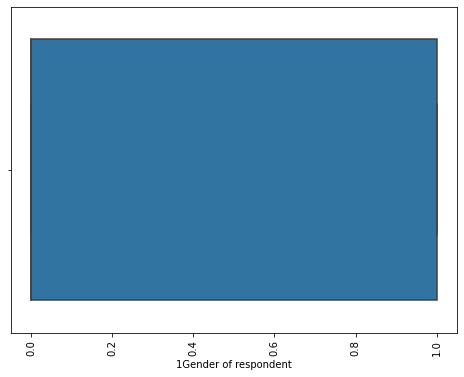



The Boxplot for attribute- "2 How old are you? " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


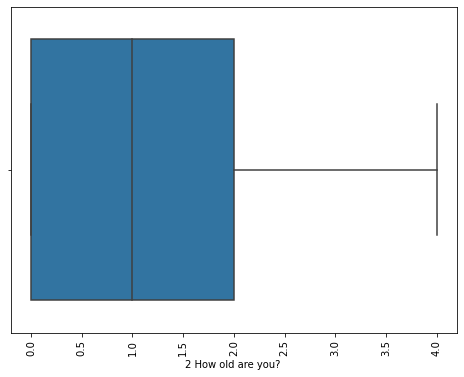



The Boxplot for attribute- "3 Which city do you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


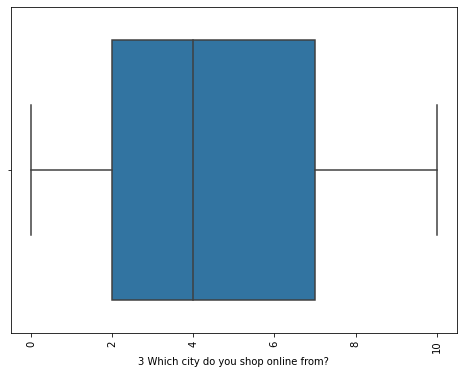



The Boxplot for attribute- "4 What is the Pin Code of where you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


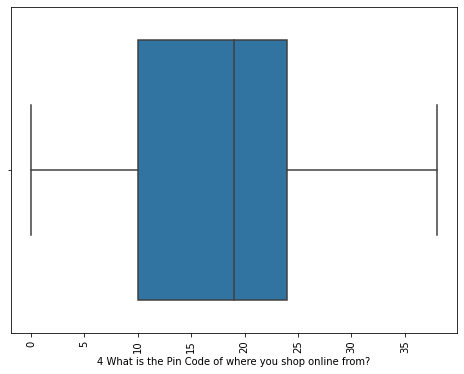



The Boxplot for attribute- "5 Since How Long You are Shopping Online ?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


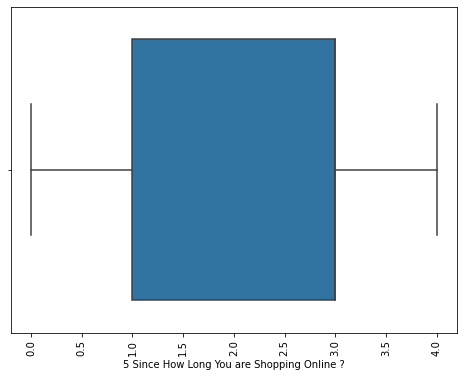



The Boxplot for attribute- "6 How many times you have made an online purchase in the past 1 year?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


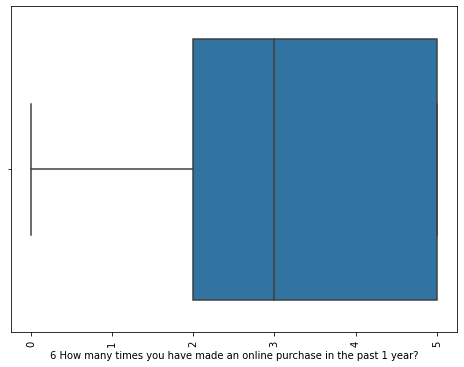



The Boxplot for attribute- "7 How do you access the internet while shopping on-line?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


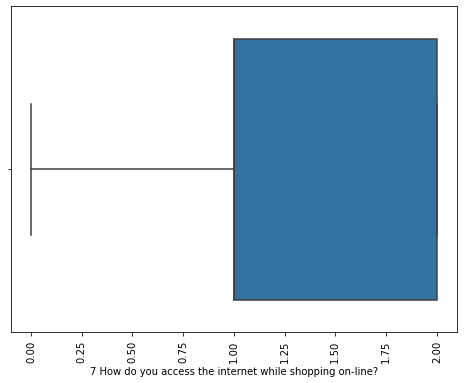



The Boxplot for attribute- "8 Which device do you use to access the online shopping?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


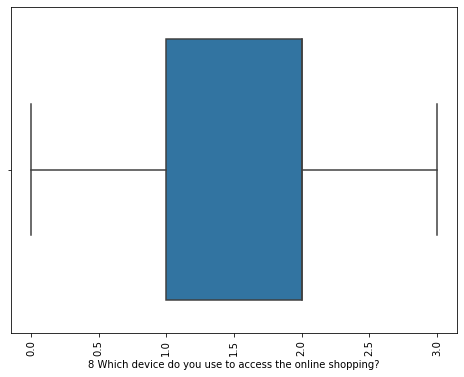



The Boxplot for attribute- "9 What is the screen size of your mobile device?						                                        " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


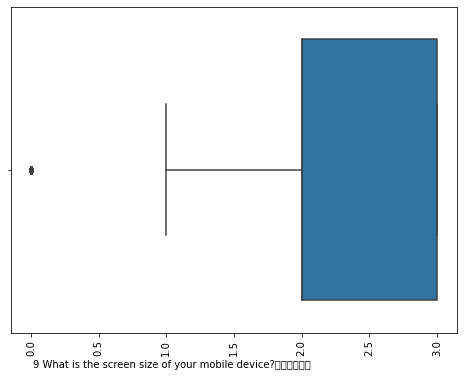



The Boxplot for attribute- "10 What is the operating system (OS) of your device?				                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


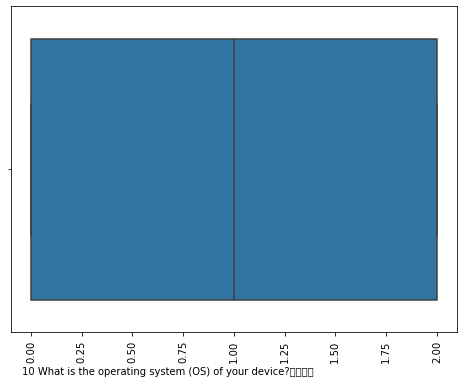



The Boxplot for attribute- "11 What browser do you run on your device to access the website?			                                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


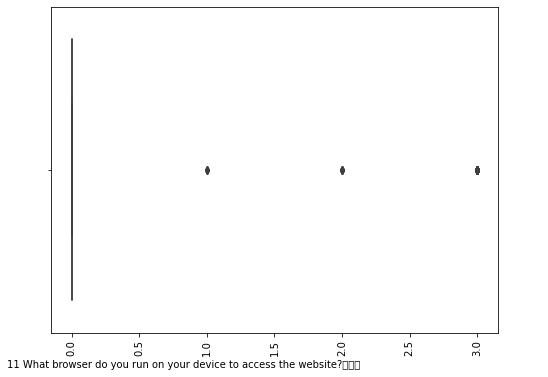



The Boxplot for attribute- "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


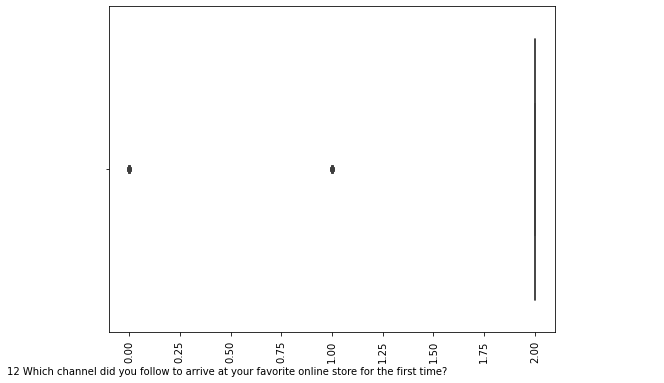



The Boxplot for attribute- "13 After first visit, how do you reach the online retail store?				                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


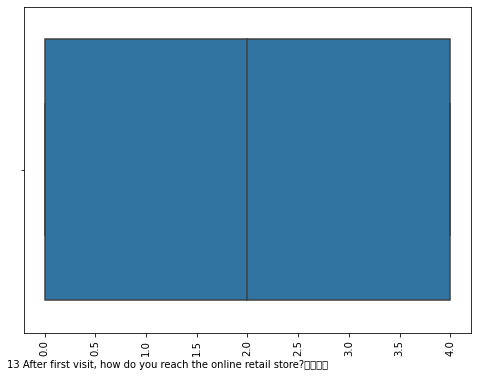



The Boxplot for attribute- "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


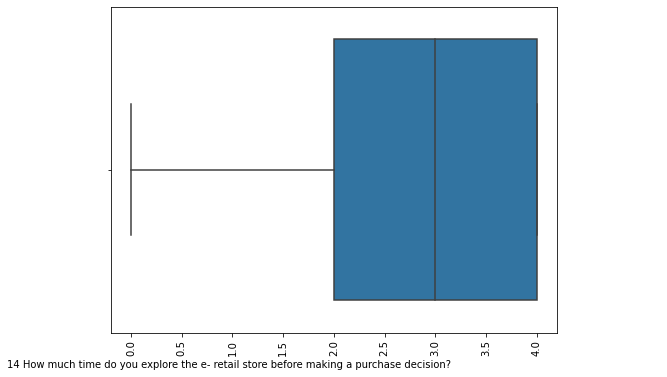



The Boxplot for attribute- "15 What is your preferred payment Option?					                                                                                                                               " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


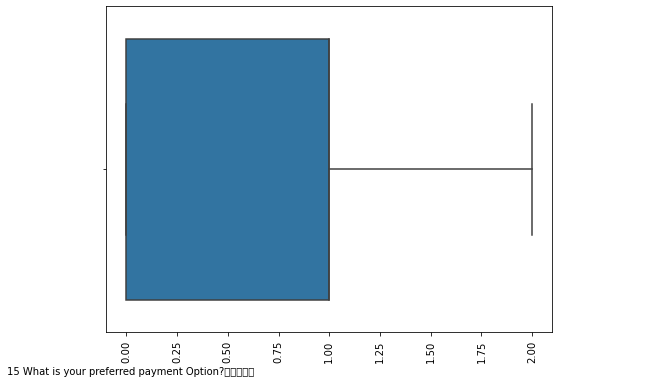



The Boxplot for attribute- "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


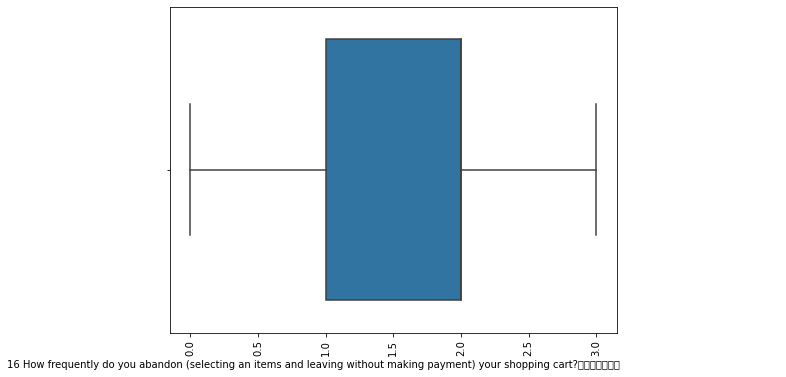



The Boxplot for attribute- "17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


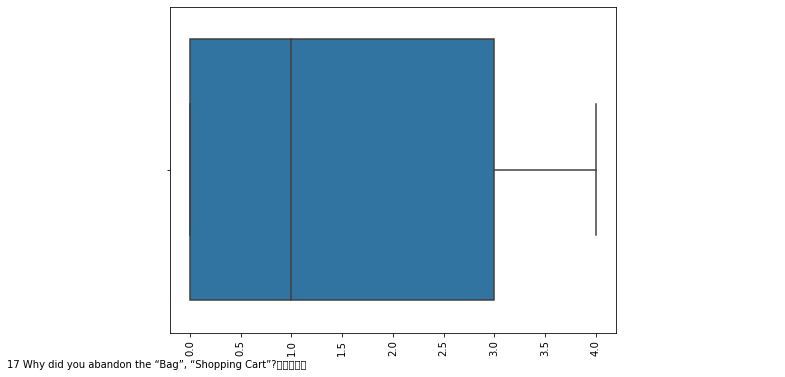



The Boxplot for attribute- "18 The content on the website must be easy to read and understand" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


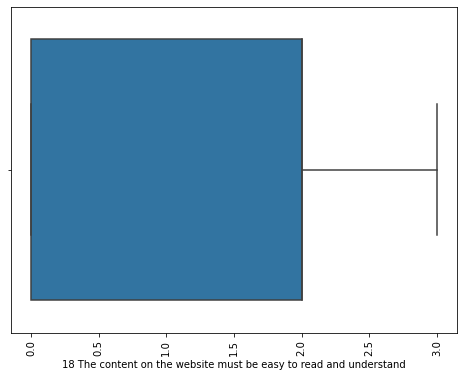



The Boxplot for attribute- "19 Information on similar product to the one highlighted  is important for product comparison" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


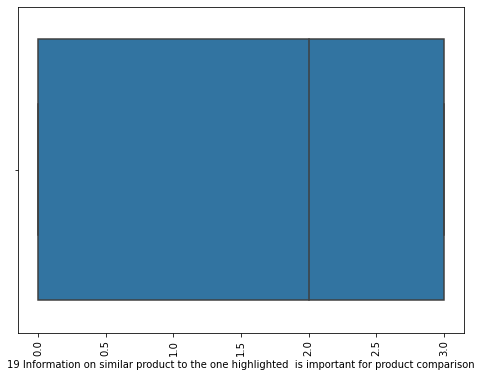



The Boxplot for attribute- "20 Complete information on listed seller and product being offered is important for purchase decision." is-

 AxesSubplot(0.125,0.125;0.775x0.755)


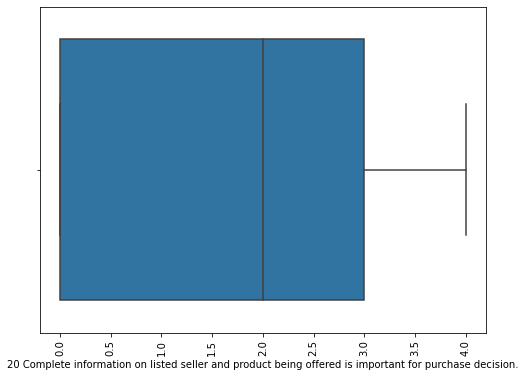



The Boxplot for attribute- "21 All relevant information on listed products must be stated clearly" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


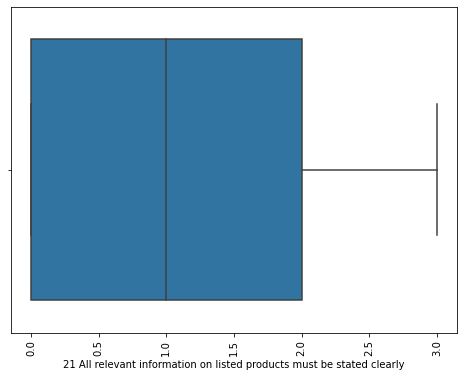



The Boxplot for attribute- "22 Ease of navigation in website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


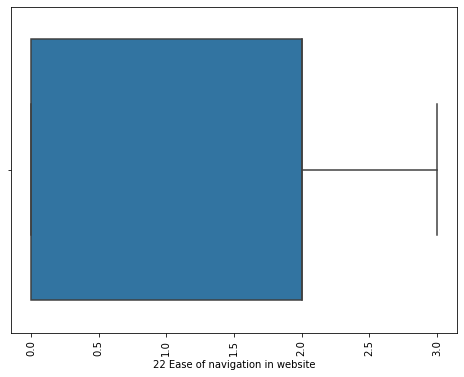



The Boxplot for attribute- "23 Loading and processing speed" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


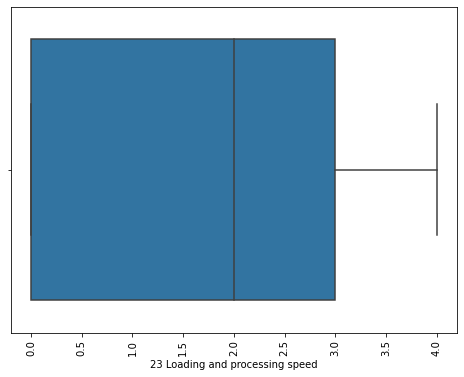



The Boxplot for attribute- "24 User friendly Interface of the website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


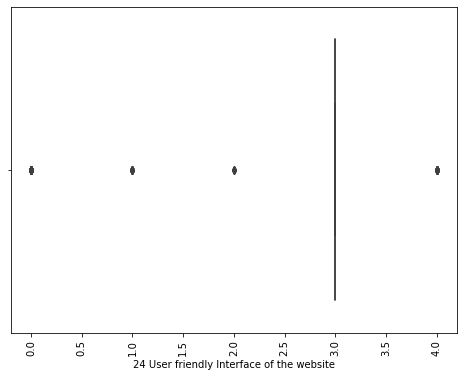



The Boxplot for attribute- "25 Convenient Payment methods" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


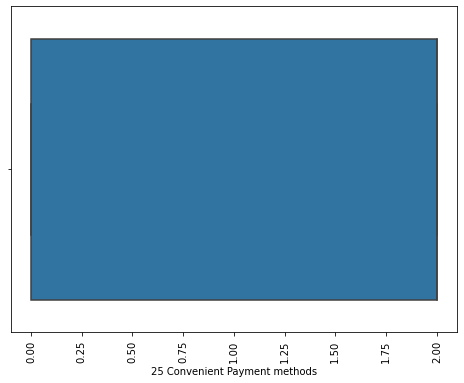



The Boxplot for attribute- "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


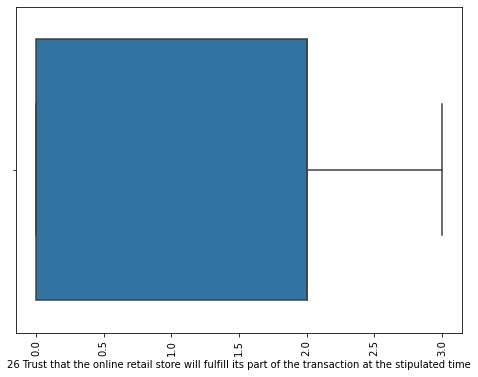



The Boxplot for attribute- "27 Empathy (readiness to assist with queries) towards the customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


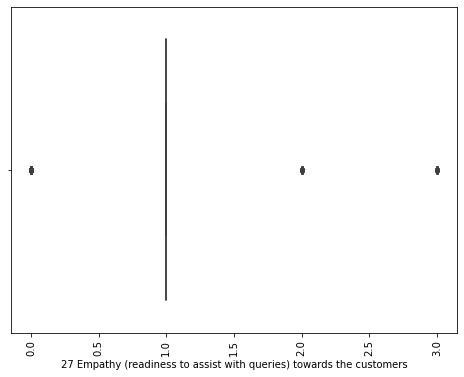



The Boxplot for attribute- "28 Being able to guarantee the privacy of the customer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


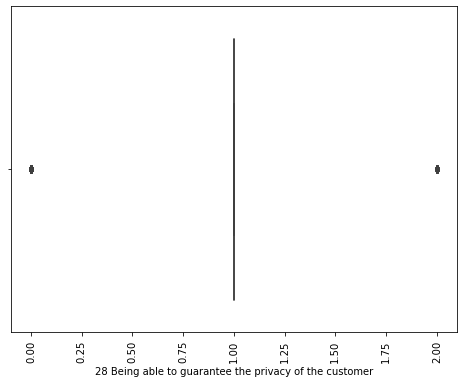



The Boxplot for attribute- "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


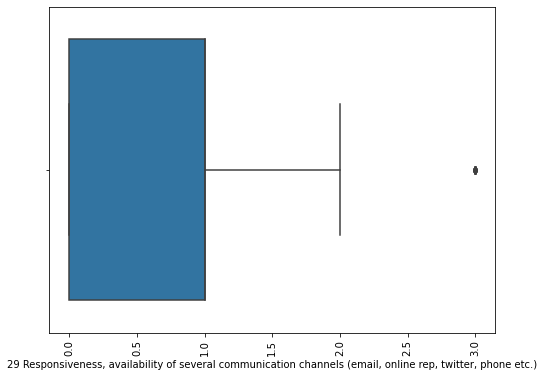



The Boxplot for attribute- "30 Online shopping gives monetary benefit and discounts" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


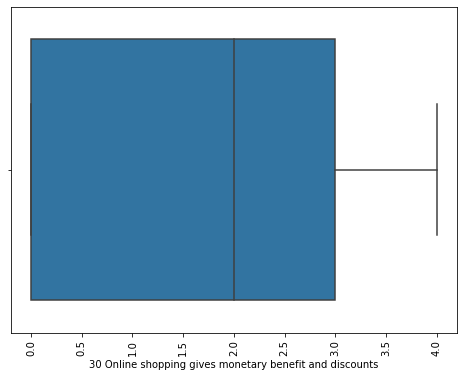



The Boxplot for attribute- "31 Enjoyment is derived from shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


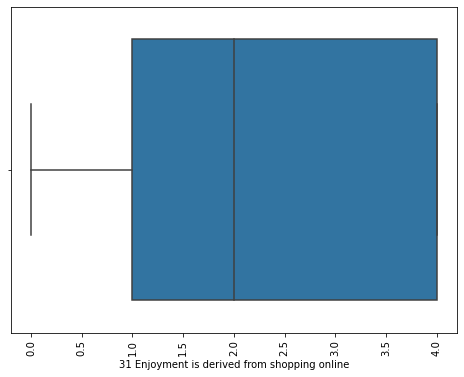



The Boxplot for attribute- "32 Shopping online is convenient and flexible" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


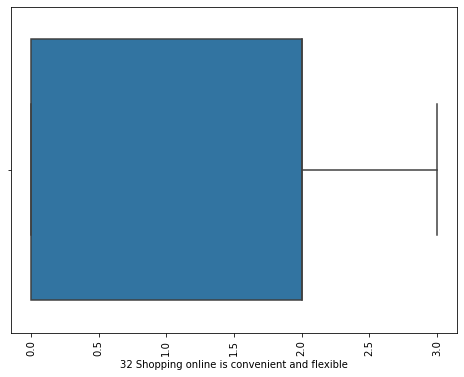



The Boxplot for attribute- "33 Return and replacement policy of the e-tailer is important for purchase decision" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


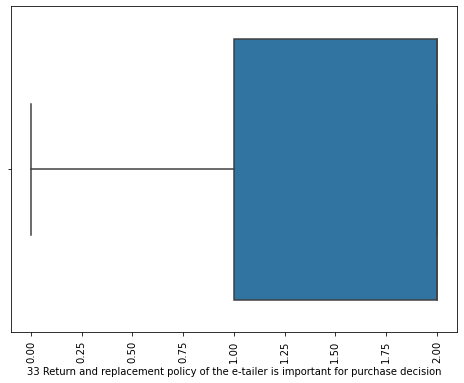



The Boxplot for attribute- "34 Gaining access to loyalty programs is a benefit of shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


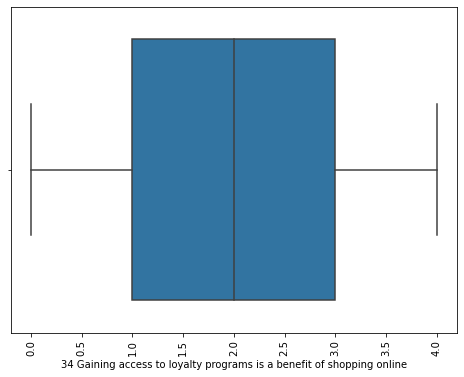



The Boxplot for attribute- "35 Displaying quality Information on the website improves satisfaction of customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


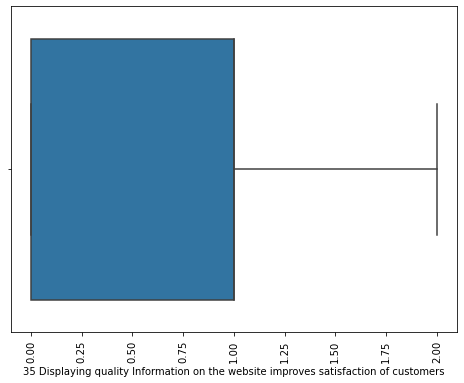



The Boxplot for attribute- "36 User derive satisfaction while shopping on a good quality website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


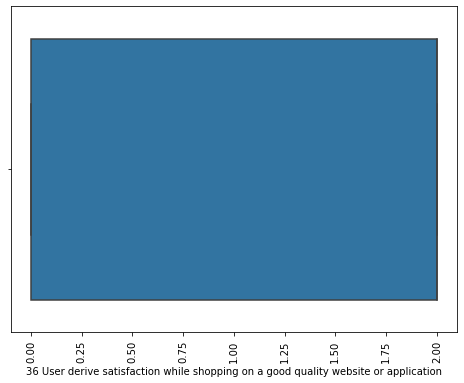



The Boxplot for attribute- "37 Net Benefit derived from shopping online can lead to users satisfaction" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


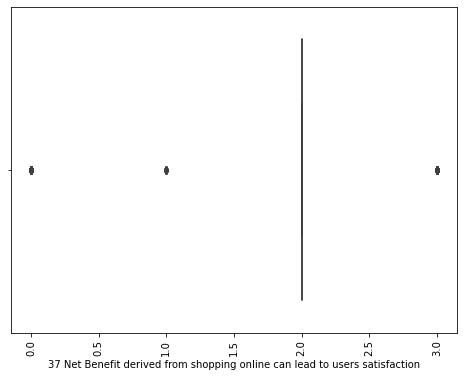



The Boxplot for attribute- "38 User satisfaction cannot exist without trust" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


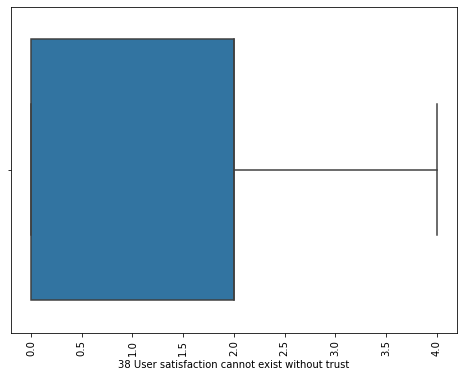



The Boxplot for attribute- "39 Offering a wide variety of listed product in several category" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


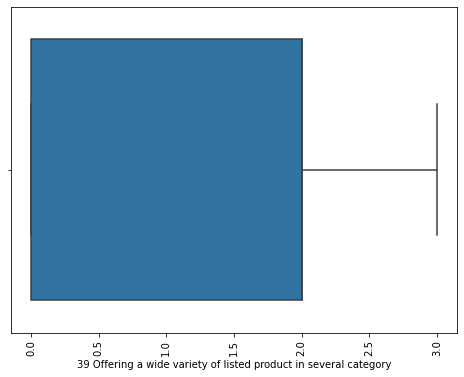



The Boxplot for attribute- "40 Provision of complete and relevant product information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


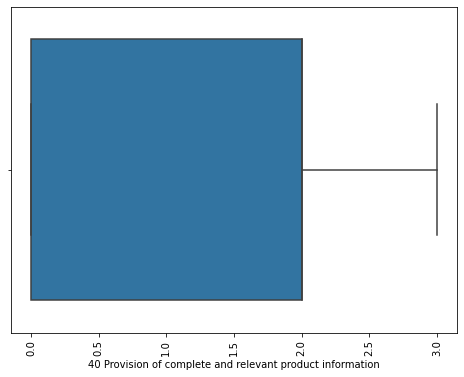



The Boxplot for attribute- "41 Monetary savings" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


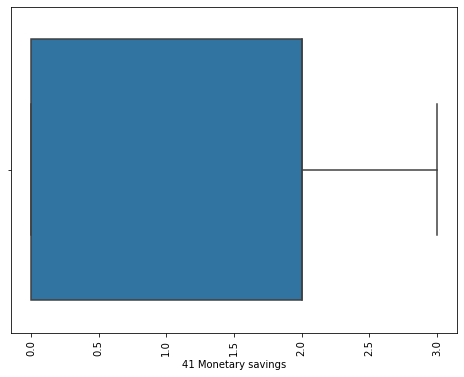



The Boxplot for attribute- "42 The Convenience of patronizing the online retailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


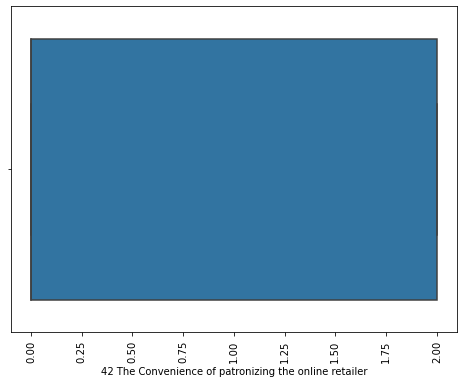



The Boxplot for attribute- "43 Shopping on the website gives you the sense of adventure" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


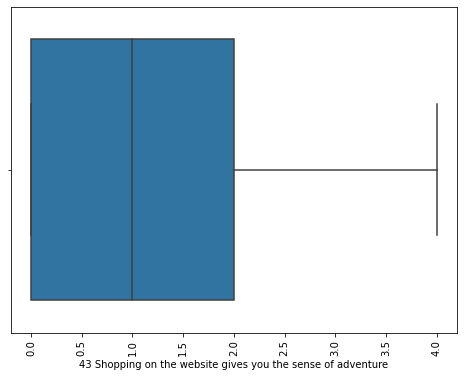



The Boxplot for attribute- "44 Shopping on your preferred e-tailer enhances your social status" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


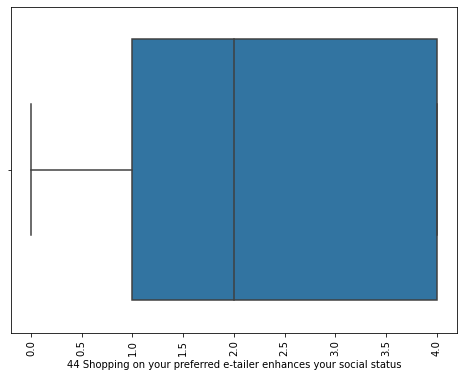



The Boxplot for attribute- "45 You feel gratification shopping on your favorite e-tailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


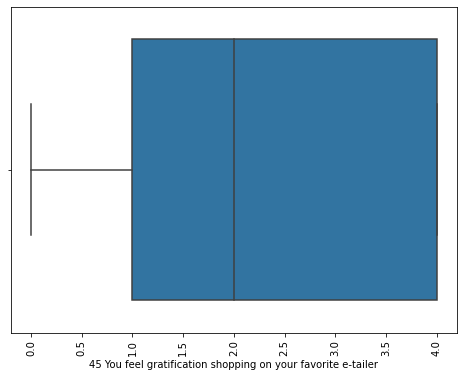



The Boxplot for attribute- "46 Shopping on the website helps you fulfill certain roles" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


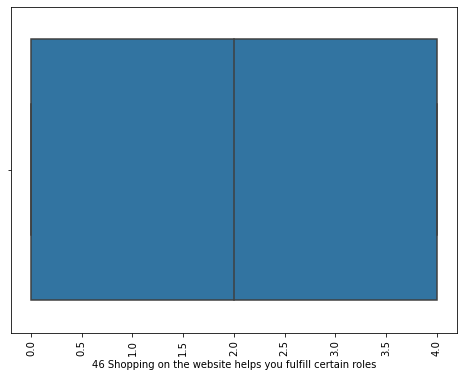



The Boxplot for attribute- "47 Getting value for money spent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


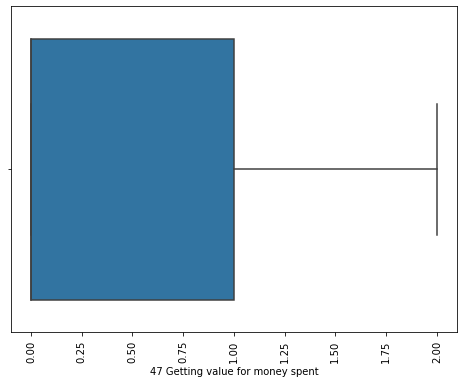



The Boxplot for attribute- "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


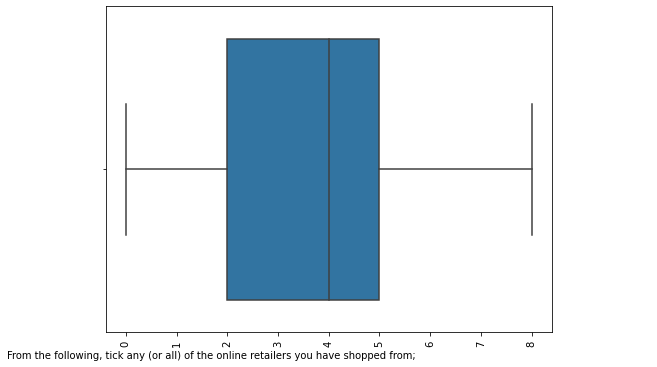



The Boxplot for attribute- "Easy to use website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


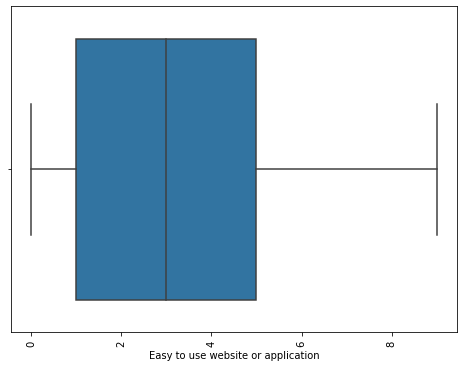



The Boxplot for attribute- "Visual appealing web-page layout" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


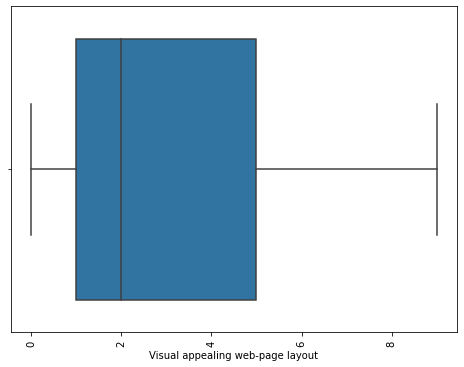



The Boxplot for attribute- "Wild variety of product on offer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


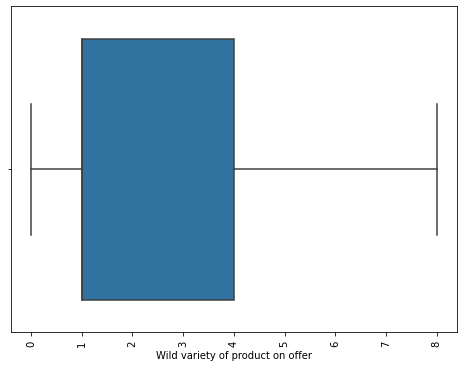



The Boxplot for attribute- "Complete, relevant description information of products" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


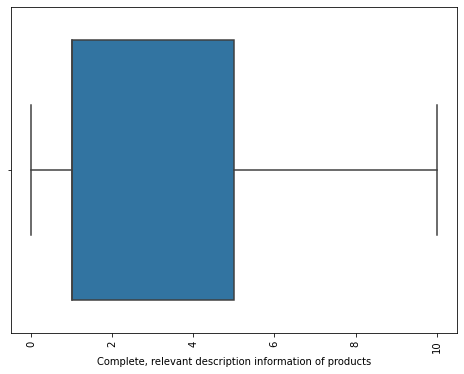



The Boxplot for attribute- "Fast loading website speed of website and application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


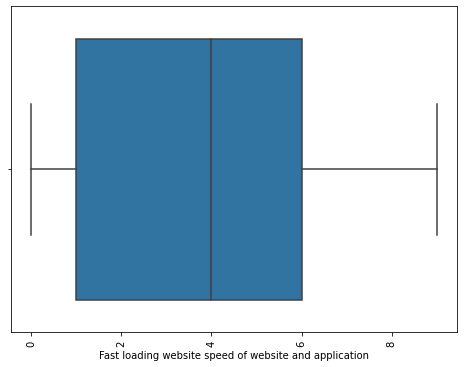



The Boxplot for attribute- "Reliability of the website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


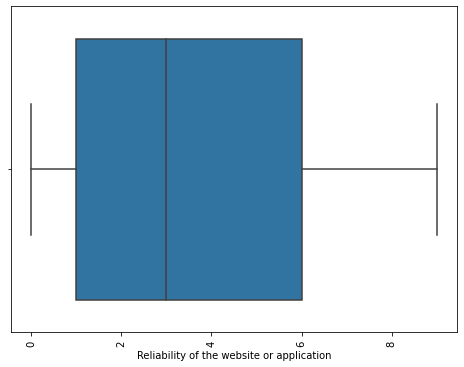



The Boxplot for attribute- "Quickness to complete purchase" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


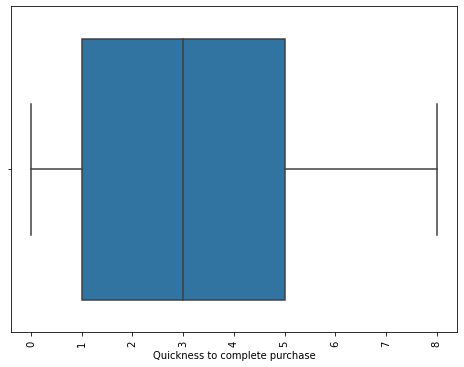



The Boxplot for attribute- "Availability of several payment options" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


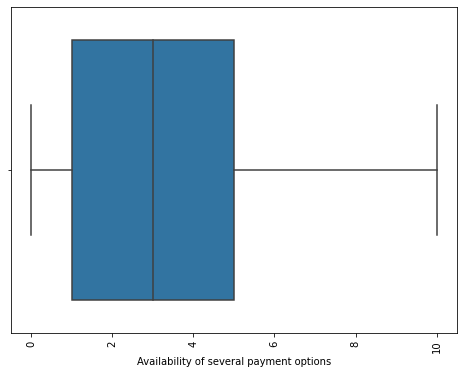



The Boxplot for attribute- "Speedy order delivery " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


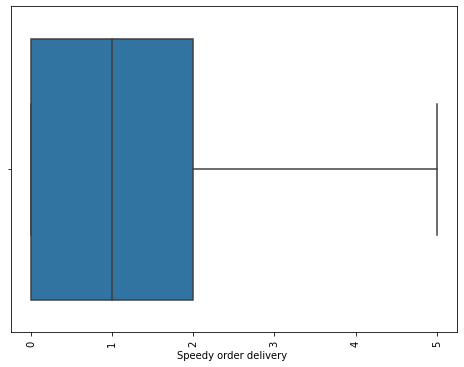



The Boxplot for attribute- "Privacy of customers’ information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


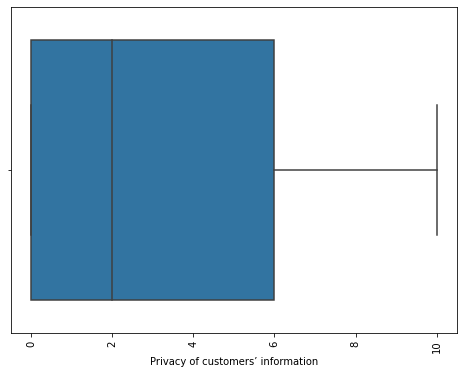



The Boxplot for attribute- "Security of customer financial information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


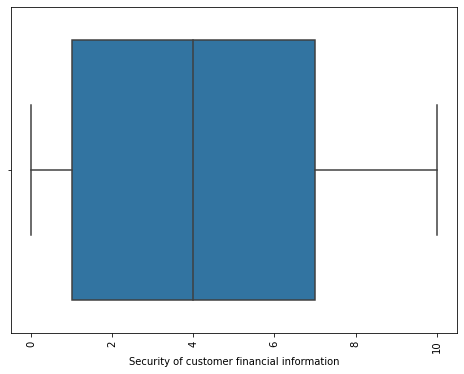



The Boxplot for attribute- "Perceived Trustworthiness" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


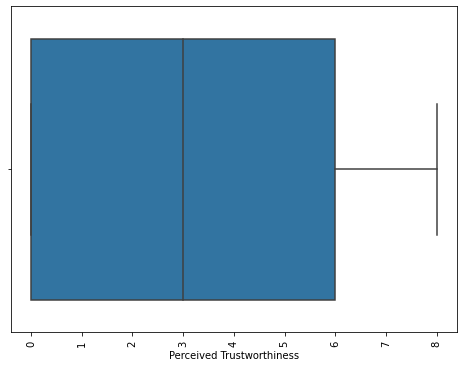



The Boxplot for attribute- "Presence of online assistance through multi-channel" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


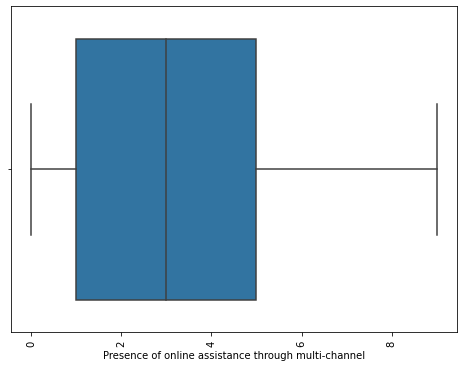



The Boxplot for attribute- "Longer time to get logged in (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


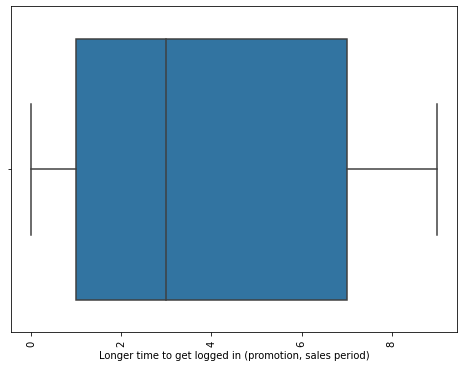



The Boxplot for attribute- "Longer time in displaying graphics and photos (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


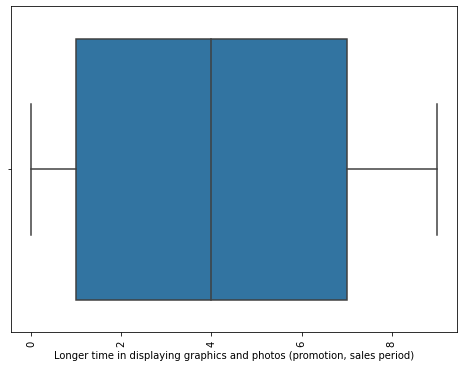



The Boxplot for attribute- "Late declaration of price (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


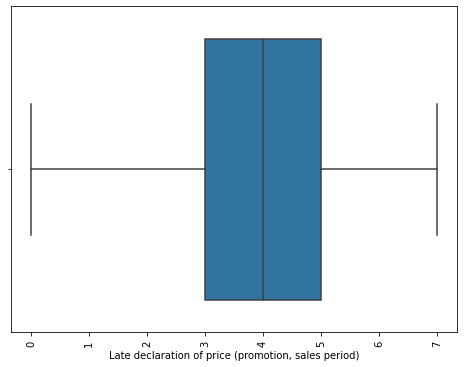



The Boxplot for attribute- "Longer page loading time (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


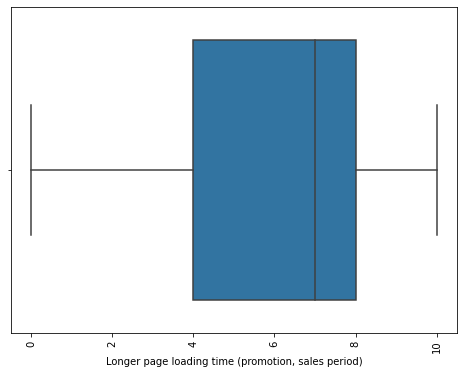



The Boxplot for attribute- "Limited mode of payment on most products (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


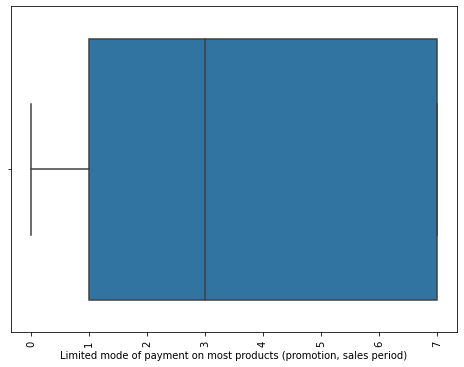



The Boxplot for attribute- "Longer delivery period" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


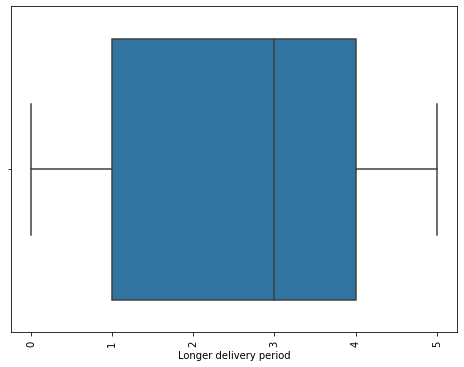



The Boxplot for attribute- "Change in website/Application design" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


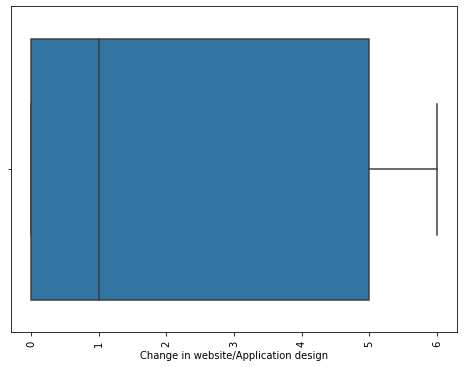



The Boxplot for attribute- "Frequent disruption when moving from one page to another" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


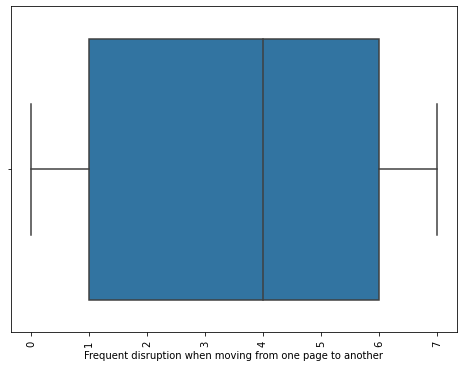



The Boxplot for attribute- "Website is as efficient as before" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


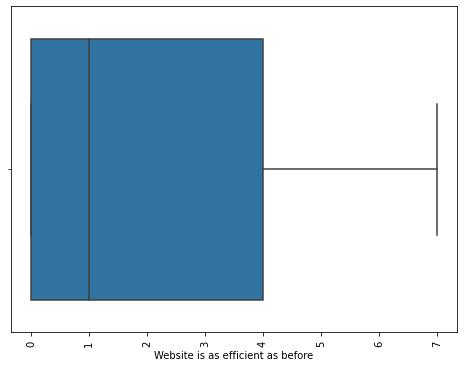



The Boxplot for attribute- "Which of the Indian online retailer would you recommend to a friend?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


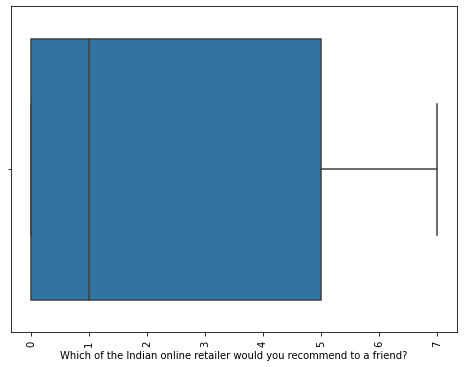

In [23]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    print(f'The Boxplot for attribute- "{i}" is-\n\n {sns.boxplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### Attributes- 'What is the screen size of your mobile device','What browser do you run on your device to access the website','Which channel did you follow to arrive at your favorite online store for the first time?','User friendly Interface of the website','Empathy (readiness to assist with queries) towards the customers','Being able to guarantee the privacy of the customer','Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)','Net Benefit derived from shopping online can lead to users satisfaction' all have outliers presence possibillity higher as compare to other attributes

### Skewness

The Distplot for attribute- "1Gender of respondent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


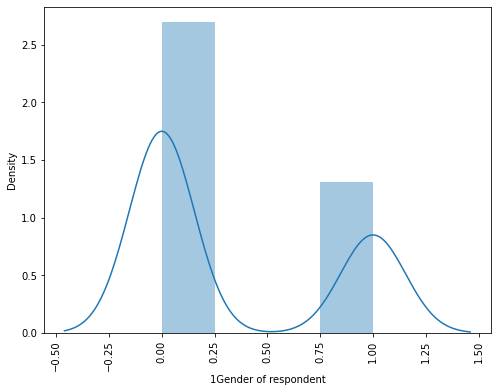



The Distplot for attribute- "2 How old are you? " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


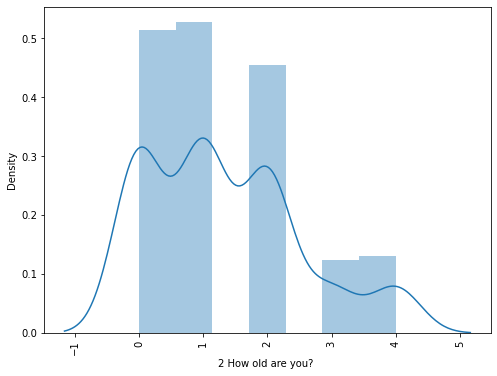



The Distplot for attribute- "3 Which city do you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


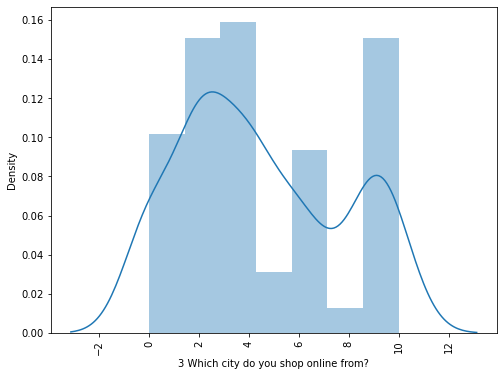



The Distplot for attribute- "4 What is the Pin Code of where you shop online from?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


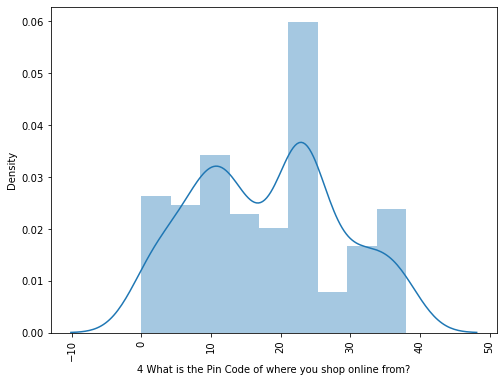



The Distplot for attribute- "5 Since How Long You are Shopping Online ?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


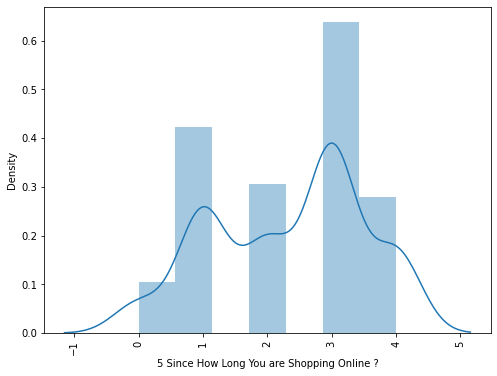



The Distplot for attribute- "6 How many times you have made an online purchase in the past 1 year?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


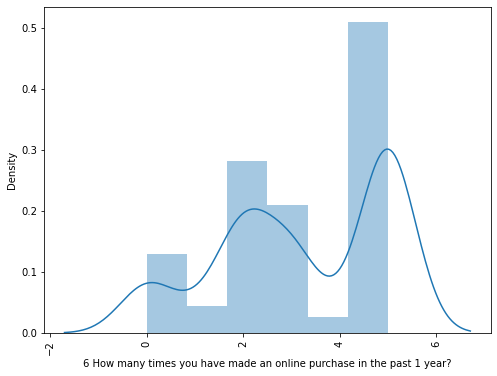



The Distplot for attribute- "7 How do you access the internet while shopping on-line?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


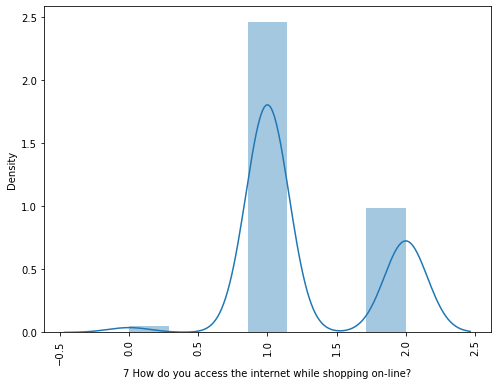



The Distplot for attribute- "8 Which device do you use to access the online shopping?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


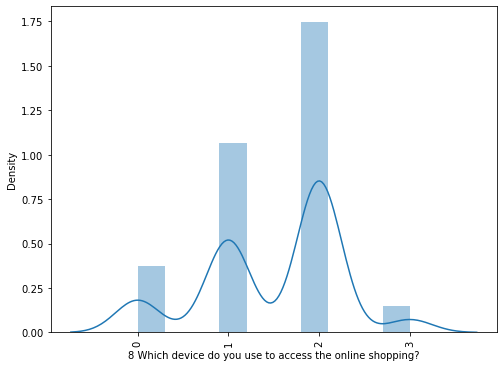



The Distplot for attribute- "9 What is the screen size of your mobile device?						                                        " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


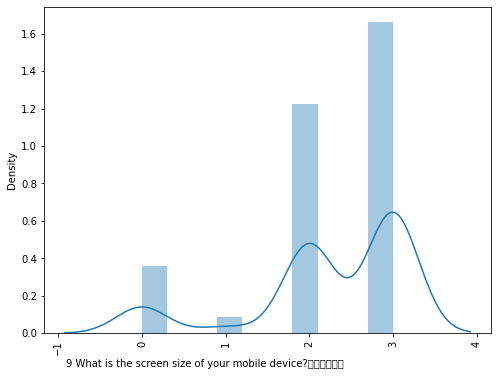



The Distplot for attribute- "10 What is the operating system (OS) of your device?				                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


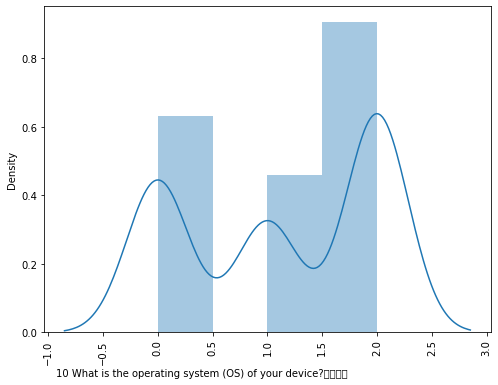



The Distplot for attribute- "11 What browser do you run on your device to access the website?			                                                          " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


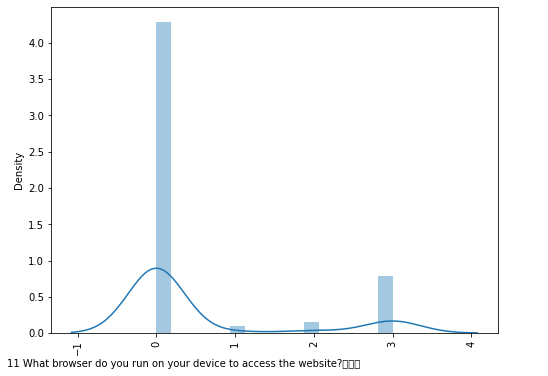



The Distplot for attribute- "12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


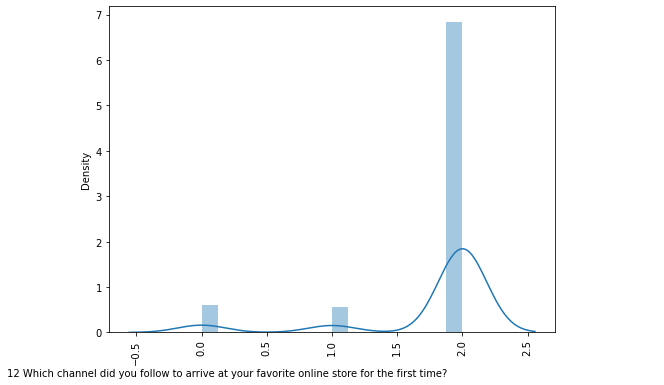



The Distplot for attribute- "13 After first visit, how do you reach the online retail store?				                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


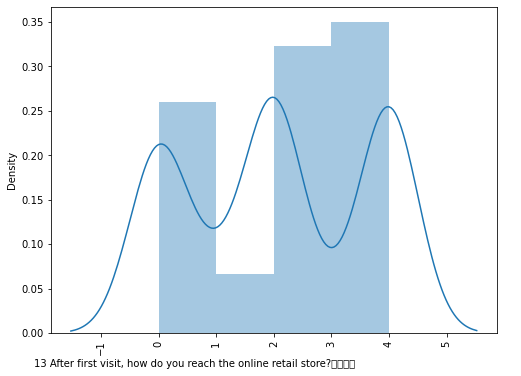



The Distplot for attribute- "14 How much time do you explore the e- retail store before making a purchase decision?                                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


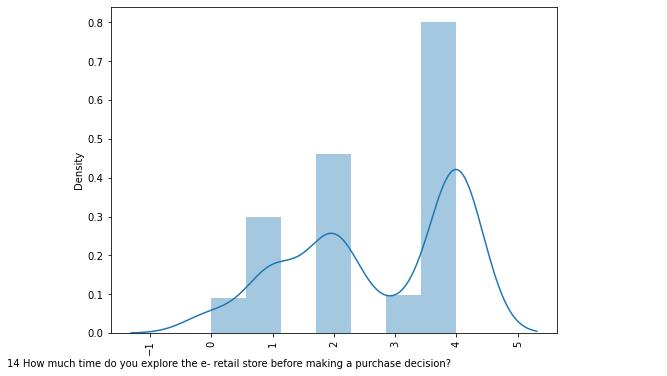



The Distplot for attribute- "15 What is your preferred payment Option?					                                                                                                                               " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


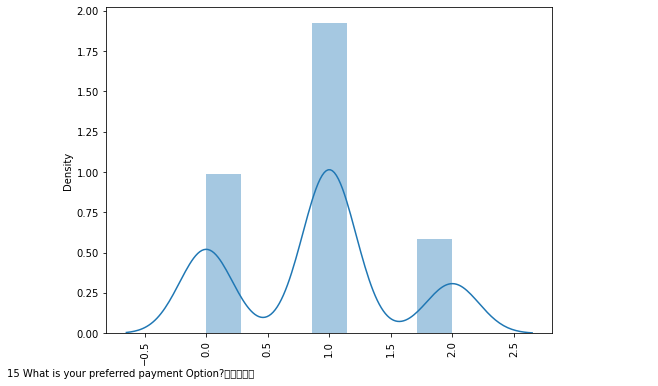



The Distplot for attribute- "16 How frequently do you abandon (selecting an items and leaving without making payment) your shopping cart?							                                                   " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


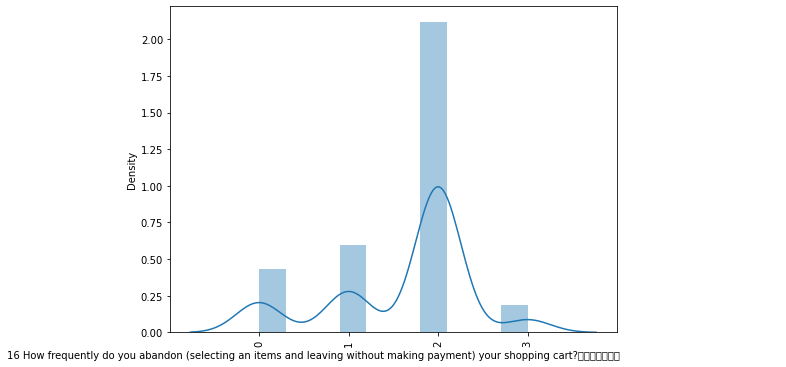



The Distplot for attribute- "17 Why did you abandon the “Bag”, “Shopping Cart”?					                                                                                                                                                       " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


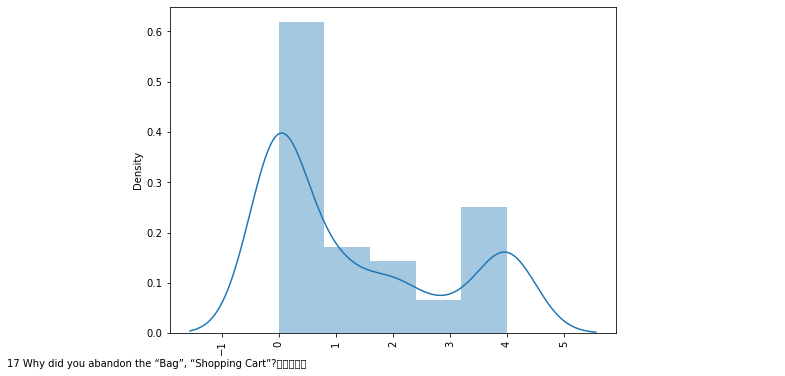



The Distplot for attribute- "18 The content on the website must be easy to read and understand" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


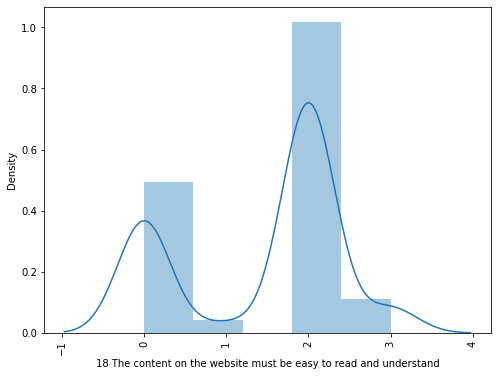



The Distplot for attribute- "19 Information on similar product to the one highlighted  is important for product comparison" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


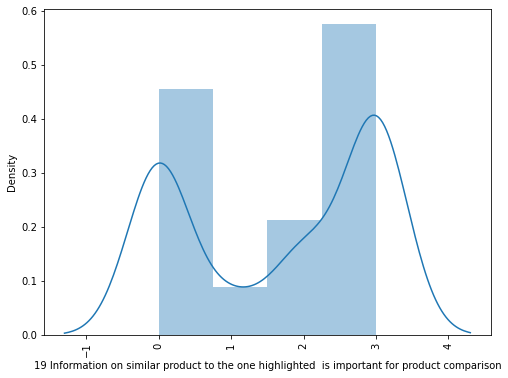



The Distplot for attribute- "20 Complete information on listed seller and product being offered is important for purchase decision." is-

 AxesSubplot(0.125,0.125;0.775x0.755)


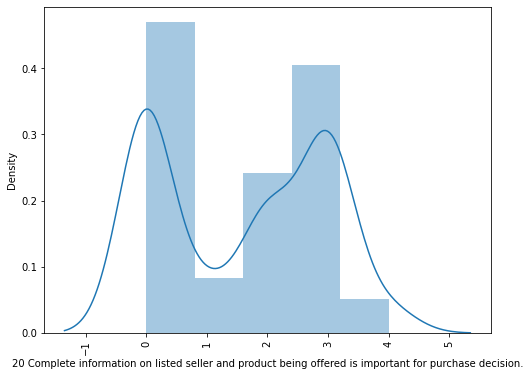



The Distplot for attribute- "21 All relevant information on listed products must be stated clearly" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


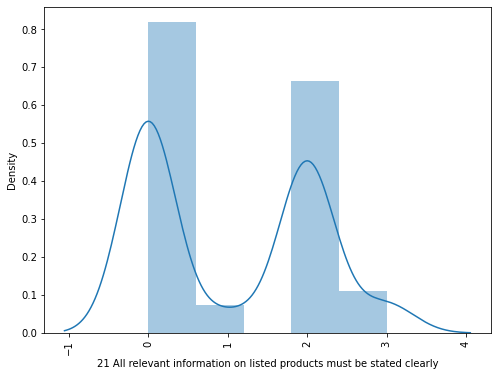



The Distplot for attribute- "22 Ease of navigation in website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


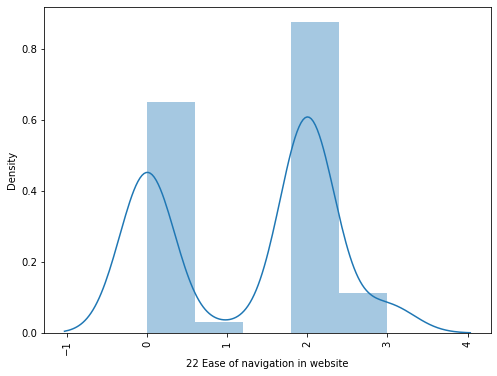



The Distplot for attribute- "23 Loading and processing speed" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


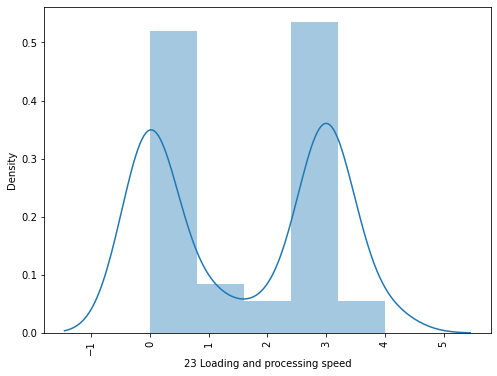



The Distplot for attribute- "24 User friendly Interface of the website" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


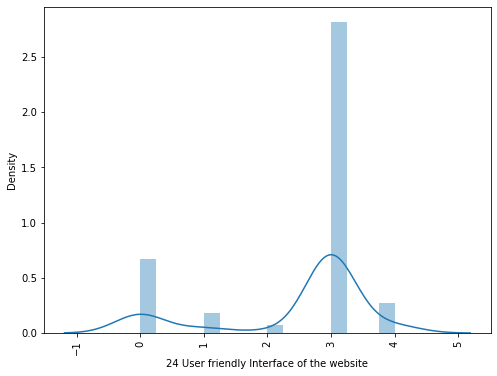



The Distplot for attribute- "25 Convenient Payment methods" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


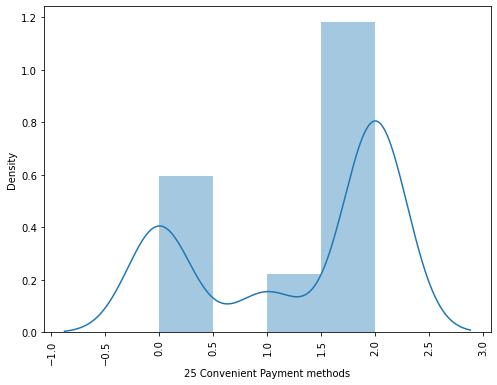



The Distplot for attribute- "26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


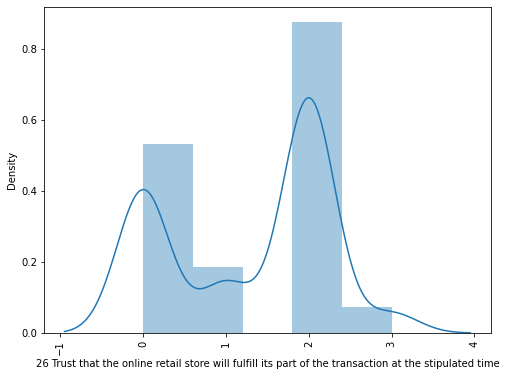



The Distplot for attribute- "27 Empathy (readiness to assist with queries) towards the customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


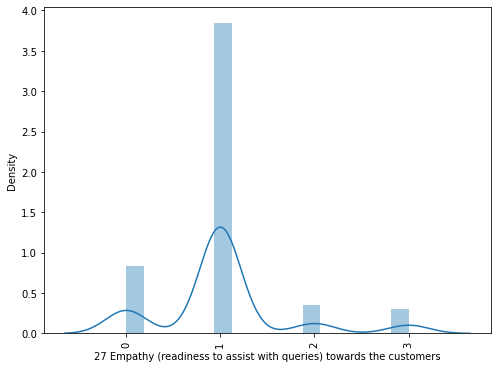



The Distplot for attribute- "28 Being able to guarantee the privacy of the customer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


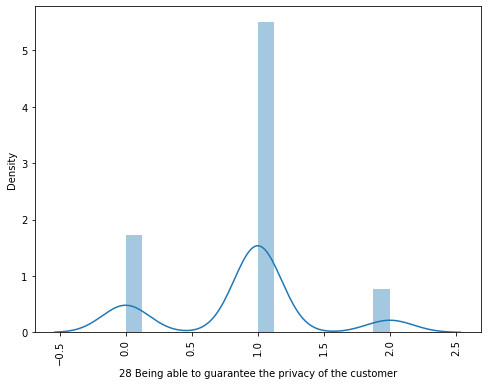



The Distplot for attribute- "29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


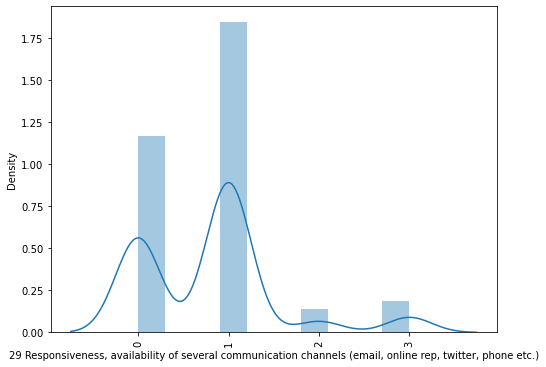



The Distplot for attribute- "30 Online shopping gives monetary benefit and discounts" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


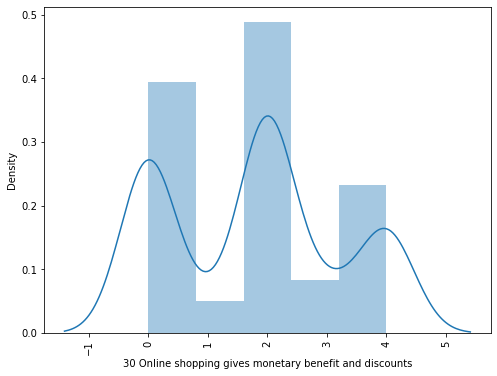



The Distplot for attribute- "31 Enjoyment is derived from shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


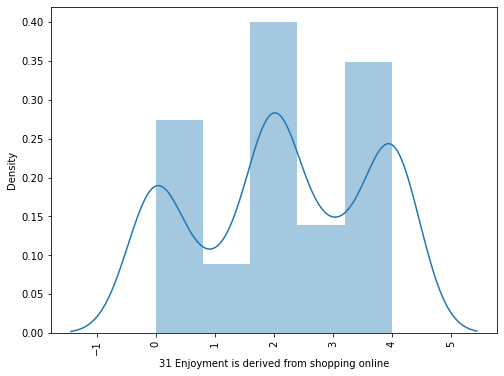



The Distplot for attribute- "32 Shopping online is convenient and flexible" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


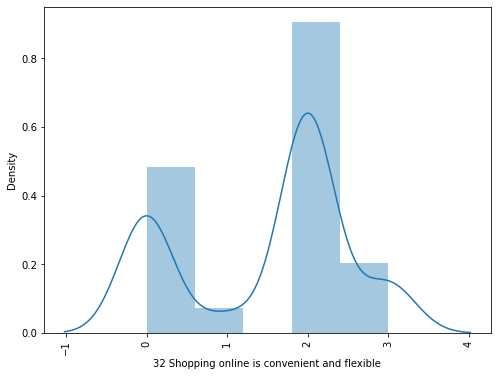



The Distplot for attribute- "33 Return and replacement policy of the e-tailer is important for purchase decision" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


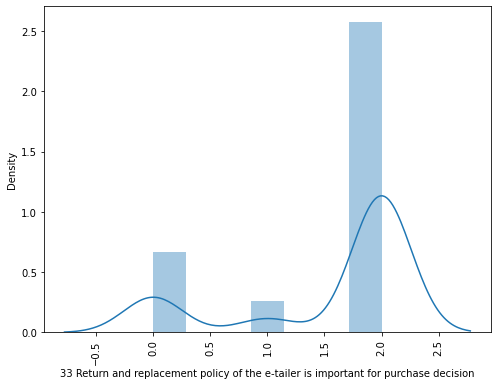



The Distplot for attribute- "34 Gaining access to loyalty programs is a benefit of shopping online" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


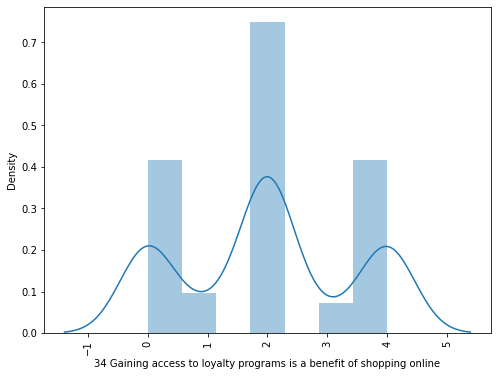



The Distplot for attribute- "35 Displaying quality Information on the website improves satisfaction of customers" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


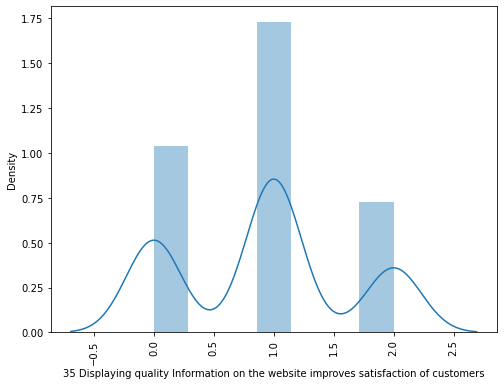



The Distplot for attribute- "36 User derive satisfaction while shopping on a good quality website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


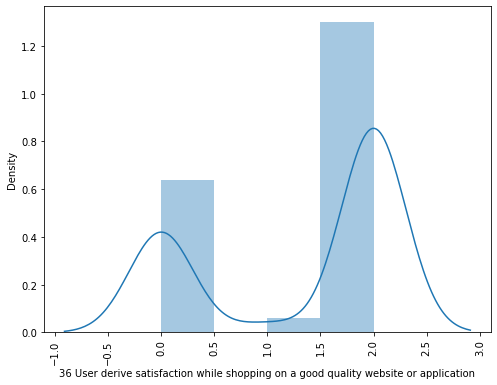



The Distplot for attribute- "37 Net Benefit derived from shopping online can lead to users satisfaction" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


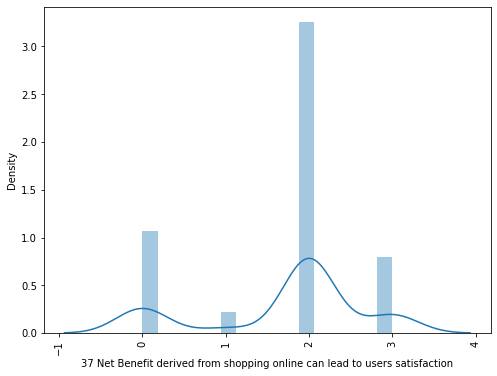



The Distplot for attribute- "38 User satisfaction cannot exist without trust" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


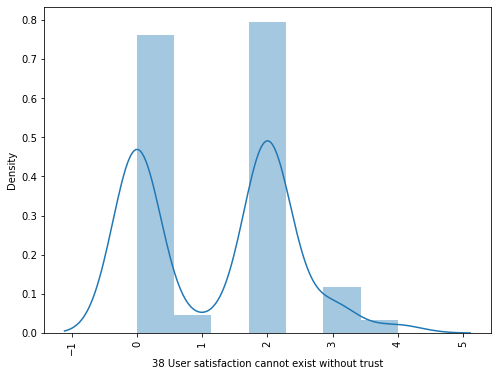



The Distplot for attribute- "39 Offering a wide variety of listed product in several category" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


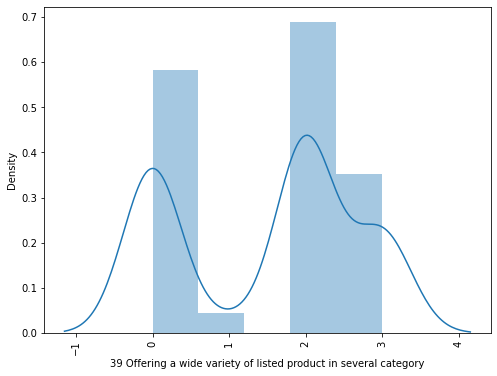



The Distplot for attribute- "40 Provision of complete and relevant product information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


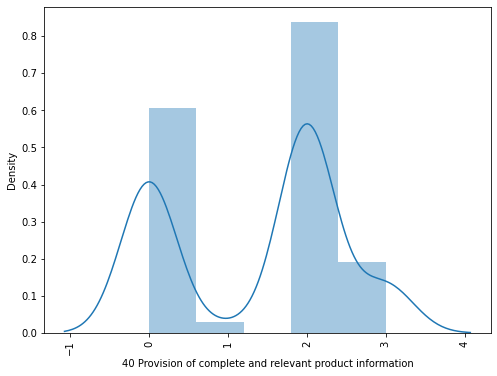



The Distplot for attribute- "41 Monetary savings" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


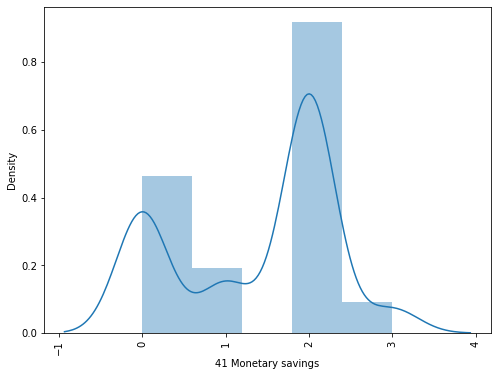



The Distplot for attribute- "42 The Convenience of patronizing the online retailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


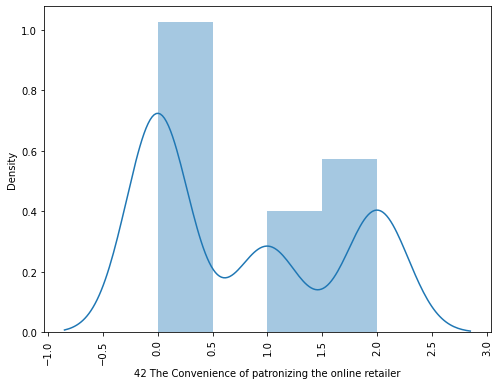



The Distplot for attribute- "43 Shopping on the website gives you the sense of adventure" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


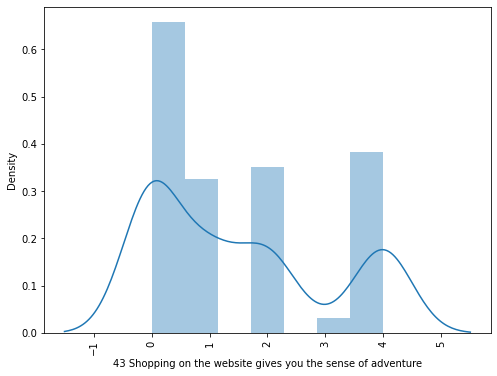



The Distplot for attribute- "44 Shopping on your preferred e-tailer enhances your social status" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


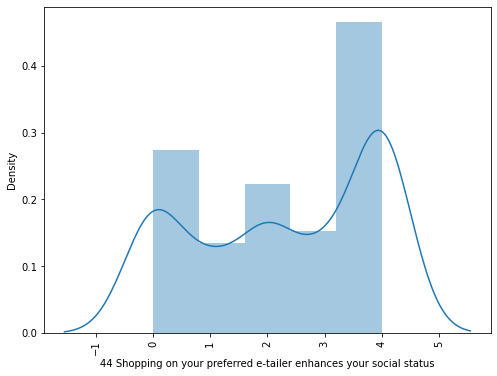



The Distplot for attribute- "45 You feel gratification shopping on your favorite e-tailer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


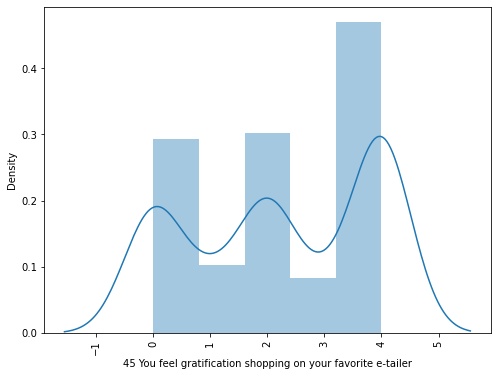



The Distplot for attribute- "46 Shopping on the website helps you fulfill certain roles" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


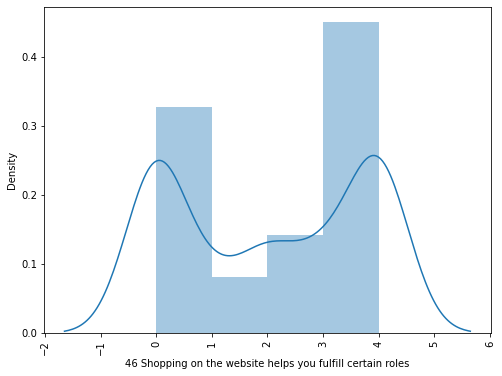



The Distplot for attribute- "47 Getting value for money spent" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


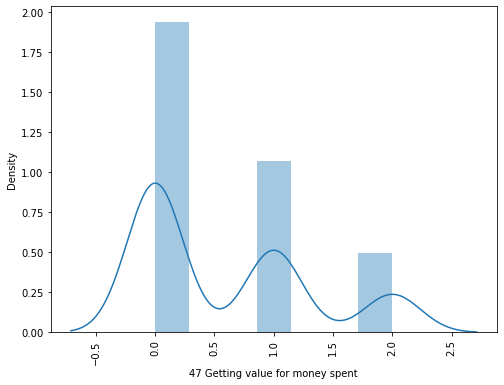



The Distplot for attribute- "From the following, tick any (or all) of the online retailers you have shopped from;                                                                           " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


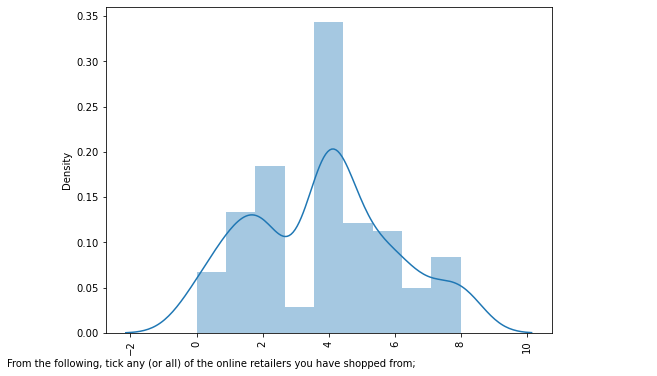



The Distplot for attribute- "Easy to use website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


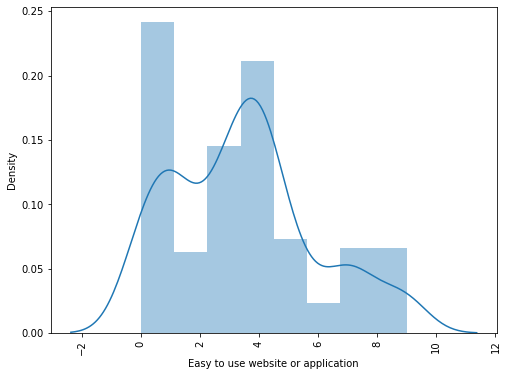



The Distplot for attribute- "Visual appealing web-page layout" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


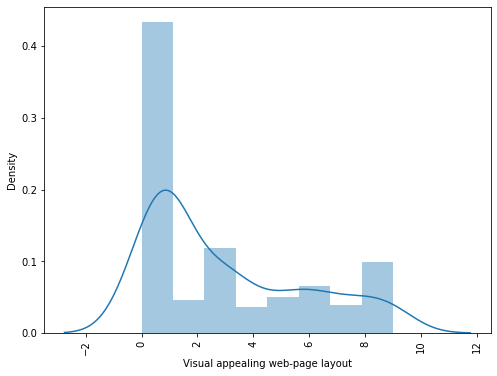



The Distplot for attribute- "Wild variety of product on offer" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


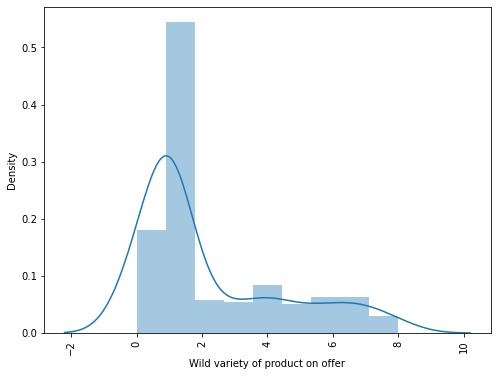



The Distplot for attribute- "Complete, relevant description information of products" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


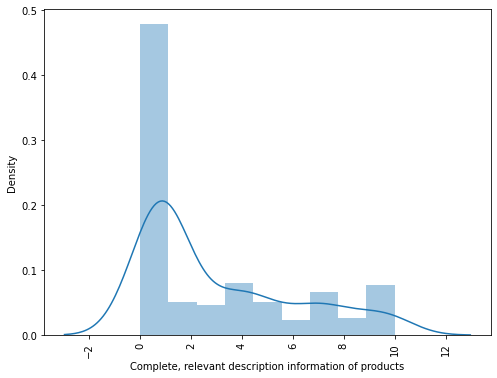



The Distplot for attribute- "Fast loading website speed of website and application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


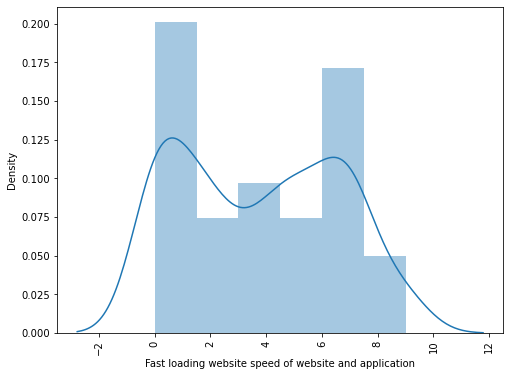



The Distplot for attribute- "Reliability of the website or application" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


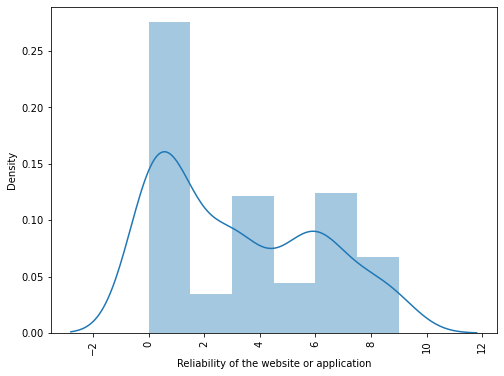



The Distplot for attribute- "Quickness to complete purchase" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


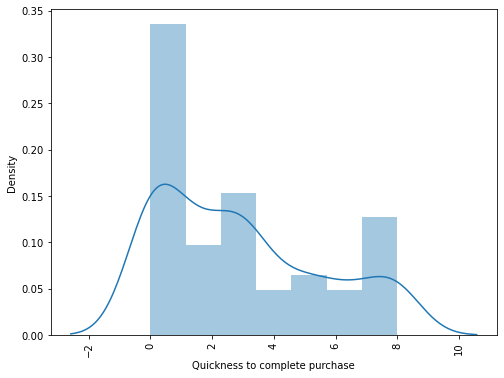



The Distplot for attribute- "Availability of several payment options" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


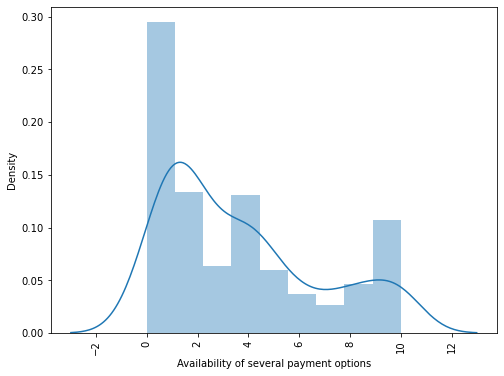



The Distplot for attribute- "Speedy order delivery " is-

 AxesSubplot(0.125,0.125;0.775x0.755)


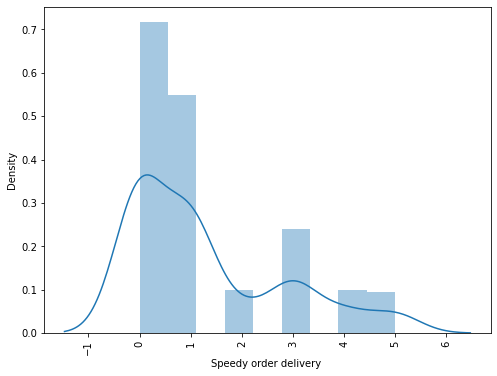



The Distplot for attribute- "Privacy of customers’ information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


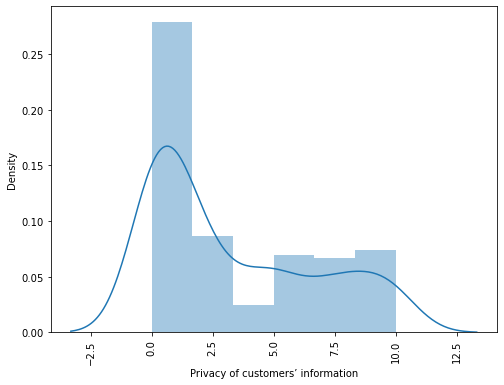



The Distplot for attribute- "Security of customer financial information" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


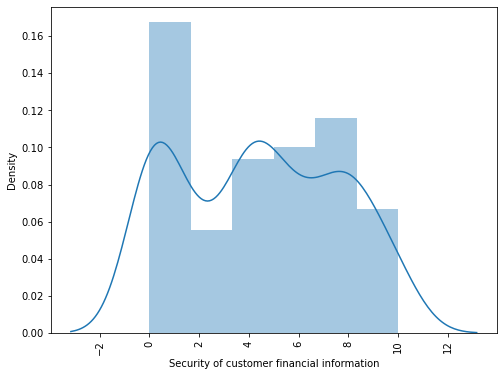



The Distplot for attribute- "Perceived Trustworthiness" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


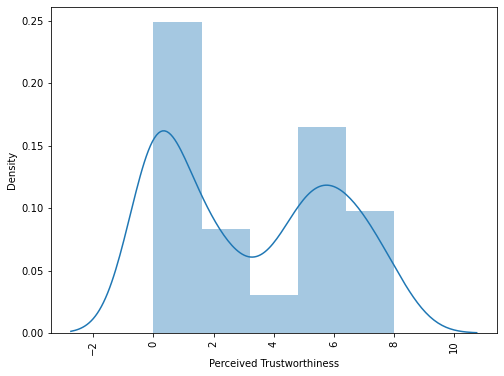



The Distplot for attribute- "Presence of online assistance through multi-channel" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


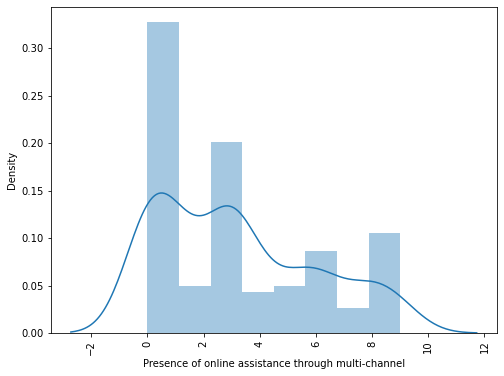



The Distplot for attribute- "Longer time to get logged in (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


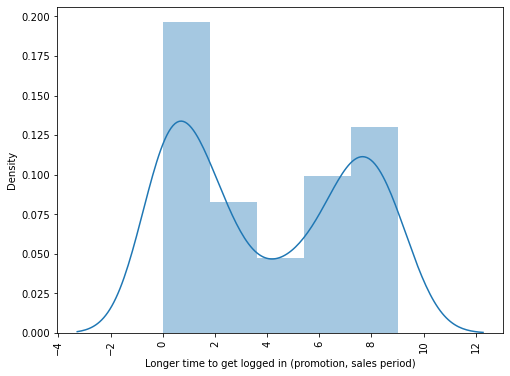



The Distplot for attribute- "Longer time in displaying graphics and photos (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


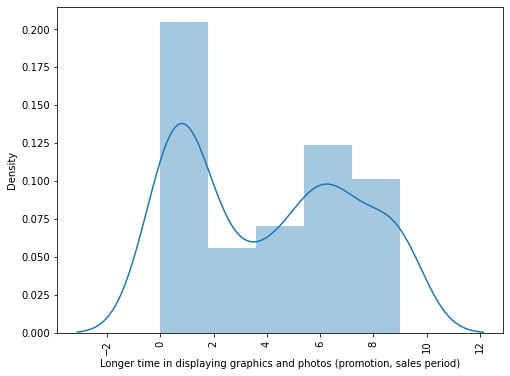



The Distplot for attribute- "Late declaration of price (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


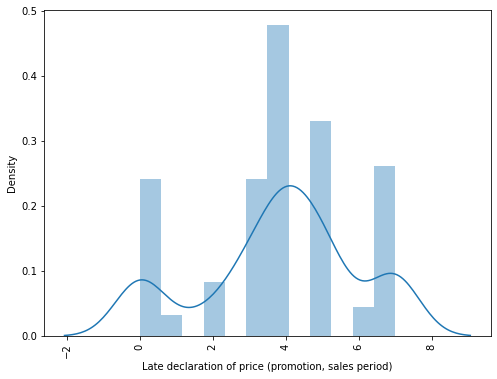



The Distplot for attribute- "Longer page loading time (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


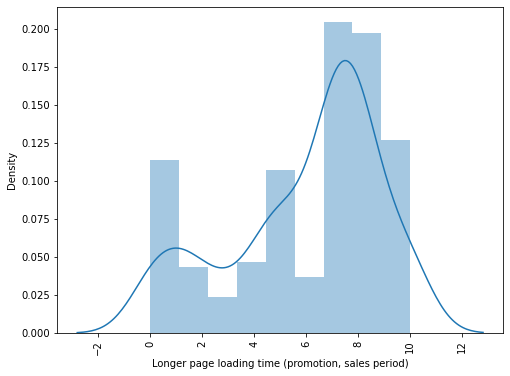



The Distplot for attribute- "Limited mode of payment on most products (promotion, sales period)" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


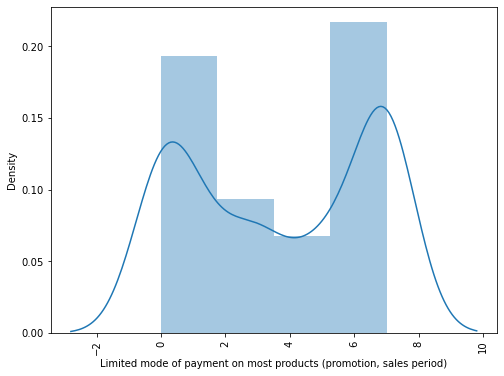



The Distplot for attribute- "Longer delivery period" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


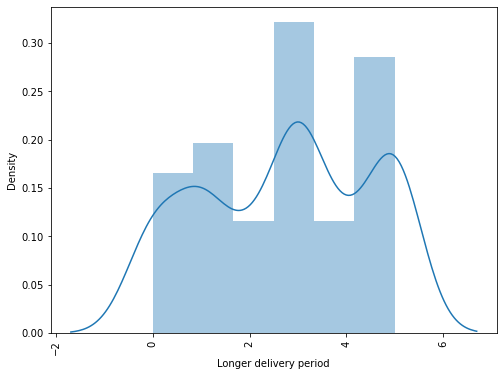



The Distplot for attribute- "Change in website/Application design" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


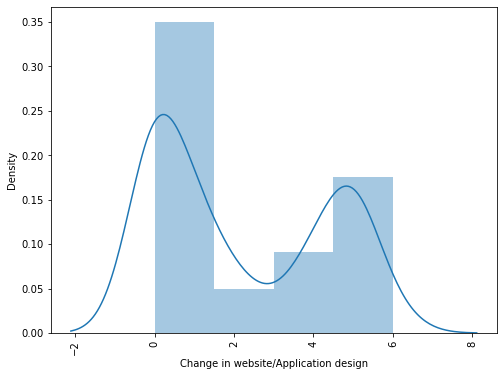



The Distplot for attribute- "Frequent disruption when moving from one page to another" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


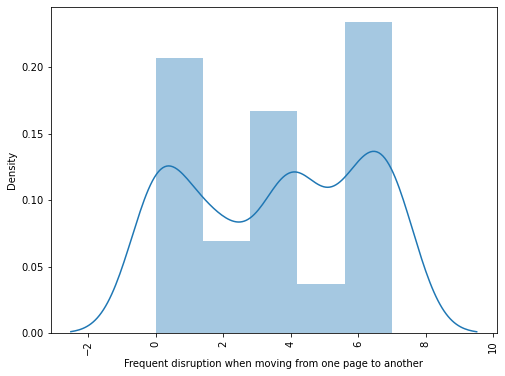



The Distplot for attribute- "Website is as efficient as before" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


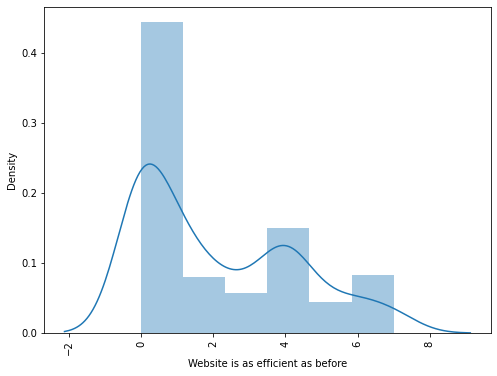



The Distplot for attribute- "Which of the Indian online retailer would you recommend to a friend?" is-

 AxesSubplot(0.125,0.125;0.775x0.755)


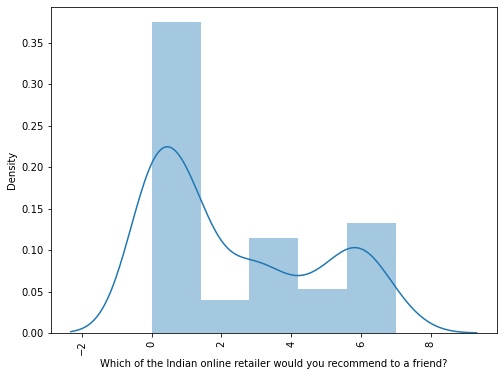

In [24]:
for i in df.columns:
    plt.figure(figsize=(8,6))
    print(f'The Distplot for attribute- "{i}" is-\n\n {sns.distplot(df[i])}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### Since all the attributes were in categorical format earlier,hence if there is skewness present,we can't remove the skewness as it doesn't support  it's property on categorical attributes.Hence will skip this part as Pincode attribute is meaningless too and we can ignore it.

### Correlation

In [24]:
df.corr()

1Gender of respondent  \
1Gender of respondent                                            1.000000   
2 How old are you?                                               0.046169   
3 Which city do you shop online from?                            0.080912   
4 What is the Pin Code of where you shop online...              -0.289628   
5 Since How Long You are Shopping Online ?                      -0.057096   
...                                                                   ...   
Longer delivery period                                           0.060838   
Change in website/Application design                            -0.164818   
Frequent disruption when moving from one page t...              -0.256638   
Website is as efficient as before                                0.055663   
Which of the Indian online retailer would you r...              -0.003372   

                                                    2 How old are you?   \
1Gender of respondent                                          0.046169   
2 How old are you?                                             1.000000   
3 Which city do you shop online from?                          0.113712   
4 What is the Pin Code of where you shop online...            -0.133946   
5 Since How Long You are Shopping Online ?                    -0.087847   
...                                                                 ...   
Longer delivery period                                        -0.156173   
Change in website/Application design                          -0.134558   
Frequent disruption when moving from one page t...            -0.018825   
Website is as efficient as before                             -0.008582   
Which of the Indian online retailer would you r...            -0.135263   

                                                    3 Which city do you shop online from?  \
1Gender of respondent                                                            0.080912   
2 How old are you?                                                               0.113712   
3 Which city do you shop online from?                                            1.000000   
4 What is the Pin Code of where you shop online...                              -0.064136   
5 Since How Long You are Shopping Online ?                                      -0.138329   
...                                                                                   ...   
Longer delivery period                                                          -0.123369   
Change in website/Application design                                             0.000427   
Frequent disruption when moving from one page t...                               0.019167   
Website is as efficient as before                                                0.007117   
Which of the Indian online retailer would you r...                              -0.142123   

                                                    4 What is the Pin Code of where you shop online from?  \
1Gender of respondent                                                                       -0.289628       
2 How old are you?                                                                          -0.133946       
3 Which city do you shop online from?                                                       -0.064136       
4 What is the Pin Code of where you shop online...                                           1.000000       
5 Since How Long You are Shopping Online ?                                                  -0.074280       
...                                                                                               ...       
Longer delivery period                                                                      -0.076998       
Change in website/Application design                                                         0.001954       
Frequent disruption when moving from one page t...                                           0.113557       
Website is as effic

#### Correlation means how the two variables are related to each others.The correlation range is usually in b/w- (-1/+1)

#### +1 means highly correlated i.e. one is increasing if other is incresing too

#### -1 mean if one is increasing then other must be decreasing

#### From the above table we cant see the clear picture of correlation as there are 71 columns are there and plotting the heatmap diagram would also not going to be a good idea hence will try to check the same individually and lets see if we can get some relation.

In [30]:
df.corr()['3 Which city do you shop online from?'].sort_values()

43 Shopping on the website gives you the sense of adventure                                            -0.323833
22 Ease of navigation in website                                                                       -0.313320
Late declaration of price (promotion, sales period)                                                    -0.293441
Limited mode of payment on most products (promotion, sales period)                                     -0.263921
Security of customer financial information                                                             -0.262662
                                                                                                          ...   
47 Getting value for money spent                                                                        0.198166
9 What is the screen size of your mobile device?\t\t\t\t\t\t                                            0.199296
35 Displaying quality Information on the website improves satisfaction of customers             

###### Attribute-'Displaying quality Information on the website improves satisfaction of customers' is positively correlated to '3 Which city do you shop online from?'     

In [34]:
df.corr()['6 How many times you have made an online purchase in the past 1 year?'].sort_values()

43 Shopping on the website gives you the sense of adventure                                                                                                      -0.318657
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                              -0.310908
4 What is the Pin Code of where you shop online from?                                                                                                            -0.304554
23 Loading and processing speed                                                                                                                                  -0.261066
36 User derive satisfaction while shopping on a good quality website or application                                                                              -0.226581
                                                                                                                                                 

##### Attribute-'6 How many times you have made an online purchase in the past 1 year?' is 31% positively correlated with 'How old are you?'

In [35]:
df.corr()['Which of the Indian online retailer would you recommend to a friend?'].sort_values()

31 Enjoyment is derived from shopping online                            -0.436613
34 Gaining access to loyalty programs is a benefit of shopping online   -0.400583
21 All relevant information on listed products must be stated clearly   -0.362879
28 Being able to guarantee the privacy of the customer                  -0.358734
18 The content on the website must be easy to read and understand       -0.349016
                                                                           ...   
Presence of online assistance through multi-channel                      0.503836
Easy to use website or application                                       0.541713
Reliability of the website or application                                0.542711
Complete, relevant description information of products                   0.680926
Which of the Indian online retailer would you recommend to a friend?     1.000000
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 71, dtype: flo

###### 'Complete, relevant description information of products' is really highly positive correlated(68%) with 'Which of the Indian online retailer would you recommend to a friend'

In [36]:
df.corr()['Security of customer financial information'].sort_values()

9 What is the screen size of your mobile device?\t\t\t\t\t\t                                                                                                     -0.458325
3 Which city do you shop online from?                                                                                                                            -0.262662
45 You feel gratification shopping on your favorite e-tailer                                                                                                     -0.254428
26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time                                                            -0.217071
12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                      -0.194688
                                                                                                                                                 

###### 'Privacy of customers information' is really highly positive correlated (71%) w.r.t. 'Security of customer financial information'

In [38]:
df.corr()['Speedy order delivery '].sort_values()

33 Return and replacement policy of the e-tailer is important for purchase decision                                                                                                  -0.456398
15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                                  -0.435534
40 Provision of complete and relevant product information                                                                                                                            -0.377883
19 Information on similar product to the one highlighted  is important for product comparison                                                                                        -0.352356
30 Online shopping gives monetary benefit and discounts                                                                                                                              -0.341495
                                             

##### Attributes- 'Website is as efficient as before' and 'Speedy order delivery ' is positive correlated.

In [40]:
df.corr()['35 Displaying quality Information on the website improves satisfaction of customers'].sort_values()

43 Shopping on the website gives you the sense of adventure                                                                                                                          -0.482650
44 Shopping on your preferred e-tailer enhances your social status                                                                                                                   -0.458386
33 Return and replacement policy of the e-tailer is important for purchase decision                                                                                                  -0.378577
Website is as efficient as before                                                                                                                                                    -0.364268
Frequent disruption when moving from one page to another                                                                                                                             -0.361043
                                             

###### Attributes- 'Fast loading website speed of website and application' and 'Displaying quality Information on the website improves satisfaction of customers ' is positive correlated (61%).

In [41]:
df.corr()['33 Return and replacement policy of the e-tailer is important for purchase decision'].sort_values()

11 What browser do you run on your device to access the website?\t\t\t                                                                                      -0.479997
Speedy order delivery                                                                                                                                       -0.456398
35 Displaying quality Information on the website improves satisfaction of customers                                                                         -0.378577
32 Shopping online is convenient and flexible                                                                                                               -0.358689
31 Enjoyment is derived from shopping online                                                                                                                -0.321832
                                                                                                                                                               ...   
29 R

###### Attributes- 'Return and replacement policy of the e-tailer is important for purchase decision' and 'Information on similar product to the one highlighted  is important for product comparison ' is positive correlated (57%).

#### Scatterplot Diagram

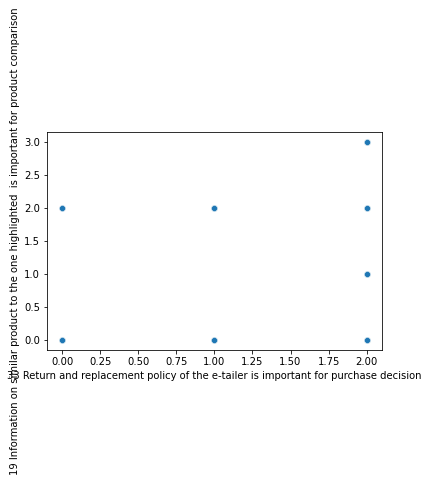

In [80]:
sns.scatterplot(df['33 Return and replacement policy of the e-tailer is important for purchase decision'],df['19 Information on similar product to the one highlighted  is important for product comparison'])
plt.show()

This is showing positive correlation

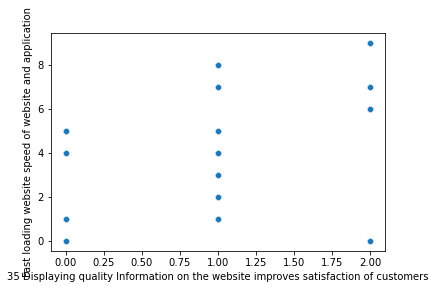

In [81]:
sns.scatterplot(df['35 Displaying quality Information on the website improves satisfaction of customers'],df['Fast loading website speed of website and application'])
plt.show()

Positive correlation exist

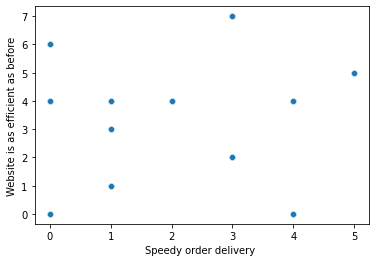

In [82]:
sns.scatterplot(df['Speedy order delivery '],df['Website is as efficient as before'])
plt.show()

Positive correlation Exist

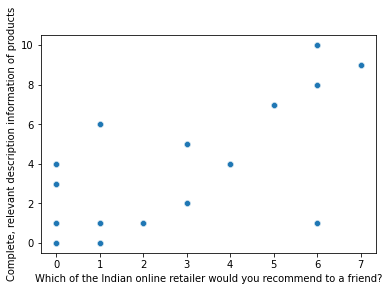

In [85]:
sns.scatterplot(df['Which of the Indian online retailer would you recommend to a friend?'],df['Complete, relevant description information of products'])
plt.show()

This is showing a strong  positive correlation having less outliers

### Removing Outliers

In [14]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  4,  16,  20,  30,  35,  49,  79,  88,  95, 112, 116, 133, 142,
        159, 162, 196, 207, 234, 237, 262], dtype=int64),
 array([11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11], dtype=int64))

This shows that 11th columns are having all the outliers

In [17]:
z.iloc[262]

1Gender of respondent                                                   0.697272
2 How old are you?                                                      1.126343
3 Which city do you shop online from?                                   1.412561
4 What is the Pin Code of where you shop online from?                   1.921275
5 Since How Long You are Shopping Online ?                              1.127113
                                                                          ...   
Longer delivery period                                                  0.153218
Change in website/Application design                                    1.019284
Frequent disruption when moving from one page to another                1.336753
Website is as efficient as before                                       1.784121
Which of the Indian online retailer would you recommend to a friend?    0.255334
Name: 262, Length: 71, dtype: float64

In [15]:
#4th row and 11th columns has outlier
z.iloc[4][11]

3.148183335724711

In [16]:
z.iloc[16,11]

3.148183335724711

In [18]:
#New dataframe
df1=df[(z<3).all(axis=1)]
df1

1Gender of respondent  2 How old are you?   \
0                        1                    1   
1                        0                    0   
2                        0                    0   
3                        1                    0   
5                        0                    1   
..                     ...                  ...   
264                      0                    0   
265                      0                    1   
266                      0                    2   
267                      0                    4   
268                      0                    2   

     3 Which city do you shop online from?  \
0                                        2   
1                                        2   
2                                        4   
3                                        6   
5                                        9   
..                                     ...   
264                                     10   
265                                      3   
266                                      0   
267                                     10   
268                                      3   

     4 What is the Pin Code of where you shop online from?  \
0                                                    1       
1                                                    5       
2                                                   23       
3                                                   11       
5                                                   23       
..                                                 ...       
264                                                 13       
265                                                 17       
266                                                 35       
267                                                 14       
268                                                 18       

     5 Since How Long You are Shopping Online ?  \
0                                             3   
1                                             3   
2                                             2   
3                                             2   
5                                             3   
..                                          ...   
264                                           0   
265                                           0   
266                                           1   
267                                           1   
268                                           1   

     6 How many times you have made an online purchase in the past 1 year?  \
0                                                    2                       
1                                                    3                       
2                                                    3                       
3                                                    5                       
5                                                    3                       
..                                                 ...                       
264                                                  5                       
265                                                  2                       
266                                                  5                       
267                                                  5                       
268                                                  2                       

     7 How do you access the internet while shopping on-line?  \
0                                                    0          
1                                                    2          
2                                                    1          
3                                                    1          
5                                                    2          
..                                                 ...          
264                                                  1          
265                     

In [19]:
print(df.shape)
print(df1.shape)

(269, 71)
(249, 71)


In [20]:
percentage_loss=(269-249)*100/269
percentage_loss

7.434944237918216

We have lost more than 7% of the data and that's still less to our threshold value of 10%.

### Using StandarScaler

######  If we want to proceed here for the model training and testing will try to normalize the dataset,so that we can get mean=0 and std.=1 but in this case I'm not doing the same

#                                                 Conclusion

1. Out of 269 respondents Female are 181 which is more than twice as that of Male respondents.

2. Most of the respondents are having age group b/w 21-50.

3. Delhi,Greater Noida and Noida are top three cities when it comes to shopping online while Bulandshahr,Moradabad and Merrut      are in bottom three for the same.

4. 98 respondents are shopping from last 4 years while the number is less and which is 16, b/w the years 1-2.

5. 114 respondents have made less than 10 times online purchase in the past 1 year.

6. 189 Respondents are using mobile internet while shopping on-line unlike Wi-Fi and others.

7. 141 Respondents are using Smartphones while accessing to online shopping.

8. 230 Respondents inspired to do shopping beacuse of Search-Engine advertisements.

9. 123 respondents takes more than 15 minutes while making their first purchase.

10. 148 Respondents uses Credit/Debit cards as the preferred payment Option while making payment.

11. 133 Respondents thinks they are getting better alternative offer that's why they abandon the Bags and Shooping Carts           option.

12. The content on the website must be easy to read and understand that are said by 164 respondents.

13. 116 Respondents says Information on similar product to the one highlighted is must for product comparison.

14. 101 Respondents thinks Complete information on listed seller and product being offered is important for purchase decision.

15. 132 Respondents thinks All relevant information on listed products should be stated clearly.

16. 141 Respondents thinks Ease of navigation in website is really must.

17. 189 Respondents thinks User friendly Interface of the website is must.

18. 194 Respondents thinks Empathy (readiness to assist with queries) towards the customers is must.

19. 185 Respondents thinks Being able to guarantee the privacy of the customer is must.

20. 149 Respondents think Responsiveness, availability of several communication channels (email, online rep, twitter, phone         etc.) is must.

21. 105 Respondents thinks Online shopping monetary benefit and discounts is must.

22. 146 Respondents think Shopping online must be convenient and flexible.

23. 198 Respondents think Return and replacement policy of the e-tailer is must for purchase decision

24. 122 Respondents think User satisfaction cannot exist without trust

25. 111 Respondents thinks Offering a wide variety of listed product in several category is must.

26. 135 Respondents thinks Provision of complete and relevant product information is must.

27. 149 Respondents think Getting value for money spent is must.

##### According to me above 27 points are important to retain/add new set of customers,customer satisfacton.



1. 82 Respondents have shopped from  e-commerce websites like- Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com

2. 64 Respondents thinks Amazon.in, Flipkart.com, Paytm.com, Myntra.com, Snapdeal.com is Easy to use website or application

3. 87 Respondents thinks Amazon.in and Flipkart.com have Visual appealing web-page layout

4. 130 Respondents thinks Amazon.in and Flipkart.com are providing Wild variety of product on offer unlike others.

5. 100 Respondents thinks Amazon.in and Flipkart.com have Complete, relevant description information of products

6. 66 Respondents thinks Amazon.in is qucikest when it comes to purchase anything.

7. 65 Respondents thinks Amazon.in and Flipkart.com have Availability of several payment options unlike others.

8. 107 Respondents thinks Amazon.in have Speedy order delivery unlike others.

9. 107 Respondents thinks Amazon.in is best when it comes to the privacy of the customers.

10. 79 Respondents would like to refer Amazon.in to others

##### Above 10 points are just indicating that which e-commerce companies has great Postioning,Branding,Advertisement or Presence unlike others.Hence I would like conclude that- Amazon.in and Flipkart are among two companies that customers are loving it as they are doing lots of shopping beacuse customers have great faith on their user friendly applications,Multiple Payments options,privacy&Security of customer financial information,speedy delivery,trust,offers,cashbacks and etcetra.Also, when it comes to refering the website,for shopping,to friends,family or others Amazon.in comes at first choice on their minds.
